# Постановка задачи:
На горнообогатительном комбинате установлены датчики. Результатом производственного процесса является концентрат. Есть информация об измерениях датчиков и о содежании железа в концентрате.

# Вопросы:
1. Какие параметры процесса наиболее существенно влияют на зависимость содержания железа в концентрате?
2. Сформулировать предположения о максимизации содержания железа в концентрате.
3. Сформулировать предложения по содержанию железа в концентрате, наиболее подходящему для литейному процессу. 

## 1. Загрузка и первичный анализ данных

### 1.1 Подгружаем библиотеки

In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy.interpolate import interp1d
from scipy import stats

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import MinMaxScaler
from itertools import product
import seaborn as sns
import operator
import math
from scipy.signal import coherence
from numpy import trapz

import matplotlib.pyplot as plt
from itertools import product

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import graph_objs as go

init_notebook_mode(connected = True)

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.ensemble import AdaBoostRegressor, AdaBoostClassifier
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPRegressor
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from scipy.stats import shapiro
#import statsmodels.api as sm
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from xgboost import XGBRegressor, XGBClassifier
from sklearn import manifold
from matplotlib.colors import ListedColormap

from scipy.signal import argrelextrema

from tsfresh import extract_features

%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### 1.2. Загружаем данные

In [2]:
data_raw1 = pd.read_csv("SENSORS.csv", sep = ";", header=0)

In [3]:
data_raw1.head(20)

SENSOR                 TIME     VALUE
0     1127  2016-04-15 07:54:00  3.325955
1     1127  2016-04-15 07:55:00  3.332436
2     1127  2016-04-15 07:56:00  3.328877
3     1127  2016-04-15 07:57:00  3.321904
4     1127  2016-04-15 07:58:00  3.316840
5     1127  2016-04-15 07:59:00  3.310040
6     1127  2016-04-15 08:00:00  3.305903
7     1127  2016-04-15 08:01:00  3.303009
8     1127  2016-04-15 08:02:00  3.304861
9     1127  2016-04-15 08:03:00  3.300550
10    1127  2016-04-15 08:04:00  3.298380
11    1127  2016-04-15 08:05:00  3.296586
12    1127  2016-04-15 08:06:00  3.296412
13    1127  2016-04-15 08:07:00  3.292101
14    1127  2016-04-15 08:08:00  3.285532
15    1127  2016-04-15 08:09:00  3.283449
16    1127  2016-04-15 08:10:00  3.283247
17    1127  2016-04-15 08:11:00  3.293316
18    1127  2016-04-15 08:12:00  3.304282
19    1127  2016-04-15 08:13:00  3.313918

In [4]:
data_raw1.tail()

SENSOR                 TIME     VALUE
8804435    1447  2016-02-12 02:51:00  2.339169
8804436    1447  2016-02-12 02:52:00  2.343810
8804437    1447  2016-02-12 02:53:00  2.345619
8804438    1447  2016-02-12 02:54:00  2.339349
8804439    1447  2016-02-12 02:55:00  2.344473

In [5]:
data_raw1.shape

(8804440, 3)

In [6]:
data_raw2 = pd.read_csv("RESULTS.csv", header=0)

In [7]:
data_raw2.head(20)

DATE-HOUR-FE
0    12.02.2016\t2\t66.40
1    12.02.2016\t4\t67.40
2    12.02.2016\t6\t66.40
3    12.02.2016\t8\t66.70
4   12.02.2016\t10\t67.90
5   12.02.2016\t12\t66.60
6   12.02.2016\t14\t66.40
7   12.02.2016\t16\t67.40
8   12.02.2016\t18\t66.60
9   12.02.2016\t20\t67.10
10  12.02.2016\t22\t66.60
11  12.02.2016\t24\t67.20
12   13.02.2016\t2\t66.60
13   13.02.2016\t4\t65.90
14   13.02.2016\t6\t66.20
15   13.02.2016\t8\t65.80
16  13.02.2016\t10\t66.20
17  13.02.2016\t12\t66.30
18  13.02.2016\t14\t66.10
19  13.02.2016\t16\t66.20

In [8]:
data_raw2.shape

(740, 1)

In [9]:
data_info = pd.read_csv("SENSORS_INFO_csv.csv", sep = ";", header = 0, encoding = "cp1251")

In [10]:
data_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           47 non-null     int64 
 1   description  47 non-null     object
 2   phys         47 non-null     object
 3   status       47 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.6+ KB


In [11]:
data_info.head(47)

id                                        description        phys  \
0   1253                 Ток спирали классификаторов 31-4-1  А            
1   1254                 Ток спирали классификаторов 31-4-2  А            
2   1255                 Ток спирали классификаторов 32-4-1  А            
3   1256                 Ток спирали классификаторов 32-4-2  А            
4   1310              Плотность слива классификатора № 31-4  г/л          
5   1311              Плотность слива классификатора № 32-4  г/л          
6   1312  Плотность на сливе пульподелителя ММС1 стадия1...  г/л          
7   1313  Плотность на сливе пульподелителя ММС1 стадия2...         г/л   
8   1314                Плотность на сливе гидроциклонов 32         г/л   
9   1315                            Плотность песков МД 3-7  г/л          
10  1316                Плотность на сливе гидроциклонов 33         г/л   
11  1317                            Плотность песков МД 3-8  г/л          
12  1318                            Плотность песков МД 3-9  г/л          
13  1319                  Плотность питания 4-й стадии ММС   г/л          
14  1320                  Плотность питания 5-й стадии ММС   г/л          
15  1321                            Расход воды в м-цу № 31  мз/час       
16  1322                            Расход воды в м-цу № 32  мз/час       
17  1323                            Расход воды в м-цу № 33  мз/час       
18  1324                            Расход воды в м-цу № 34  мз/час       
19  1325                     Расход воды в бутару м-цы № 31  мз/час       
20  1326                     Расход воды в бутару м-цы № 32  мз/час       
21  1357                        Уровень пульпы в зумпфе № 2  м            
22  1358                        Уровень пульпы в зумпфе № 3  м            
23  1387                             Мощность мельницы № 31  кВт          
24  1388                             Мощность мельницы № 32  кВт          
25  1389                             Мощность мельницы № 33  кВт          
26  1390                             Мощность мельницы № 34  кВт          
27  1443                                 Давление ГЦ № 32-6  бар          
28  1444                                 Давление ГЦ № 32-7  бар          
29  1445                                Давление ГЦ № 32-61  бар          
30  1446                                Давление ГЦ № 32-71  бар          
31  1447                                 Давление ГЦ № 33-6  бар          
32  1449                                Давление ГЦ № 33-61  бар          
33  1450                                Давление ГЦ № 33-71  бар          
34  1451                           Давление воды  на секцию  бар          
35  1452                            Давление воды  ввод № 1  бар          
36  1453                            Давление воды  ввод № 2  бар          
37  1454                 _Кл.-0,045+0 мм в сливе г/ц  (ПИК)           %   
38  1457              Потери магнетита в хвостах 3,4 секции  %            
39  1658                                     ВАЗМ м-цы № 31  %            
40  1659                                     ВАЗМ м-цы № 32  %            
41  1660                                     ВАЗМ м-цы № 33  %            
42  1661                                     ВАЗМ м-цы № 34  %            
43  1662                           Вес руды в мельницу № 31  тонн/час     
44  1663                           Вес руды в мельницу № 32  тонн/час     
45  1668  Содержание готового класса в продукте 3 секции...  %            
46  1448  3стадия к мельнице №34. Давление на входе в ба...  бар          

    status  
0        1  
1        1  
2        1  
3        1  
4        1  
5        1  
6        1  
7        1  
8        1  
9        1  
10       1  
11       1  
12       1  
13       1  
14       1  
15       1  
16       1  
17       1  
18       1  
19       1  
20       1  
21       1  
22       1  
23       1  
24       1  
25       1  
26       1  
27       1  
28       1  
29       1  
30

In [12]:
info_features = [str(x) for x in data_info.id]

In [13]:
info_features = ['1253', '1254', '1255', '1256', '1310', '1311', '1312', '1313', '1314', '1315', '1316', '1317','1318',
                 '1319', '1320', '1321', '1322', '1323', '1324', '1325', '1326', '1357', '1358', '1387', '1388','1389','1390',
                 '1443', '1444', '1445', '1446', '1447', '1449', '1451', '1452', '1453', '1454', '1658', '1659',
                 '1660', '1661', '1662', '1663', '1448'] # рассматриваемые информативные признаки
key_value = ["y"] # уровень содержания концентрата

In [14]:
len(info_features)

44

### Вывод по разделу 1
таблицы имеют разные размерности, что усложняет процесс анализа; в данных имеются дополнительные символы, от которых придется избавиться

## 2. Предобработка данных

### 2.1. Форматируем данные
Объединенияем информацию об измерениях с датчиков и уровне содержания железа в концентрате

Вначале поработаем с датафреймами:
1. data_raw1
2. data_raw2
3. data_info


In [15]:
data_raw1.head()

SENSOR                 TIME     VALUE
0    1127  2016-04-15 07:54:00  3.325955
1    1127  2016-04-15 07:55:00  3.332436
2    1127  2016-04-15 07:56:00  3.328877
3    1127  2016-04-15 07:57:00  3.321904
4    1127  2016-04-15 07:58:00  3.316840

In [16]:
data_raw1.shape

(8804440, 3)

In [17]:
# вводим новые названия признаков
data_raw1.columns = ["sensor_id", "time", "value"]
data_raw1["time"] = pd.to_datetime(data_raw1["time"], dayfirst=True, format='mixed') 
data_raw1f = data_raw1.reset_index().drop(["index"], axis=1) # вводим новую индексацию строк, убираем старую (на всякий случай)

In [18]:
data_raw1f.head(10)

sensor_id                time     value
0       1127 2016-04-15 07:54:00  3.325955
1       1127 2016-04-15 07:55:00  3.332436
2       1127 2016-04-15 07:56:00  3.328877
3       1127 2016-04-15 07:57:00  3.321904
4       1127 2016-04-15 07:58:00  3.316840
5       1127 2016-04-15 07:59:00  3.310040
6       1127 2016-04-15 08:00:00  3.305903
7       1127 2016-04-15 08:01:00  3.303009
8       1127 2016-04-15 08:02:00  3.304861
9       1127 2016-04-15 08:03:00  3.300550

In [19]:
# начинаем разедлять на 3 столбца второй датафрейм, до этого был один столбец;
data_raw2['DATE'] = data_raw2['DATE-HOUR-FE'].map(lambda x: x.split("\t")[0])
data_raw2['HOUR'] = data_raw2['DATE-HOUR-FE'].map(lambda x: x.split("\t")[1])
data_raw2['FE'] = data_raw2['DATE-HOUR-FE'].map(lambda x: x.split("\t")[2])
data_raw2f = data_raw2.reset_index().drop(["index","DATE-HOUR-FE"], axis=1) # вводим новую индексацию строк , убираем старую и удаляем лишний старый столбец

In [20]:
data_raw2f.head()

DATE HOUR     FE
0  12.02.2016    2  66.40
1  12.02.2016    4  67.40
2  12.02.2016    6  66.40
3  12.02.2016    8  66.70
4  12.02.2016   10  67.90

In [21]:
# вводим новые название признаков, переводим 2 и 3 в числовые форматы
data_raw2f.columns = ["date", "hour", "y"]
data_raw2f["date"] = pd.to_datetime(data_raw2f["date"], dayfirst=True, format='mixed') #я добавила dayfirst=True, format='mixed'
data_raw2f["y"] = pd.to_numeric(data_raw2f["y"])
data_raw2f["hour"] = pd.to_numeric(data_raw2f["hour"])

In [22]:
# в  1 датафрейме дату+время разделяем на отдельные признаки
data_raw1f["date"] = pd.to_datetime(data_raw1f.time.dt.date)
data_raw1f["minute"] = data_raw1f.time.dt.minute
data_raw1f["day"] = data_raw1f.time.dt.day
data_raw1f["hour"] = data_raw1f.time.dt.hour
data_raw1f["month"] = data_raw1f.time.dt.month
data_raw1f["weekday"] = data_raw1f.time.dt.weekday
data_raw1f['is_weekend'] = data_raw1f.time.isin([5,6])*1


__Комментарий:__
data_raw1f.time обращается к столбцу time (время/день недели) в  наборе данных. Предполагается, что дни недели закодированы числами (например, от 0 до 6, где 5 и 6 — это суббота и воскресенье).
.isin([5, 6]) проверяет, содержится ли значение в каждой строке столбца time в списке [5, 6].
В результате этой операции создается новая серия (столбец) булевых (логических) значений (True или False) для каждой строки. Если значение в time равно 5 или 6, то True, иначе False.


In [23]:
data_raw1f.head() # как выглядят форматированные данные по измерениям датчиков

sensor_id                time     value       date  minute  day  hour  \
0       1127 2016-04-15 07:54:00  3.325955 2016-04-15      54   15     7   
1       1127 2016-04-15 07:55:00  3.332436 2016-04-15      55   15     7   
2       1127 2016-04-15 07:56:00  3.328877 2016-04-15      56   15     7   
3       1127 2016-04-15 07:57:00  3.321904 2016-04-15      57   15     7   
4       1127 2016-04-15 07:58:00  3.316840 2016-04-15      58   15     7   

   month  weekday  is_weekend  
0      4        4           0  
1      4        4           0  
2      4        4           0  
3      4        4           0  
4      4        4           0

In [24]:
data_raw1f.shape

(8804440, 10)

In [25]:
data_raw2f.head() # как выглядят форматированные данные по содержанию концентрата

date  hour     y
0 2016-02-12     2  66.4
1 2016-02-12     4  67.4
2 2016-02-12     6  66.4
3 2016-02-12     8  66.7
4 2016-02-12    10  67.9

In [26]:
data_raw2f.tail(10)

date  hour     y
730 2016-04-15     6  65.6
731 2016-04-15     8  65.4
732 2016-04-15    10  65.5
733 2016-04-15    12  65.9
734 2016-04-15    14  65.5
735 2016-04-15    16  64.5
736 2016-04-15    18  65.8
737 2016-04-15    20  66.5
738 2016-04-15    22  66.4
739 2016-04-15    24  65.6

In [27]:
data_raw2f.shape

(740, 3)

__Комментарий:__ 
Объединяем данные в один датафрейм; 
Заметим, что в некоторые моменты времени и даты концентрация железа неизвестна (из-за разной размерности) - NaN; Концентрация железа измеряется один раз в каждые два часа, поэтому все данные за двухчасовые промежутки  заполняем одной цифрой

In [28]:
data_raw = pd.merge(data_raw1f, data_raw2f, how='left', on=["hour","date"]) 

In [29]:
data_raw.shape

(8804440, 11)

In [30]:
data_raw.head(10)


sensor_id                time     value       date  minute  day  hour  \
0       1127 2016-04-15 07:54:00  3.325955 2016-04-15      54   15     7   
1       1127 2016-04-15 07:55:00  3.332436 2016-04-15      55   15     7   
2       1127 2016-04-15 07:56:00  3.328877 2016-04-15      56   15     7   
3       1127 2016-04-15 07:57:00  3.321904 2016-04-15      57   15     7   
4       1127 2016-04-15 07:58:00  3.316840 2016-04-15      58   15     7   
5       1127 2016-04-15 07:59:00  3.310040 2016-04-15      59   15     7   
6       1127 2016-04-15 08:00:00  3.305903 2016-04-15       0   15     8   
7       1127 2016-04-15 08:01:00  3.303009 2016-04-15       1   15     8   
8       1127 2016-04-15 08:02:00  3.304861 2016-04-15       2   15     8   
9       1127 2016-04-15 08:03:00  3.300550 2016-04-15       3   15     8   

   month  weekday  is_weekend     y  
0      4        4           0   NaN  
1      4        4           0   NaN  
2      4        4           0   NaN  
3      4        4           0   NaN  
4      4        4           0   NaN  
5      4        4           0   NaN  
6      4        4           0  65.4  
7      4        4           0  65.4  
8      4        4           0  65.4  
9      4        4           0  65.4

In [31]:
data0 = data_raw.dropna().reset_index() # удвляем строки с Nan

In [32]:
data0.shape

(3881064, 12)

In [33]:
data0.head(10)

index  sensor_id                time     value       date  minute  day  \
0      6       1127 2016-04-15 08:00:00  3.305903 2016-04-15       0   15   
1      7       1127 2016-04-15 08:01:00  3.303009 2016-04-15       1   15   
2      8       1127 2016-04-15 08:02:00  3.304861 2016-04-15       2   15   
3      9       1127 2016-04-15 08:03:00  3.300550 2016-04-15       3   15   
4     10       1127 2016-04-15 08:04:00  3.298380 2016-04-15       4   15   
5     11       1127 2016-04-15 08:05:00  3.296586 2016-04-15       5   15   
6     12       1127 2016-04-15 08:06:00  3.296412 2016-04-15       6   15   
7     13       1127 2016-04-15 08:07:00  3.292101 2016-04-15       7   15   
8     14       1127 2016-04-15 08:08:00  3.285532 2016-04-15       8   15   
9     15       1127 2016-04-15 08:09:00  3.283449 2016-04-15       9   15   

   hour  month  weekday  is_weekend     y  
0     8      4        4           0  65.4  
1     8      4        4           0  65.4  
2     8      4        4           0  65.4  
3     8      4        4           0  65.4  
4     8      4        4           0  65.4  
5     8      4        4           0  65.4  
6     8      4        4           0  65.4  
7     8      4        4           0  65.4  
8     8      4        4           0  65.4  
9     8      4        4           0  65.4

In [34]:
data0 = data0.sort_values(["time"]) # сортируем после удаления по 'time' по возрастанию


In [35]:
data0.head(10) # после сортировки по 'time', все измерения начиаются 12.02.2016 и заканчиваются 15.04.2016

index  sensor_id                time        value       date  \
1713        2589       1265 2016-02-12 02:00:00     9.000000 2016-02-12   
3879196  8800258       1278 2016-02-12 02:00:00     0.000000 2016-02-12   
3911       10002       1325 2016-02-12 02:00:00   182.472028 2016-02-12   
7792       17825       1319 2016-02-12 02:00:00  1523.229533 2016-02-12   
3865        9835       1324 2016-02-12 02:00:00     0.318890 2016-02-12   
3880896  8804034       1312 2016-02-12 02:00:00  1570.849599 2016-02-12   
3879769  8801315       1303 2016-02-12 02:00:00    10.950000 2016-02-12   
7896       18164       1128 2016-02-12 02:00:00     3.725868 2016-02-12   
3880370  8802549       1273 2016-02-12 02:00:00    12.900000 2016-02-12   
2354        6374       1448 2016-02-12 02:00:00     0.000000 2016-02-12   

         minute  day  hour  month  weekday  is_weekend     y  
1713          0   12     2      2        4           0  66.4  
3879196       0   12     2      2        4           0  66.4  
3911          0   12     2      2        4           0  66.4  
7792          0   12     2      2        4           0  66.4  
3865          0   12     2      2        4           0  66.4  
3880896       0   12     2      2        4           0  66.4  
3879769       0   12     2      2        4           0  66.4  
7896          0   12     2      2        4           0  66.4  
3880370       0   12     2      2        4           0  66.4  
2354          0   12     2      2        4           0  66.4

In [36]:
data0 = data0.reset_index().drop(["index", "level_0"], axis=1) # вводим новые индексы строк после удалени Nan и сортировки по 'time'; убираем столбец "index" и солбец "level_0", в котором автоматически (на всякий случай) сохраняются старые индексы

In [37]:
data0.head(10)

sensor_id                time        value       date  minute  day  hour  \
0       1265 2016-02-12 02:00:00     9.000000 2016-02-12       0   12     2   
1       1278 2016-02-12 02:00:00     0.000000 2016-02-12       0   12     2   
2       1325 2016-02-12 02:00:00   182.472028 2016-02-12       0   12     2   
3       1319 2016-02-12 02:00:00  1523.229533 2016-02-12       0   12     2   
4       1324 2016-02-12 02:00:00     0.318890 2016-02-12       0   12     2   
5       1312 2016-02-12 02:00:00  1570.849599 2016-02-12       0   12     2   
6       1303 2016-02-12 02:00:00    10.950000 2016-02-12       0   12     2   
7       1128 2016-02-12 02:00:00     3.725868 2016-02-12       0   12     2   
8       1273 2016-02-12 02:00:00    12.900000 2016-02-12       0   12     2   
9       1448 2016-02-12 02:00:00     0.000000 2016-02-12       0   12     2   

   month  weekday  is_weekend     y  
0      2        4           0  66.4  
1      2        4           0  66.4  
2      2        4           0  66.4  
3      2        4           0  66.4  
4      2        4           0  66.4  
5      2        4           0  66.4  
6      2        4           0  66.4  
7      2        4           0  66.4  
8      2        4           0  66.4  
9      2        4           0  66.4

In [38]:
cols = data0.sensor_id.unique() # смотрим уникальные номера датчиков
cols_str = [str(x) for x in cols] # и формируем список из уникальных номеров
len(cols_str) # пока их 98

98

In [39]:
print(cols_str)

['1265', '1278', '1325', '1319', '1324', '1312', '1303', '1128', '1273', '1448', '1449', '1323', '1451', '1452', '1322', '1316', '1662', '1445', '1283', '1298', '1308', '1309', '1661', '1310', '1658', '1292', '1300', '1291', '1315', '1256', '1289', '1253', '1444', '1306', '1285', '1281', '1453', '1254', '1446', '1668', '1277', '1280', '1295', '1318', '1387', '1307', '1320', '1255', '1317', '1302', '1267', '1274', '1294', '1388', '1263', '1454', '1288', '1129', '1272', '1314', '1261', '1284', '1390', '1266', '1313', '1357', '1443', '1311', '1389', '1264', '1299', '1297', '1305', '1659', '1457', '1304', '1268', '1286', '1358', '1279', '1296', '1275', '1290', '1660', '1447', '1301', '1276', '1326', '1663', '1293', '1287', '1270', '1282', '1321', '1127', '1271', '1269', '1262']


In [40]:
# формируем шаблон нового датафрейма, в котором признаками будут уникальные номера датчиков и целевая переменная "y"; объектами будут данные с датчиков по датам и времени
data = pd.DataFrame([],columns=cols_str+["y"], index=data0.time.unique())

In [41]:
data.head(10) # пока пустой шаблон

1265 1278 1325 1319 1324 1312 1303 1128 1273 1448  ...  \
2016-02-12 02:00:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2016-02-12 02:01:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2016-02-12 02:02:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2016-02-12 02:03:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2016-02-12 02:04:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2016-02-12 02:05:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2016-02-12 02:06:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2016-02-12 02:07:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2016-02-12 02:08:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2016-02-12 02:09:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   

                    1293 1287 1270 1282 1321 1127 1271 1269 1262    y  
2016-02-12 02:00:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2016-02-12 02:01:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2016-02-12 02:02:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2016-02-12 02:03:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2016-02-12 02:04:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2016-02-12 02:05:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2016-02-12 02:06:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2016-02-12 02:07:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2016-02-12 02:08:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2016-02-12 02:09:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[10 rows x 99 columns]

In [42]:
#пока к этому моменту общее количество датчиков 98
print(cols)
print(len(cols))

[1265 1278 1325 1319 1324 1312 1303 1128 1273 1448 1449 1323 1451 1452
 1322 1316 1662 1445 1283 1298 1308 1309 1661 1310 1658 1292 1300 1291
 1315 1256 1289 1253 1444 1306 1285 1281 1453 1254 1446 1668 1277 1280
 1295 1318 1387 1307 1320 1255 1317 1302 1267 1274 1294 1388 1263 1454
 1288 1129 1272 1314 1261 1284 1390 1266 1313 1357 1443 1311 1389 1264
 1299 1297 1305 1659 1457 1304 1268 1286 1358 1279 1296 1275 1290 1660
 1447 1301 1276 1326 1663 1293 1287 1270 1282 1321 1127 1271 1269 1262]
98


In [43]:
# заполняем сформированный выше шаблон данными из датафрейма data0 по всем датчикам из cols
for c in cols:
    ds = data0[data0.sensor_id == c] # выбиаются все строки для конкретного датчика
    ds = ds.set_index(["time"])
 
# вытаскиеваем значения с датчиков и записываем в признаки и целевой переменной
    data.loc[ds.index,str(c)] = ds["value"]
    data.loc[ds.index,"y"] = ds["y"]

In [44]:
# сформировали итоговый датафрейм с 98 признаками-номерами датчиков
data.head()

1265 1278        1325         1319      1324  \
2016-02-12 02:00:00   9.0  0.0  182.472028  1523.229533   0.31889   
2016-02-12 02:01:00   9.0  0.0  182.663003  1523.036641  0.320698   
2016-02-12 02:02:00  8.85  0.0  181.295333  1533.682343  0.326726   
2016-02-12 02:03:00   9.0  0.0  179.502314  1528.715169  0.324918   
2016-02-12 02:04:00  8.85  0.0  179.044174  1520.800171  0.319493   

                            1312   1303      1128   1273 1448  ...   1293  \
2016-02-12 02:00:00  1570.849599  10.95  3.725868   12.9  0.0  ...   11.1   
2016-02-12 02:01:00  1551.948283   11.1  3.694206   12.9  0.0  ...  11.25   
2016-02-12 02:02:00  1544.847137  10.95  3.655328  12.75  0.0  ...  10.95   
2016-02-12 02:03:00  1541.748647  10.95   3.62002  12.75  0.0  ...   11.1   
2016-02-12 02:04:00  1555.637553  10.95  3.606434  12.75  0.0  ...   11.1   

                      1287   1270   1282       1321      1127 1271   1269  \
2016-02-12 02:00:00  12.15  11.55   14.4  98.978226  3.206308  0.0  12.15   
2016-02-12 02:01:00   12.3   11.4   14.4  98.170454   3.19077  0.0  12.15   
2016-02-12 02:02:00  12.15   11.4   14.4  98.356723  3.157089  0.0   12.0   
2016-02-12 02:03:00   12.3   11.4  14.25   97.24091  3.115133  0.0  12.15   
2016-02-12 02:04:00   12.0   11.4  14.25  96.808089  3.099797  0.0  12.15   

                    1262     y  
2016-02-12 02:00:00  0.0  66.4  
2016-02-12 02:01:00  0.0  66.4  
2016-02-12 02:02:00  0.0  66.4  
2016-02-12 02:03:00  0.0  66.4  
2016-02-12 02:04:00  0.0  66.4  

[5 rows x 99 columns]

In [45]:
# Получили количество данных по датам и времени со всех датчиков 40260
data.shape

(40260, 99)

__Вывод:__ Начальный размер датасета с данными с датчиков был около  9 млн, затем , за счет разности размеров в датасетах с данными с датчиков и с данными о концентрации железа, сформировали датафрейм размерности около 4 млн; затем сформировали новый датафрейм , в котором номера датчиков стали признаками с общим количеством 98 датчиков. Количество объектов уменьшилось до 40260. 

### 2.2. Анализ пропущенных значений
Заполнение или удаление пропусков

In [46]:
data_null = data.isnull().any() # анализируем наличие любых мусорных ячеек в признаках

In [47]:
data_null[data_null == True] # получили, что NaN есть только в двух признаках

1668    True
1457    True
dtype: bool

In [48]:
# заполняем пропущенные средними и удаляем два признака, но пока эти действия не оказывают никакого влияния; 
# по счастливой случайности эти признаки "1668", "1457" не входят в те 44 признака, для которых есть расшифровка названий, поэтому дальлше, при формировании datai они исчезают; датафремы data1 и data2 дальше НЕ используются

data1 = data.fillna(data.mean())
data2 = data.drop(["1668", "1457"], axis=1)

In [49]:
data.shape

(40260, 99)

In [50]:
#создаем основной датасет для всего дальнейшего  исследования; сюда попадают только 44 признака из Sensors_info и целевая переменная
datai = data[info_features + key_value] 

In [51]:
datai.shape

(40260, 45)

In [52]:
datai.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40260 entries, 2016-02-12 02:00:00 to 2016-04-15 10:59:00
Data columns (total 45 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1253    40260 non-null  object
 1   1254    40260 non-null  object
 2   1255    40260 non-null  object
 3   1256    40260 non-null  object
 4   1310    40260 non-null  object
 5   1311    40260 non-null  object
 6   1312    40260 non-null  object
 7   1313    40260 non-null  object
 8   1314    40260 non-null  object
 9   1315    40260 non-null  object
 10  1316    40260 non-null  object
 11  1317    40260 non-null  object
 12  1318    40260 non-null  object
 13  1319    40260 non-null  object
 14  1320    40260 non-null  object
 15  1321    40260 non-null  object
 16  1322    40260 non-null  object
 17  1323    40260 non-null  object
 18  1324    40260 non-null  object
 19  1325    40260 non-null  object
 20  1326    40260 non-null  object
 21  1357    40260 non-null 

In [53]:
# Оказалось, что все предыдущие данные , полученные с датчиков, хотя внешне и выглядели как числовые, в реальности были типа object, поэтому для дальнейшего МО переводим их в числовые
datai = datai.apply(pd.to_numeric)

In [54]:
datai.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40260 entries, 2016-02-12 02:00:00 to 2016-04-15 10:59:00
Data columns (total 45 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1253    40260 non-null  float64
 1   1254    40260 non-null  float64
 2   1255    40260 non-null  float64
 3   1256    40260 non-null  float64
 4   1310    40260 non-null  float64
 5   1311    40260 non-null  float64
 6   1312    40260 non-null  float64
 7   1313    40260 non-null  float64
 8   1314    40260 non-null  float64
 9   1315    40260 non-null  float64
 10  1316    40260 non-null  float64
 11  1317    40260 non-null  float64
 12  1318    40260 non-null  float64
 13  1319    40260 non-null  float64
 14  1320    40260 non-null  float64
 15  1321    40260 non-null  float64
 16  1322    40260 non-null  float64
 17  1323    40260 non-null  float64
 18  1324    40260 non-null  float64
 19  1325    40260 non-null  float64
 20  1326    40260 non-null  float64
 21  

__Вывод:__ Получили датафрейм для дальнейшей работы с числовыми данными,  куда попали данные с датчиков, для которых имеется расшифровка названий (похоже, что это самые важные )

### Вывод по разделу 2

Данные считаны, обработаны и подготовлены для дальнейшего иследования; тип данных с датчиков изменен на подходящий для МО

## 3. Исследовательский анализ признаков для построения модели

### 3.1. Критерий Шапиро-Уилка для проверки статистической гипотезы нормальности распределений
Критерий Шапиро-Уилка используется для проверки гипотезы о том, что случайная величина распределена нормально, и является одним наиболее эффективных критериев проверки нормальности.
Можно видеть, что довольно много величин не из нормального распределения


In [55]:
for c in info_features:
    f = datai[c]
    print("Feature: ", c, " ---- ", shapiro(f))

Feature:  1253  ----  ShapiroResult(statistic=0.659215177927337, pvalue=1.3946957758676401e-124)
Feature:  1254  ----  ShapiroResult(statistic=0.6494182624328069, pvalue=2.1645786373674802e-125)
Feature:  1255  ----  ShapiroResult(statistic=0.7564059728184142, pvalue=3.364647959214867e-115)
Feature:  1256  ----  ShapiroResult(statistic=0.5775145145292355, pvalue=8.77425600051738e-131)
Feature:  1310  ----  ShapiroResult(statistic=0.7831509869107649, pvalue=4.897819158417021e-112)
Feature:  1311  ----  ShapiroResult(statistic=0.9567806745156282, pvalue=8.788313134472648e-73)
Feature:  1312  ----  ShapiroResult(statistic=0.8593019275098541, pvalue=1.1541732042069524e-100)
Feature:  1313  ----  ShapiroResult(statistic=0.9443966588603117, pvalue=2.392828191323971e-78)
Feature:  1314  ----  ShapiroResult(statistic=0.9424592379267841, pvalue=4.0384667049796825e-79)
Feature:  1315  ----  ShapiroResult(statistic=0.724879943284116, pvalue=1.4757533931988084e-118)
Feature:  1316  ----  ShapiroRe

__Вывод:__
В нашем случае все значения близки к 0, кроме одного "1454" (у него pvalue=np.float64(1.0)), но, думаю, можно сказать, что основная часть не подчиняется нормальному распределению

### 3.2. Корреляционная карта признаков

Исследуем корреляцию с учетом того, что данные не являются нормально расперделенными (получено выше).

Корреляция Спирмена - мера линейной связи между случайными величинами (коэффициент ранговой корреляции).
Коэффициент инвариантен по отношению к любому монотонному преобразованию шкалы измерения.

 В отличие от корреляции Пирсона __не ограничен условием на нормальность распределений случайных величин__. (именно для этого и проверяли выше на нормальность )


<Axes: >

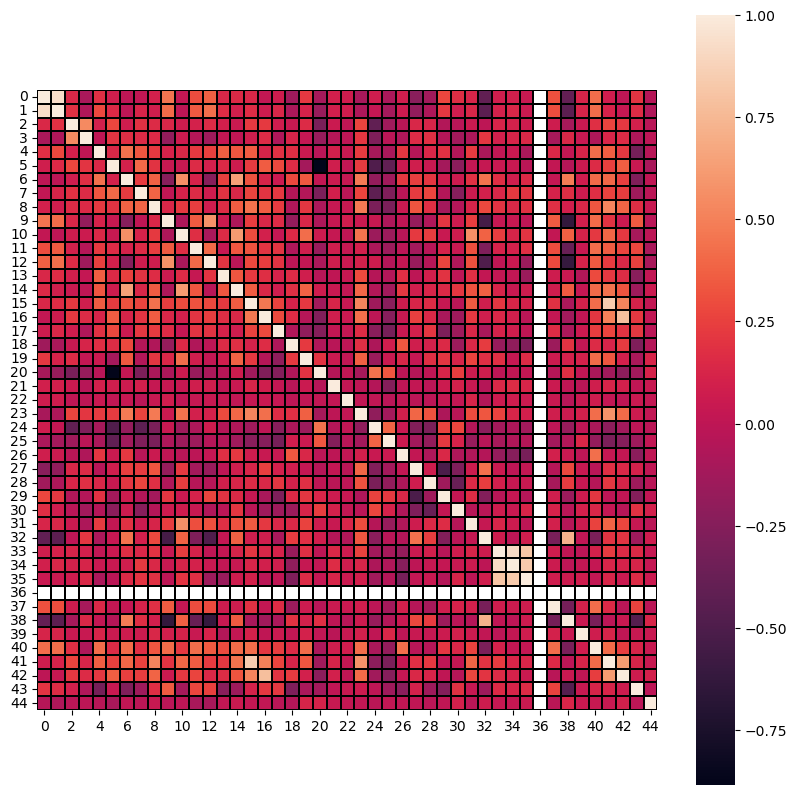

In [56]:
corr = scipy.stats.spearmanr(datai)

plt.figure(figsize=(10,10))
sns.heatmap(corr[0], linewidths=0.25,vmax=1.0, square=True, linecolor='black')

__Вывод:__
Заметим, что есть признаки, которые имеют близкую к нулю величину корреляции с другими.
!!!!
Кстати, в 36 строке и в 36 столбце белые клетки - это как раз тот единственный признак, в котором есть нормальное распределение.  

### 3.3. Отбор признаков на основе корреляции Спирмена
Посмотрим на признаки, которые наиболее коррелируют с целевой переменной согласно ранговой корреляции Спирмена

In [57]:
def CorrelationSelector(X,y):
    columns = X.columns
    corr_data = dict([(scipy.stats.spearmanr(X[c],y)[0],c) for c in columns
                      if math.isnan(abs(scipy.stats.spearmanr(X[c],y)[0]))==False])
    sorted_corr_data = sorted(corr_data.items(), key=operator.itemgetter(0), reverse=True)
    return sorted_corr_data

In [58]:
CorrelationSelector(datai[info_features], datai.y) # корреляция признаков по убыванию (на основе Спирмена)

[(0.13119875526972954, '1659'),
 (0.11958352142530805, '1325'),
 (0.11283679216454975, '1326'),
 (0.10012799202845435, '1446'),
 (0.09590238067650056, '1663'),
 (0.07009775702944174, '1449'),
 (0.0528439491723904, '1320'),
 (0.0524638225307711, '1453'),
 (0.048783500972701024, '1660'),
 (0.04305158733967709, '1661'),
 (0.04235200922858153, '1662'),
 (0.03665058538258711, '1357'),
 (0.03610761464150434, '1314'),
 (0.035130396237023125, '1451'),
 (0.021477596200767318, '1452'),
 (0.0158609636684763, '1358'),
 (0.015118631400505905, '1321'),
 (0.01104709978238405, '1389'),
 (0.01040164133272598, '1319'),
 (0.009229178418431173, '1322'),
 (0.007194949568505117, '1387'),
 (0.0047985650471619725, '1443'),
 (0.0033426078672855464, '1445'),
 (0.001526667370523806, '1312'),
 (7.890023202264313e-05, '1390'),
 (-0.00863508484748306, '1316'),
 (-0.01162195003851548, '1256'),
 (-0.012674317212634945, '1448'),
 (-0.016031981028639352, '1388'),
 (-0.017693315227353117, '1313'),
 (-0.02105905718867129

Для дальнейшего анализа корреляции отберем признаки на основе их дисперсии. 
VarianceThreshold — это метод, который удаляет из набора данных те столбцы (признаки), которые почти не меняются от одной записи к другой. Признаки с очень низкой дисперсией обычно не несут полезной информации для модели машинного обучения и могут создавать "шум".


In [59]:
def VarianceThreshold_selector(X):
    columns = X.columns
    selector = VarianceThreshold(threshold=(0.9*(1-0.9)))
    selector.fit_transform(X)
    labels = [columns[x] for x in selector.get_support(indices=True) if x]
    return pd.DataFrame(X[labels], columns=labels)

In [60]:
data_var_reduced = VarianceThreshold_selector(datai[info_features])  # отобради признаки на основе диспер. анализа, некоторые неважные "исчезли"

In [61]:
data_var_reduced.head(10)

1254        1255       1256         1310  \
2016-02-12 02:00:00  79.900000  101.150001  62.503335  1748.788920   
2016-02-12 02:01:00  75.310001  101.773334  62.843335  1739.972727   
2016-02-12 02:02:00  70.833333   99.790001  63.070001  1833.035522   
2016-02-12 02:03:00  66.866667   99.336668  62.390001  1784.457570   
2016-02-12 02:04:00  63.806667   96.673333  61.370001  1732.109009   
2016-02-12 02:05:00  61.540001   94.633332  60.690001  1719.290120   
2016-02-12 02:06:00  59.556667   93.556667  60.293334  1714.545959   
2016-02-12 02:07:00  58.139999   95.596667  60.973334  1689.200562   
2016-02-12 02:08:00  57.063332   94.633333  61.936668  1679.136536   
2016-02-12 02:09:00  56.099999   96.503333  62.900002  1679.299286   

                            1311         1312         1313         1314  \
2016-02-12 02:00:00  2011.577677  1570.849599  1503.548157  1119.619863   
2016-02-12 02:01:00  2020.598816  1551.948283  1493.728292  1115.090597   
2016-02-12 02:02:00  2035.087545  1544.847137  1503.307068  1118.175822   
2016-02-12 02:03:00  2070.340210  1541.748647  1511.062286  1107.806163   
2016-02-12 02:04:00  2050.359853  1555.637553  1529.568746  1112.136485   
2016-02-12 02:05:00  2082.538228  1546.004537  1535.675293  1121.227590   
2016-02-12 02:06:00  2100.318298  1541.163920  1536.847768  1114.174622   
2016-02-12 02:07:00  2093.385885  1534.698710  1535.382904  1111.320882   
2016-02-12 02:08:00  2088.277059  1528.899638  1525.346018  1114.661977   
2016-02-12 02:09:00  2092.617371  1527.139404  1514.995667  1109.336110   

                            1315         1316  ...  1445  1446      1447  \
2016-02-12 02:00:00  1779.300476  1140.576162  ...   0.0   0.0  2.408673   
2016-02-12 02:01:00  1791.088582  1132.545756  ...   0.0   0.0  2.416630   
2016-02-12 02:02:00  1771.072072  1129.858388  ...   0.0   0.0  2.408131   
2016-02-12 02:03:00  1778.109924  1126.516378  ...   0.0   0.0  2.414701   
2016-02-12 02:04:00  1770.571716  1134.144399  ...   0.0   0.0  2.409035   
2016-02-12 02:05:00  1786.902018  1131.641541  ...   0.0   0.0  2.382029   
2016-02-12 02:06:00  1782.260315  1133.716726  ...   0.0   0.0  2.394748   
2016-02-12 02:07:00  1781.907654  1126.463938  ...   0.0   0.0  2.384802   
2016-02-12 02:08:00  1759.754201  1130.322245  ...   0.0   0.0  2.350260   
2016-02-12 02:09:00  1739.143890  1131.489614  ...   0.0   0.0  2.377568   

                         1453       1659       1660   1661        1662  \
2016-02-12 02:00:00  3.278897  82.331450  44.126156  100.0  125.899355   
2016-02-12 02:01:00  3.263542  81.926966  44.126156  100.0  124.178765   
2016-02-12 02:02:00  3.228665  81.500172  44.126156  100.0  122.930078   
2016-02-12 02:03:00  3.189120  81.144507  44.126156  100.0  126.867761   
2016-02-12 02:04:00  3.180864  81.244577  44.126156  100.0  121.668565   
2016-02-12 02:05:00  3.172029  81.763603  44.126156  100.0  112.406603   
2016-02-12 02:06:00  3.171759  82.713636  44.126156  100.0   85.062346   
2016-02-12 02:07:00  3.194599  83.546731  44.126156  100.0   79.838167   
2016-02-12 02:08:00  3.211034  83.654634  44.126156  100.0   89.417671   
2016-02-12 02:09:00  3.216358  83.216993  44.126156  100.0   97.925067   

                           1663  1448  
2016-02-12 02:00:00  497.261638   0.0  
2016-02-12 02:01:00  492.105928   0.0  
2016-02-12 02:02:00  502.045284   0.0  
2016-02-12 02:03:00  501.268359   0.0  
2016-02-12 02:04:00  500.345702   0.0  
2016-02-12 02:05:00  500.119125   0.0  
2016-02-12 02:06:00  496.891702   0.0  
2016-02-12 02:07:00  495.653376   0.0  
2016-02-12 02:08:00  497.996717   0.0  
2016-02-12 02:09:00  490.588555   0.0  

[10 rows x 36 columns]

In [62]:
print(datai.shape, data_var_reduced.shape)

(40260, 45) (40260, 36)


Можно заметить, что было 44 признака, а осталось 36. Это как раз результат "исчезновения" части признаков после диспер. анализа.

Исчезли 9 признаков, не важных с точки зрения дисперсии

Далее  выполним корреляцию признаков по убыванию (на основе Спирмена), но с учетом дисперс. анализа и удаления 9 "незначащих" признаков

In [63]:
CorrelationSelector(data_var_reduced, datai.y) 

[(0.13119875526972954, '1659'),
 (0.11958352142530805, '1325'),
 (0.11283679216454975, '1326'),
 (0.10012799202845435, '1446'),
 (0.09590238067650056, '1663'),
 (0.0528439491723904, '1320'),
 (0.0524638225307711, '1453'),
 (0.048783500972701024, '1660'),
 (0.04305158733967709, '1661'),
 (0.04235200922858153, '1662'),
 (0.03610761464150434, '1314'),
 (0.015118631400505905, '1321'),
 (0.01104709978238405, '1389'),
 (0.01040164133272598, '1319'),
 (0.009229178418431173, '1322'),
 (0.007194949568505117, '1387'),
 (0.0047985650471619725, '1443'),
 (0.0033426078672855464, '1445'),
 (0.001526667370523806, '1312'),
 (7.890023202264313e-05, '1390'),
 (-0.00863508484748306, '1316'),
 (-0.01162195003851548, '1256'),
 (-0.012674317212634945, '1448'),
 (-0.016031981028639352, '1388'),
 (-0.017693315227353117, '1313'),
 (-0.021059057188671293, '1447'),
 (-0.02201428245881435, '1323'),
 (-0.02495525095671967, '1255'),
 (-0.02659874111020652, '1315'),
 (-0.028983258830751108, '1444'),
 (-0.03176897514

__Для сравнения:__

Признаки (первые 15), отобранные на основе корреляции Спирмена:\
(np.float64(0.13119875526972954), '1659'),\
 (np.float64(0.11958352142530805), '1325'),\
 (np.float64(0.11283679216454975), '1326'),\
 (np.float64(0.10012799202845435), '1446'),\
 (np.float64(0.09590238067650056), '1663'),\
 (np.float64(0.07009775702944174), '1449'),\
 (np.float64(0.0528439491723904), '1320'),\
 (np.float64(0.0524638225307711), '1453'),\
 (np.float64(0.048783500972701024), '1660'),\
 (np.float64(0.04305158733967709), '1661'),\
 (np.float64(0.04235200922858153), '1662'),\
 (np.float64(0.03665058538258711), '1357'),\
 (np.float64(0.03610761464150434), '1314'),\
 (np.float64(0.035130396237023125), '1451'),\
 (np.float64(0.021477596200767318), '1452'),\


Признаки (так же первые 15), подвергнутые дисперсионному анализу (из предыдущих удалены 9), а затем отобранные на основе корреляции Спирмена:\
 (np.float64(0.13119875526972954), '1659'),\
 (np.float64(0.11958352142530805), '1325'),\
 (np.float64(0.11283679216454975), '1326'),\
 (np.float64(0.10012799202845435), '1446'),\
 (np.float64(0.09590238067650056), '1663'),\
 (np.float64(0.0528439491723904), '1320'),\
 (np.float64(0.0524638225307711), '1453'),\
 (np.float64(0.048783500972701024), '1660'),\
 (np.float64(0.04305158733967709), '1661'),\
 (np.float64(0.04235200922858153), '1662'),\
 (np.float64(0.03610761464150434), '1314'),\
 (np.float64(0.015118631400505905), '1321'),\
 (np.float64(0.01104709978238405), '1389'),\
 (np.float64(0.01040164133272598), '1319'),\
 (np.float64(0.009229178418431173), '1322'),\


__Вывод:__

из первой группы удалены на основе дисперсионного анализа :\
(np.float64(0.07009775702944174), '1449'),\
(np.float64(0.03665058538258711), '1357'),\
(np.float64(0.035130396237023125), '1451'),\
(np.float64(0.021477596200767318), '1452'),\
(np.float64(0.0158609636684763), '1358'),\

После двух корреляций Спирмена совпадают первые 5 полностью:\
(np.float64(0.13119875526972954), '1659'),\
(np.float64(0.11958352142530805), '1325'),\
(np.float64(0.11283679216454975), '1326'),\
(np.float64(0.10012799202845435), '1446'),\
(np.float64(0.09590238067650056), '1663'),\

### 3.4. Отбор признаков на основе деревьев решений
Первичная оценка значимости признаков на основе древесных алгоритмов

In [64]:
X = datai[info_features]
y = datai["y"]

In [65]:
var_selection = ExtraTreesRegressor(random_state=1)

In [66]:
var_selection.fit(X, y) #обучаем модель

ExtraTreesRegressor(random_state=1)

In [67]:
# располагаем признаки после обучения модели  в порядке важности
feature_names = X.columns
importances = var_selection.feature_importances_ # как раз это место о важности признаков
indices = np.argsort(importances)[::-1]

print("Feature importances:")
for f, idx in enumerate(indices):
    print("{:2d}. feature '{:5s}' ({:.4f})".format(f+1, feature_names[idx], importances[idx]))

Feature importances:
 1. feature '1323 ' (0.0971)
 2. feature '1449 ' (0.0801)
 3. feature '1315 ' (0.0695)
 4. feature '1663 ' (0.0420)
 5. feature '1324 ' (0.0370)
 6. feature '1659 ' (0.0327)
 7. feature '1325 ' (0.0320)
 8. feature '1322 ' (0.0319)
 9. feature '1326 ' (0.0290)
10. feature '1389 ' (0.0287)
11. feature '1390 ' (0.0287)
12. feature '1451 ' (0.0245)
13. feature '1321 ' (0.0236)
14. feature '1443 ' (0.0234)
15. feature '1453 ' (0.0227)
16. feature '1358 ' (0.0223)
17. feature '1444 ' (0.0215)
18. feature '1452 ' (0.0208)
19. feature '1357 ' (0.0207)
20. feature '1313 ' (0.0197)
21. feature '1388 ' (0.0196)
22. feature '1387 ' (0.0185)
23. feature '1317 ' (0.0182)
24. feature '1447 ' (0.0174)
25. feature '1661 ' (0.0172)
26. feature '1446 ' (0.0170)
27. feature '1311 ' (0.0168)
28. feature '1320 ' (0.0163)
29. feature '1254 ' (0.0160)
30. feature '1255 ' (0.0147)
31. feature '1253 ' (0.0144)
32. feature '1312 ' (0.0130)
33. feature '1256 ' (0.0123)
34. feature '1448 ' (0

__Вывод:__

до этого (после двух корреляций Спирмена) первые 5 были следующие :

 1. (np.float64(0.13119875526972954), '1659'),
 2. (np.float64(0.11958352142530805), '1325'),
 3. (np.float64(0.11283679216454975), '1326'),
 4. (np.float64(0.10012799202845435), '1446'),
 5. (np.float64(0.09590238067650056), '1663'),


а на основе древесного алгоритма первая пятерка:
 1. feature '1323 ' (0.1061)
 2. feature '1449 ' (0.0766)
 3. feature '1315 ' (0.0703)
 4. feature '1663 ' (0.0406)
 5. feature '1324 ' (0.0388)


 Для всех трех способов селекции СОВПАДАЕТ только один признак __'1663 '__. Поэтому далее он выбран для анализа с помощью графиков !

Нужно отметить, что ранее, на основе дисперсионного анализа, признак feature '1449 '  вообще был отброшен как несущественный, а здесь, на основе древесного алгоритма, он второй в рейтинге.

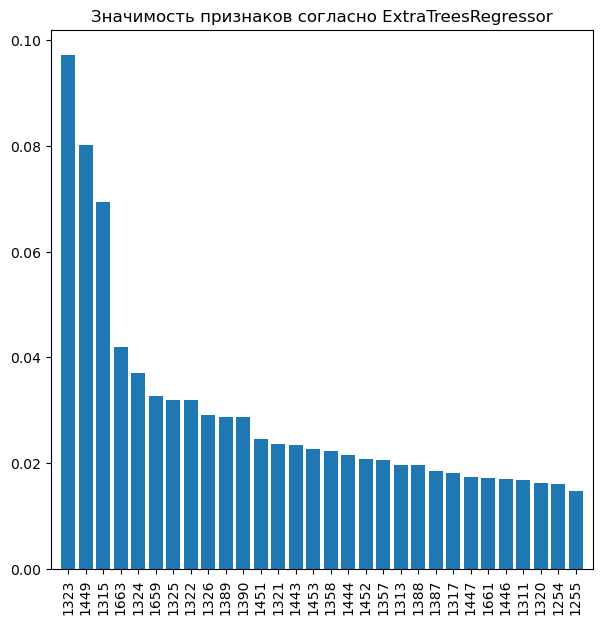

In [68]:
d_first = 30
plt.figure(figsize=(7,7))
plt.title("Значимость признаков согласно ExtraTreesRegressor")
plt.bar(range(d_first), importances[indices[:d_first]], align='center')
plt.xticks(range(d_first), np.array(feature_names)[indices[:d_first]], rotation=90)
plt.xlim([-1, d_first]);

Далее для отобранных на основе древесного алгоритма важных признаков формируется датафрейм и к нему присоединяются названия признаков из Sensor_info

In [69]:
importances_res = pd.concat([pd.Series(feature_names[indices[:15]]), pd.Series(importances[indices[:15]])], axis=1)
importances_res.columns = ["id", "importances"]

In [70]:
importances_res["id"] = importances_res["id"].apply(str)
data_info["id"] = data_info["id"].apply(str)

In [71]:
data_info_res = pd.merge(data_info, importances_res,
                         how='left', on=["id"]).dropna().sort_values(["importances"], ascending=False)

In [72]:
data_info_res

id                     description        phys  status  importances
17  1323         Расход воды в м-цу № 33  мз/час           1     0.097135
32  1449             Давление ГЦ № 33-61  бар              1     0.080136
9   1315         Плотность песков МД 3-7  г/л              1     0.069468
44  1663        Вес руды в мельницу № 32  тонн/час         1     0.041985
18  1324         Расход воды в м-цу № 34  мз/час           1     0.036978
40  1659                  ВАЗМ м-цы № 32  %                1     0.032707
19  1325  Расход воды в бутару м-цы № 31  мз/час           1     0.031983
16  1322         Расход воды в м-цу № 32  мз/час           1     0.031922
20  1326  Расход воды в бутару м-цы № 32  мз/час           1     0.029016
25  1389          Мощность мельницы № 33  кВт              1     0.028741
26  1390          Мощность мельницы № 34  кВт              1     0.028735
34  1451        Давление воды  на секцию  бар              1     0.024525
15  1321         Расход воды в м-цу № 31  мз/час           1     0.023562
27  1443              Давление ГЦ № 32-6  бар              1     0.023373
36  1453         Давление воды  ввод № 2  бар              1     0.022726

__Вывод:__

По результатам применения ExtraTreesRegressor имеем ТОП-5 признаков по значимости:
 важный!


1. 1323	Расход воды в м-цу № 33
2. 1449	Давление ГЦ № 33-61	
3. 1315	Плотность песков МД 3-7	
4. 1663	Вес руды в мельницу № 32	
5. 1324	Расход воды в м-цу № 34

Забавно, что признак '1663' - это 	Вес руды в мельницу № 32	тонн/час. Конечно,  он очень важный, как же без руды!

### 3.5. Визуализация признаков и целевого показателя
Посмотрим, как выглядит временной ряд целевого показателя (содержание железа в концентрате) и отдельных, наиболее коррелирующих признаков 

(выбрали '1663')

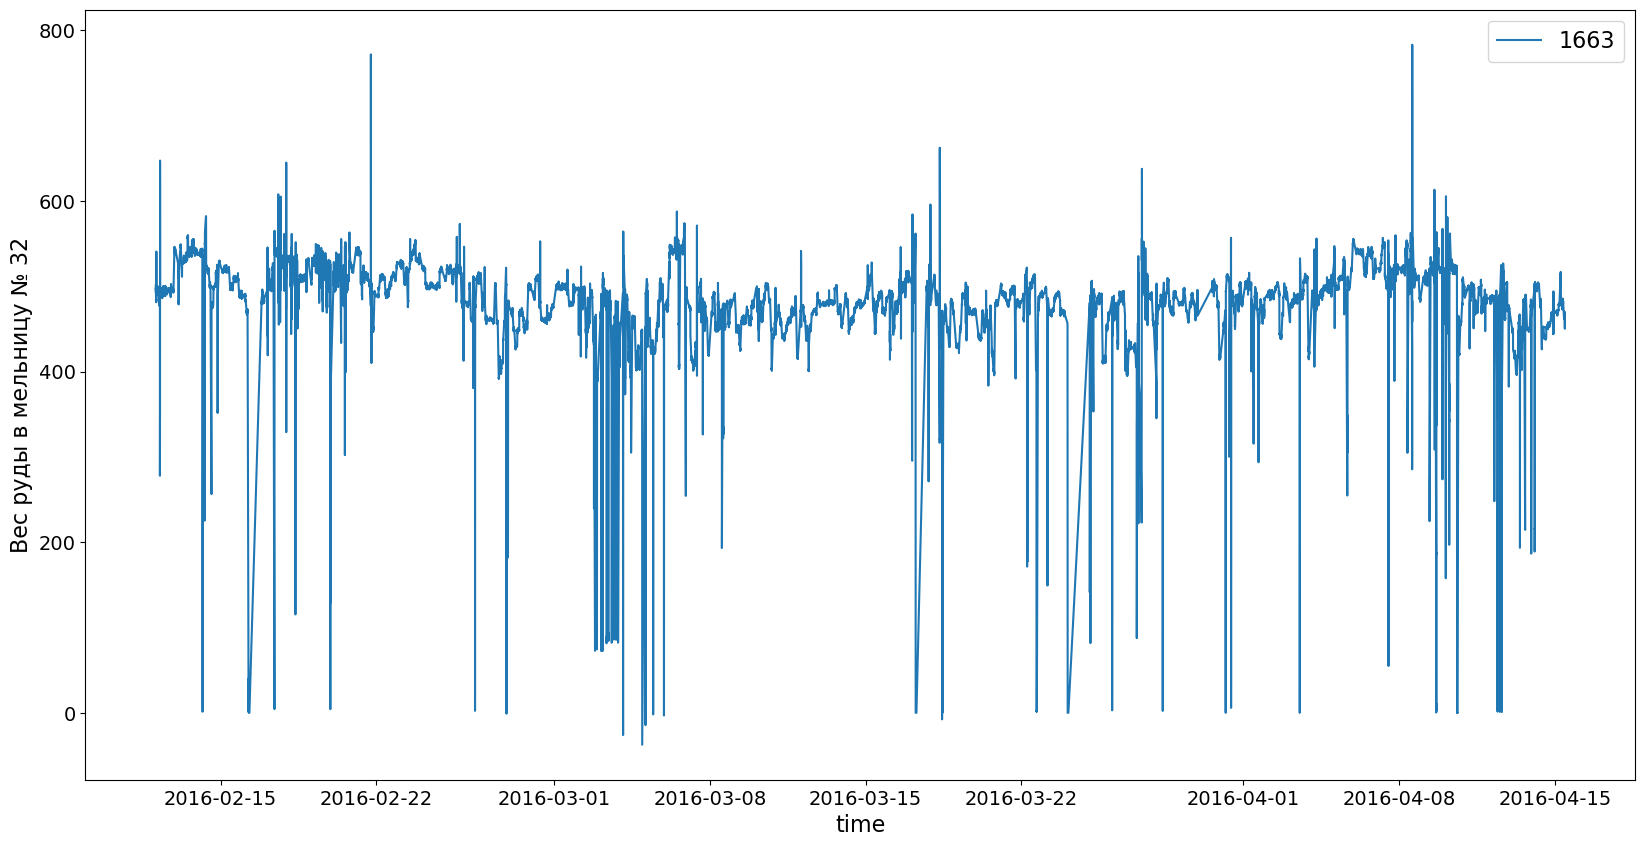

In [73]:
feature = "1663"
t = datai.index
x = datai[feature]
plt.figure(figsize=(20,10))
plt.plot(t, x, label=feature)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel("time", fontsize=16)
plt.ylabel("Вес руды в мельницу № 32", fontsize=16)
plt.legend(loc='best', fontsize=16)
plt.show()

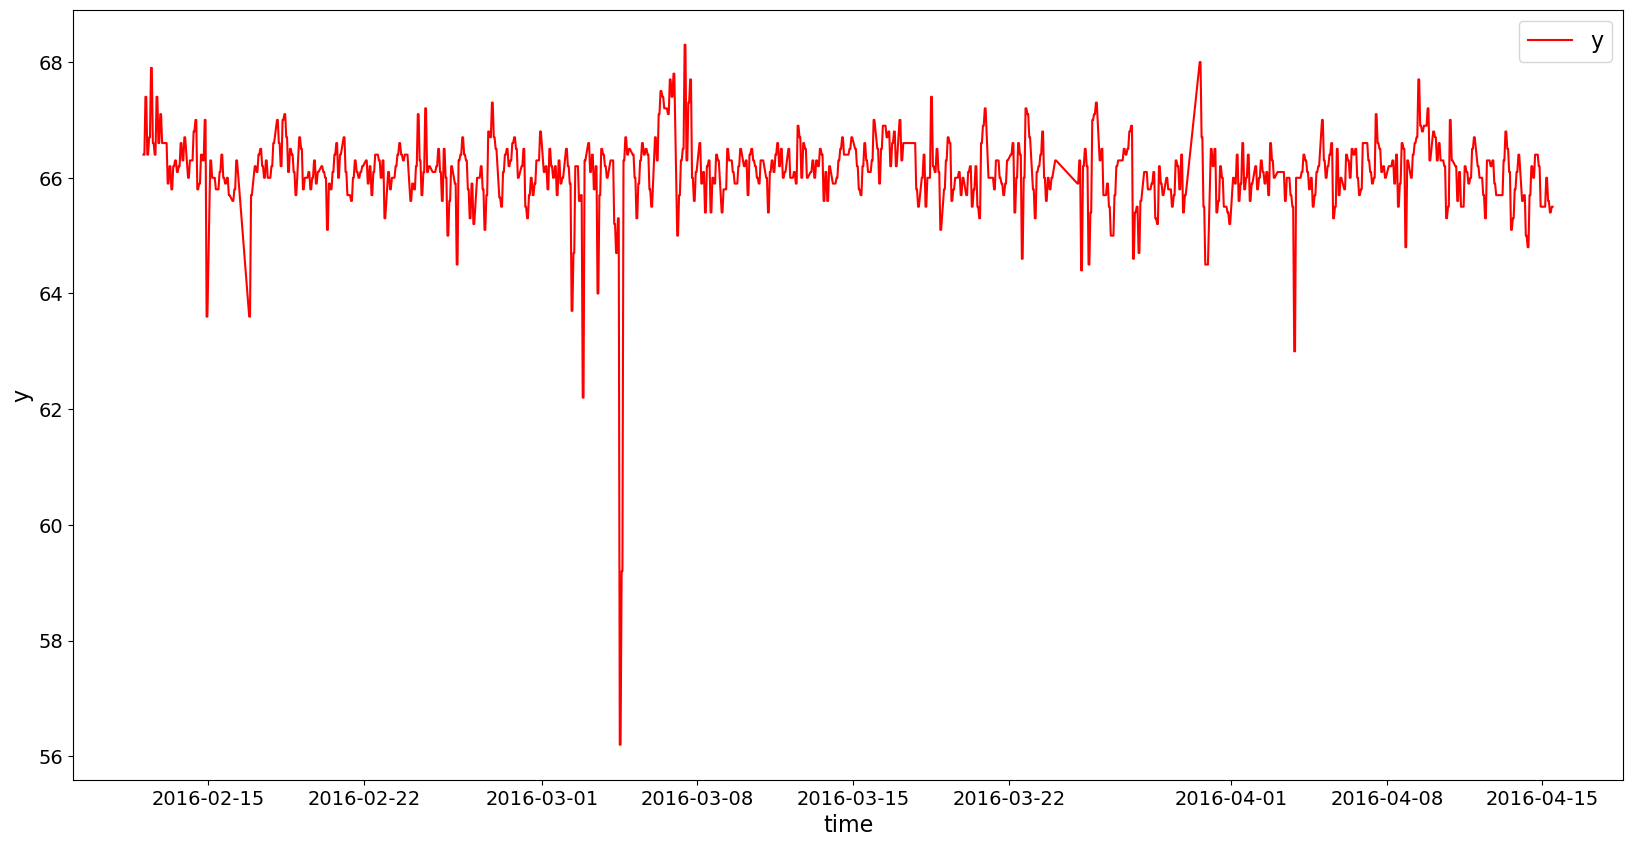

In [74]:
plt.figure(figsize=(20,10))
plt.plot(t, y, "r", label="y")
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel("time", fontsize=16)
plt.ylabel("y", fontsize=16)
plt.legend(loc='best', fontsize=16)
plt.show()

__Вывод:__

Можно заметить, что график концентрации железа отвечает графику поведения признака '1663' - это Вес руды в мельницу № 32 . В течение нескольких дней недели с 1.03 по 8.03 было падение количества руды в мельницу № 32, и сразу это сказалось на концентрации железа - уменьшилась до самого минимального размера.

### 3.6. Анализ максимумов и минимумов показателя
Нас интересуют ситуации, когда при определенном наборе параметров процесса концентрация железа максимальна.
Но не менее интересными кажутся аномальные наблюдения, когда концентрация железа была минимальна (важно отметить, что такие наблюдаемы на графиках целевого показателя).

Но если подойти более корректно, то для литейного производства нужно, чтобы концентрация железа попадала в определенный диапазон, т.е. ни максимальная, ни минимальная вообще-то не нужны.
Вот на это нужно обратить внимание в дальнейшем и сделать выводы именно с этой точки зрения.


Классифицируем некоторые наблюдения как максимумы и минимумы целевого показателя концентрации содержания железа

In [91]:
# Почасовой агрегат измерений; для этого делаем копию основного датафрейма и добавляем справа признаки "date" и "hour", вытаскиваем эти данные из признака "index"
data_copy = datai.copy()
data_copy["date"] = data_copy.index.date
data_copy["hour"] = data_copy.index.hour

In [92]:
data_copy.head(10) # здесь информация с датчиков по датам, часам и минутам

1253       1254        1255       1256         1310  \
2016-02-12 02:00:00  52.866667  79.900000  101.150001  62.503335  1748.788920   
2016-02-12 02:01:00  51.266667  75.310001  101.773334  62.843335  1739.972727   
2016-02-12 02:02:00  50.466667  70.833333   99.790001  63.070001  1833.035522   
2016-02-12 02:03:00  49.466667  66.866667   99.336668  62.390001  1784.457570   
2016-02-12 02:04:00  49.600000  63.806667   96.673333  61.370001  1732.109009   
2016-02-12 02:05:00  49.400000  61.540001   94.633332  60.690001  1719.290120   
2016-02-12 02:06:00  49.066667  59.556667   93.556667  60.293334  1714.545959   
2016-02-12 02:07:00  48.800000  58.139999   95.596667  60.973334  1689.200562   
2016-02-12 02:08:00  49.066667  57.063332   94.633333  61.936668  1679.136536   
2016-02-12 02:09:00  49.066667  56.099999   96.503333  62.900002  1679.299286   

                            1311         1312         1313         1314  \
2016-02-12 02:00:00  2011.577677  1570.849599  1503.548157  1119.619863   
2016-02-12 02:01:00  2020.598816  1551.948283  1493.728292  1115.090597   
2016-02-12 02:02:00  2035.087545  1544.847137  1503.307068  1118.175822   
2016-02-12 02:03:00  2070.340210  1541.748647  1511.062286  1107.806163   
2016-02-12 02:04:00  2050.359853  1555.637553  1529.568746  1112.136485   
2016-02-12 02:05:00  2082.538228  1546.004537  1535.675293  1121.227590   
2016-02-12 02:06:00  2100.318298  1541.163920  1536.847768  1114.174622   
2016-02-12 02:07:00  2093.385885  1534.698710  1535.382904  1111.320882   
2016-02-12 02:08:00  2088.277059  1528.899638  1525.346018  1114.661977   
2016-02-12 02:09:00  2092.617371  1527.139404  1514.995667  1109.336110   

                            1315  ...       1660   1661        1662  \
2016-02-12 02:00:00  1779.300476  ...  44.126156  100.0  125.899355   
2016-02-12 02:01:00  1791.088582  ...  44.126156  100.0  124.178765   
2016-02-12 02:02:00  1771.072072  ...  44.126156  100.0  122.930078   
2016-02-12 02:03:00  1778.109924  ...  44.126156  100.0  126.867761   
2016-02-12 02:04:00  1770.571716  ...  44.126156  100.0  121.668565   
2016-02-12 02:05:00  1786.902018  ...  44.126156  100.0  112.406603   
2016-02-12 02:06:00  1782.260315  ...  44.126156  100.0   85.062346   
2016-02-12 02:07:00  1781.907654  ...  44.126156  100.0   79.838167   
2016-02-12 02:08:00  1759.754201  ...  44.126156  100.0   89.417671   
2016-02-12 02:09:00  1739.143890  ...  44.126156  100.0   97.925067   

                           1663  1448     y  label_max  label_min        date  \
2016-02-12 02:00:00  497.261638   0.0  66.4          0          0  2016-02-12   
2016-02-12 02:01:00  492.105928   0.0  66.4          0          0  2016-02-12   
2016-02-12 02:02:00  502.045284   0.0  66.4          0          0  2016-02-12   
2016-02-12 02:03:00  501.268359   0.0  66.4          0          0  2016-02-12   
2016-02-12 02:04:00  500.345702   0.0  66.4          0          0  2016-02-12   
2016-02-12 02:05:00  500.119125   0.0  66.4          0          0  2016-02-12   
2016-02-12 02:06:00  496.891702   0.0  66.4          0          0  2016-02-12   
2016-02-12 02:07:00  495.653376   0.0  66.4          0          0  2016-02-12   
2016-02-12 02:08:00  497.996717   0.0  66.4          0          0  2016-02-12   
2016-02-12 02:09:00  490.588555   0.0  66.4          0          0  2016-02-12   

                     hour  
2016-02-12 02:00:00     2  
2016-02-12 02:01:00     2  
2016-02-12 02:02:00     2  
2016-02-12 02:03:00     2  
2016-02-12 02:04:00     2  
2016-02-12 02:05:00     2  
2016-02-12 02:06:00     2  
2016-02-12 02:07:00     2  
2016-02-12 02:08:00     2  
2016-02-12 02:09:00     2  

[10 rows x 49 columns]

In [93]:
# Создаем таблицу, в которой собираются все результаты аггрегирования по датам и часам
data_agg = data_copy.groupby(["date","hour"]).agg(["mean", "std", "min", "max"])

Мы выполняем сложную операцию группировки и агрегации данных: 

преобразовали набор данных data_copy из длинного списка отдельных событий в сводную таблицу, которая суммирует статистику по каждому уникальному сочетанию даты и часа.

Для всех остальных столбцов в DataFrame будут вычислены следующие показатели:

"mean": Среднее арифметическое значение.

"std": Стандартное отклонение (мера разброса данных).

"min": Минимальное значение.

"max": Максимальное значение.

В новом DataFrame data_agg индекс будет состоять из двух уровней (date и hour), а столбцы будут иметь многоуровневую структуру.

In [94]:
data_agg.head() # вот что получилось после аггрегирования по датам и по часам

1253                                       1254  \
                      mean       std        min        max       mean   
date       hour                                                         
2016-02-12 2     51.882222  4.168655  48.466667  61.533333  72.891278   
           4     62.752222  2.600481  57.933333  69.666667  93.713445   
           6     59.938889  1.234671  58.333333  63.000000  91.856667   
           8     60.282222  2.368066  56.933333  68.866667  92.581056   
           10    52.448889  2.507236  49.333333  57.200000  84.832834   

                                                       1255            ...  \
                       std        min        max       mean       std  ...   
date       hour                                                        ...   
2016-02-12 2     12.562797  52.926668  94.066666  96.130278  2.745439  ...   
           4      2.159173  90.156667  98.203334  96.719611  2.820906  ...   
           6      1.136115  90.270001  94.689999  96.593056  4.567878  ...   
           8      2.439448  89.420001  99.790000  97.823667  2.090214  ...   
           10     6.178393  74.970002  93.783333  95.678833  2.226388  ...   

                    y       label_max              label_min               
                  min   max      mean  std min max      mean  std min max  
date       hour                                                            
2016-02-12 2     66.4  66.4       0.0  0.0   0   0       0.0  0.0   0   0  
           4     67.4  67.4       1.0  0.0   1   1       0.0  0.0   0   0  
           6     66.4  66.4       0.0  0.0   0   0       0.0  0.0   0   0  
           8     66.7  66.7       0.0  0.0   0   0       0.0  0.0   0   0  
           10    67.9  67.9       1.0  0.0   1   1       0.0  0.0   0   0  

[5 rows x 188 columns]

In [95]:
data_agg = data_agg.reset_index().drop(["date","hour"], axis=1) # удалили два первых признака "date" и "hour" из таблицы после аггрегирования
data_agg.head()

1253                                       1254                        \
        mean       std        min        max       mean        std        min   
0  51.882222  4.168655  48.466667  61.533333  72.891278  12.562797  52.926668   
1  62.752222  2.600481  57.933333  69.666667  93.713445   2.159173  90.156667   
2  59.938889  1.234671  58.333333  63.000000  91.856667   1.136115  90.270001   
3  60.282222  2.368066  56.933333  68.866667  92.581056   2.439448  89.420001   
4  52.448889  2.507236  49.333333  57.200000  84.832834   6.178393  74.970002   

                   1255            ...     y       label_max               \
         max       mean       std  ...   min   max      mean  std min max   
0  94.066666  96.130278  2.745439  ...  66.4  66.4       0.0  0.0   0   0   
1  98.203334  96.719611  2.820906  ...  67.4  67.4       1.0  0.0   1   1   
2  94.689999  96.593056  4.567878  ...  66.4  66.4       0.0  0.0   0   0   
3  99.790000  97.823667  2.090214  ...  66.7  66.7       0.0  0.0   0   0   
4  93.783333  95.678833  2.226388  ...  67.9  67.9       1.0  0.0   1   1   

  label_min               
       mean  std min max  
0       0.0  0.0   0   0  
1       0.0  0.0   0   0  
2       0.0  0.0   0   0  
3       0.0  0.0   0   0  
4       0.0  0.0   0   0  

[5 rows x 188 columns]

In [96]:
li1 = list(data_agg.columns.levels[0]) # вытаскиваем названия признаков 0-го уровня (это собственно сами названия призаков + y+ date+hour)
print(li1)
li2 = list(data_agg.columns.levels[1])[:-1] # вытаскиваем названия признаков меньшего уровня
print(li2)
li3 = [i+"_"+j for i in li1 for j in li2 if i != "hour" if i != "date"] # формируем новые названия из этих двух списков, а именно для каждого номера датчика значения 'mean', 'std', 'min', 'max' по конкретным датам и часам
print(li3)
data_agg.columns = li3 # эти новые названия будут новыми названиями колонок таблицы  data_agg

['1253', '1254', '1255', '1256', '1310', '1311', '1312', '1313', '1314', '1315', '1316', '1317', '1318', '1319', '1320', '1321', '1322', '1323', '1324', '1325', '1326', '1357', '1358', '1387', '1388', '1389', '1390', '1443', '1444', '1445', '1446', '1447', '1449', '1451', '1452', '1453', '1454', '1658', '1659', '1660', '1661', '1662', '1663', '1448', 'y', 'label_max', 'label_min', 'hour', 'date']
['mean', 'std', 'min', 'max']
['1253_mean', '1253_std', '1253_min', '1253_max', '1254_mean', '1254_std', '1254_min', '1254_max', '1255_mean', '1255_std', '1255_min', '1255_max', '1256_mean', '1256_std', '1256_min', '1256_max', '1310_mean', '1310_std', '1310_min', '1310_max', '1311_mean', '1311_std', '1311_min', '1311_max', '1312_mean', '1312_std', '1312_min', '1312_max', '1313_mean', '1313_std', '1313_min', '1313_max', '1314_mean', '1314_std', '1314_min', '1314_max', '1315_mean', '1315_std', '1315_min', '1315_max', '1316_mean', '1316_std', '1316_min', '1316_max', '1317_mean', '1317_std', '1317

In [97]:
data_agg["y"] = data_agg["y_mean"] # просто переименовали, чтобы указать y вместо y_mean
data_agg = data_agg.drop(["y_mean", "y_std", "y_min", "y_max"], axis=1) # удаляем все столбцы с y_..., кроме самого y

In [98]:
data_agg.columns

Index(['1253_mean', '1253_std', '1253_min', '1253_max', '1254_mean',
       '1254_std', '1254_min', '1254_max', '1255_mean', '1255_std',
       ...
       '1448_max', 'label_max_mean', 'label_max_std', 'label_max_min',
       'label_max_max', 'label_min_mean', 'label_min_std', 'label_min_min',
       'label_min_max', 'y'],
      dtype='object', length=185)

In [99]:
# для построения графика изменения y по датам и по часам вытаскиваем значения y и значения индексов
f = data_agg.y.values
print(f)
x = data_agg.y.index.values
print(x)

[66.4  67.4  66.4  66.7  67.9  66.6  66.4  67.4  66.6  67.1  66.6  66.6
 65.9  66.2  65.8  66.2  66.3  66.1  66.2  66.6  66.3  66.7  66.   66.3
 66.3  66.8  67.   65.8  65.9  66.4  66.3  67.   63.6  66.3  66.   66.
 65.8  65.8  66.1  66.4  66.   65.9  66.   65.7  65.6  65.8  66.3  63.6
 65.7  66.2  66.1  66.4  66.5  66.2  66.   66.3  66.   66.   66.2  66.6
 67.   66.6  66.2  67.   67.1  66.7  66.1  66.5  66.4  66.1  65.7  66.7
 66.5  65.8  66.   66.   66.1  65.8  66.   66.3  65.9  66.1  66.2  66.1
 66.   65.1  65.9  65.8  66.1  66.4  66.6  66.   66.4  66.7  66.1  65.7
 65.7  65.6  66.   66.3  66.1  66.   66.1  66.2  66.3  65.9  66.2  65.7
 66.1  66.4  66.4  66.3  66.   66.3  65.3  66.1  65.8  66.   66.   66.2
 66.4  66.6  66.4  66.3  66.4  66.4  65.6  65.9  65.8  66.2  67.1  66.3
 65.7  66.1  67.2  66.1  66.2  66.1  66.1  66.2  66.5  66.1  65.6  66.5
 66.   65.   65.6  66.2  65.9  64.5  66.3  66.4  66.7  66.4  66.3  65.8
 65.3  65.9  65.2  66.   66.   66.2  65.8  65.1  65.7  66.8  66.7

In [100]:
max_ind = argrelextrema(f, np.greater)[0]
'''
Код max_ind = argrelextrema(f, np.greater)[0] используется для поиска индексов локальных максимумов в массиве данных f.
Эта функция обычно импортируется из библиотеки scipy.signal.
В переменной max_ind будет храниться массив индексов (позиций) всех точек в ваших данных f, которые являются локальными максимумами.
'''
min_ind = argrelextrema(f, np.less)[0] # то же самое по минимумам
f_min = f[min_ind] # значения локальных минимумов в точках локальных экстремумов
print (f_min)
f_max = f[max_ind] # Значения локальных максимумов в точках локальных экстремумов
print(f_max)

[66.4 66.4 66.6 65.9 65.8 66.1 66.3 66.  65.8 66.3 63.6 65.9 65.6 63.6
 66.1 66.  66.2 66.1 65.7 65.8 65.8 65.9 65.1 65.8 66.  65.6 66.  65.9
 65.7 66.  65.3 65.8 66.3 65.6 65.8 65.7 66.1 65.6 65.  64.5 65.3 65.2
 65.1 66.7 65.5 66.2 66.  65.3 65.7 66.1 65.8 66.  65.7 65.9 63.7 65.6
 62.2 66.1 65.8 64.  66.  64.7 56.2 66.4 65.3 66.4 65.5 66.3 67.1 67.4
 65.  66.3 65.6 65.9 65.4 65.4 65.9 65.4 66.2 65.7 65.9 65.4 66.1 66.2
 66.  65.9 66.  66.  66.  66.2 65.6 65.6 65.7 65.9 66.7 66.2 66.2 66.3
 65.5 65.5 66.1 65.1 65.6 65.7 65.7 65.5 65.3 65.8 65.7 65.4 64.6 65.3
 65.6 65.8 65.9 64.4 64.5 66.3 66.4 64.6 64.7 65.2 65.7 65.5 65.8 65.4
 66.2 65.4 65.2 65.9 65.6 65.8 65.6 65.8 65.9 65.7 66.  65.6 63.  65.8
 65.5 66.  65.3 65.7 65.8 66.  66.4 65.7 65.9 66.1 66.  65.9 65.5 64.8
 66.  66.8 66.3 66.3 65.3 65.6 65.9 65.3 66.2 65.1 65.6 64.8 66.  65.4]
[67.4 67.9 67.4 67.1 66.2 66.3 66.6 66.7 67.  66.4 67.  66.3 66.4 66.
 66.3 66.2 66.5 66.3 67.  67.1 66.5 66.7 66.1 66.3 66.2 65.9 66.6 66.7
 66.3 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


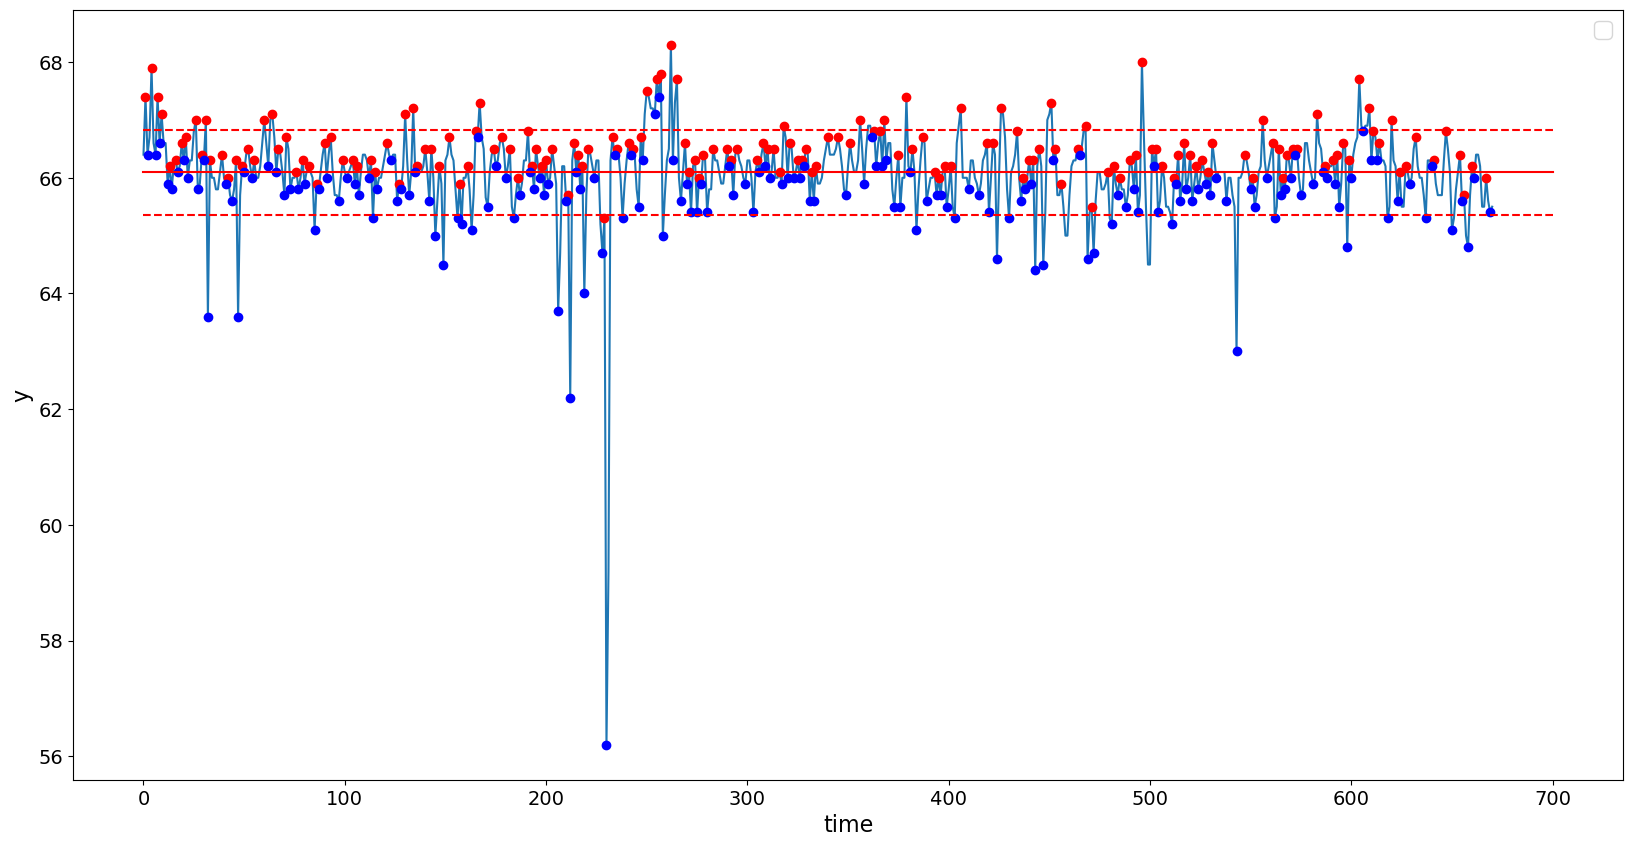

In [101]:
# Визуализируем средние данные по содержанию железа по датам и по часам; внутрь полосы попадают данные не больше стандарт. отклонения от среднего
plt.figure(figsize=(20,10))
plt.plot(x, f)
plt.plot(max_ind, f_max, 'ro')
plt.plot(min_ind, f_min, 'bo')
plt.plot([0,700], [mean(f)+std(f), mean(f)+std(f)], '--r') # строим верхнюю пункт. линию, средняя величина + станд. отклонение
plt.plot([0,700], [mean(f), mean(f)], '-r') # строим среднюю линию, средняя величина
plt.plot([0,700], [mean(f)-std(f), mean(f)-std(f)], '--r') # строим нижнюю пункт. линию, средняя величина - станд. отклонение
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel("time", fontsize=16)
plt.ylabel("y", fontsize=16)
plt.legend(loc='best', fontsize=16)
plt.show()

Далее другой вариант анализа концентрации железа на максимальные и минимальные значения, без локальных максимумов и минимумов


In [102]:
data_temp = datai.reset_index().drop(["index"], axis=1) # Вновь обращаемся к основной таблице datai, перенумеровуем строки на всякий случай , убираем прежнюю нумерацию и создаем новую таблицу data_temp
maxima = data_temp[data_temp.y > mean(data_temp.y) + std(data_temp.y)] # формируем данные, которые больше, чем у_mean + y_std
minima = data_temp[data_temp.y < mean(data_temp.y) - std(data_temp.y)]# формируем данные, которые меньше, чем у_mean - y_std

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


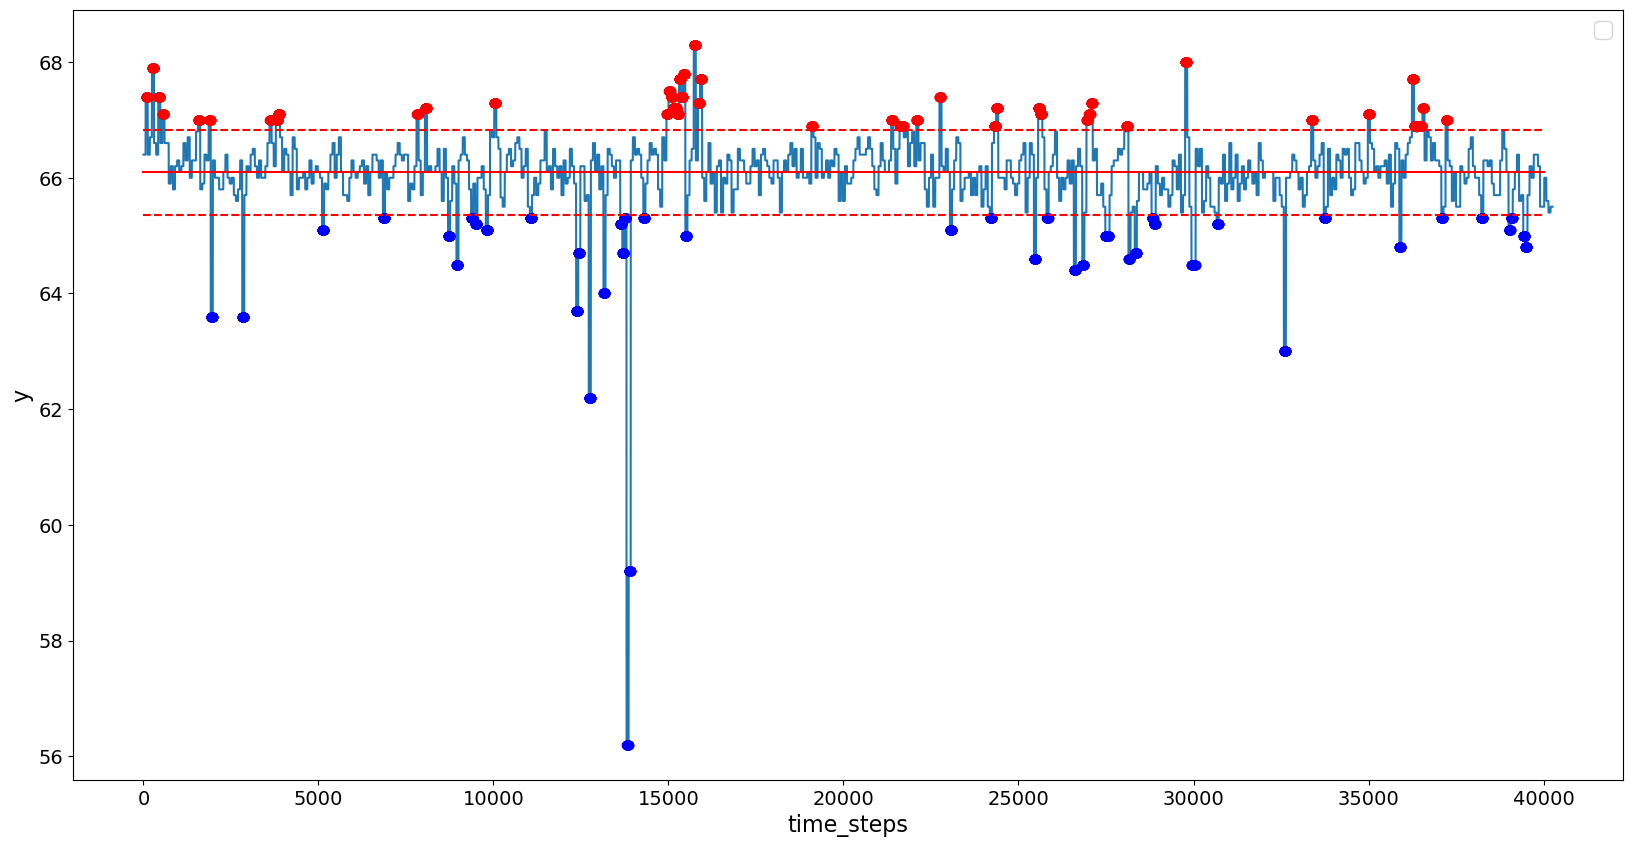

In [103]:
plt.figure(figsize=(20,10))
plt.plot(range(0,datai.shape[0]), datai.y.values)
plt.plot(maxima.index.values, maxima.y.values, 'ro')
plt.plot(minima.index.values, minima.y.values, 'bo')
plt.plot([0,40000], [mean(data_temp.y) + std(data_temp.y), mean(data_temp.y) + std(data_temp.y)], '--r') # строим верхнюю пункт. линию, средняя величина + станд. отклонение
plt.plot([0,40000], [mean(data_temp.y), mean(data_temp.y)], '-r') # строим среднюю линию, средняя величина
plt.plot([0,40000], [mean(data_temp.y) - std(data_temp.y), mean(data_temp.y) - std(data_temp.y)], '--r') # строим нижнюю пункт. линию, средняя величина - станд. отклонение
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel("time_steps", fontsize=16)
plt.ylabel("y", fontsize=16)
plt.legend(loc='best', fontsize=16)
plt.show()

Вне полосы попадают максимальные и минимальные значения.

In [104]:
# создаем два признака с метками на максимальность и минимальность, вначале все метки равны 0
datai["label_max"] = 0
datai["label_min"] = 0
# затем выбираем всех, кто выходит за "среднююю" полосу и ставим им метки 1
class_max = datai[datai.y > (mean(datai.y) + std(datai.y))]
class_min = datai[datai.y < (mean(datai.y) - std(datai.y))]

datai.loc[class_min.index, "label_min"] = 1.0
datai.loc[class_max.index, "label_max"] = 1.0

In [105]:
datai.head()

1253       1254        1255       1256         1310  \
2016-02-12 02:00:00  52.866667  79.900000  101.150001  62.503335  1748.788920   
2016-02-12 02:01:00  51.266667  75.310001  101.773334  62.843335  1739.972727   
2016-02-12 02:02:00  50.466667  70.833333   99.790001  63.070001  1833.035522   
2016-02-12 02:03:00  49.466667  66.866667   99.336668  62.390001  1784.457570   
2016-02-12 02:04:00  49.600000  63.806667   96.673333  61.370001  1732.109009   

                            1311         1312         1313         1314  \
2016-02-12 02:00:00  2011.577677  1570.849599  1503.548157  1119.619863   
2016-02-12 02:01:00  2020.598816  1551.948283  1493.728292  1115.090597   
2016-02-12 02:02:00  2035.087545  1544.847137  1503.307068  1118.175822   
2016-02-12 02:03:00  2070.340210  1541.748647  1511.062286  1107.806163   
2016-02-12 02:04:00  2050.359853  1555.637553  1529.568746  1112.136485   

                            1315  ...      1658       1659       1660   1661  \
2016-02-12 02:00:00  1779.300476  ...  0.037977  82.331450  44.126156  100.0   
2016-02-12 02:01:00  1791.088582  ...  0.040992  81.926966  44.126156  100.0   
2016-02-12 02:02:00  1771.072072  ...  0.037977  81.500172  44.126156  100.0   
2016-02-12 02:03:00  1778.109924  ...  0.037977  81.144507  44.126156  100.0   
2016-02-12 02:04:00  1770.571716  ...  0.036772  81.244577  44.126156  100.0   

                           1662        1663  1448     y  label_max  label_min  
2016-02-12 02:00:00  125.899355  497.261638   0.0  66.4          0          0  
2016-02-12 02:01:00  124.178765  492.105928   0.0  66.4          0          0  
2016-02-12 02:02:00  122.930078  502.045284   0.0  66.4          0          0  
2016-02-12 02:03:00  126.867761  501.268359   0.0  66.4          0          0  
2016-02-12 02:04:00  121.668565  500.345702   0.0  66.4          0          0  

[5 rows x 47 columns]

In [106]:
datai[datai["label_max"] == 1].shape # это все элементы, выходящие за среднюю полосу сверху ( из  40000), их можно отнести к максимальным

(2820, 47)

In [107]:
datai[datai["label_min"] == 1].shape # это все элементы, выходящие за среднюю полосу снизу ( из  40000), их можно отнести к минимальным

(2700, 47)

### Вывод по разделу 3

Определили данные измерений, которые выходят за полосу и могут быть названы как максимальные и минимальные 

## 4. Визуализация измерений и исследование значимости признаков, влияющих на максимальное и минимальное содержание железа в концентрате 
Посмотрим на наблюдения, при которых наблюдалась максимальная концентрация, в пространстве меньшей размерности

### 4.1. Визуализация измерений с учетом понижения размерности

In [108]:
y = datai["label_max"] 
print(y)
print ("Standard observations 0: {}, \n Maximum concentration 1: {}".format(
    1.0-(y.sum()/float(len(y))),
    y.sum()/float(len(y))))

2016-02-12 02:00:00    0
2016-02-12 02:01:00    0
2016-02-12 02:02:00    0
2016-02-12 02:03:00    0
2016-02-12 02:04:00    0
                      ..
2016-04-15 10:55:00    0
2016-04-15 10:56:00    0
2016-04-15 10:57:00    0
2016-04-15 10:58:00    0
2016-04-15 10:59:00    0
Name: label_max, Length: 40260, dtype: int64
Standard observations 0: 0.9299552906110283, 
 Maximum concentration 1: 0.07004470938897168


Получается, что большинство 0 из 40000, но есть и 1 - мы знаем, что их 2820

Далее выполним операцию сэмплирования (sampling) на наборе данных datai, а затем объединим полученные подвыборки в новый набор данных data_sample.
Основная цель кода — создать новый набор данных, в котором соблюдается определенное соотношение между строками, у которых в столбце label_max стоит 1, и строками, у которых там другое значение (не 1).
инения сохраняется в новый DataFrame data_sample.
Это выполняется, чтобы модель машинного обучения не "игнорировала" редкий класс.


In [109]:
data_sample = pd.concat([
    datai[datai['label_max'] == 1].sample(frac=1.0, random_state=1),
    datai[datai['label_max'] != 1].sample(frac=0.5, random_state=1)
])
y_sample = data_sample['label_max']
X_sample = data_sample.drop(['y','label_min','label_max'],axis=1)

Далее для визуализации используется алгормтм t-SNE. 
Его основная задача — взять набор данных с большим количеством признаков (размерностей) и представить его в виде двухмерного или трехмерного графика, который может легко понять человек.

Для t-SNE проводим стандартизацию (нормализацию) признаков.  Стандартизация для t-SNE нужна для того, чтобы алгоритм объективно оценивал схожесть объектов и не отдавал предпочтение признакам с наибольшим масштабом, что в конечном счете обеспечивает более точную и полезную визуализацию данных.

In [110]:
scaler = StandardScaler() # для t-sne обязательно нужна стандартизация признаков

X_sample_sc = scaler.fit_transform(X_sample)

In [111]:
# вот и сам t-SNE
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)

data_2d_tsne = tsne.fit_transform(X_sample_sc)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


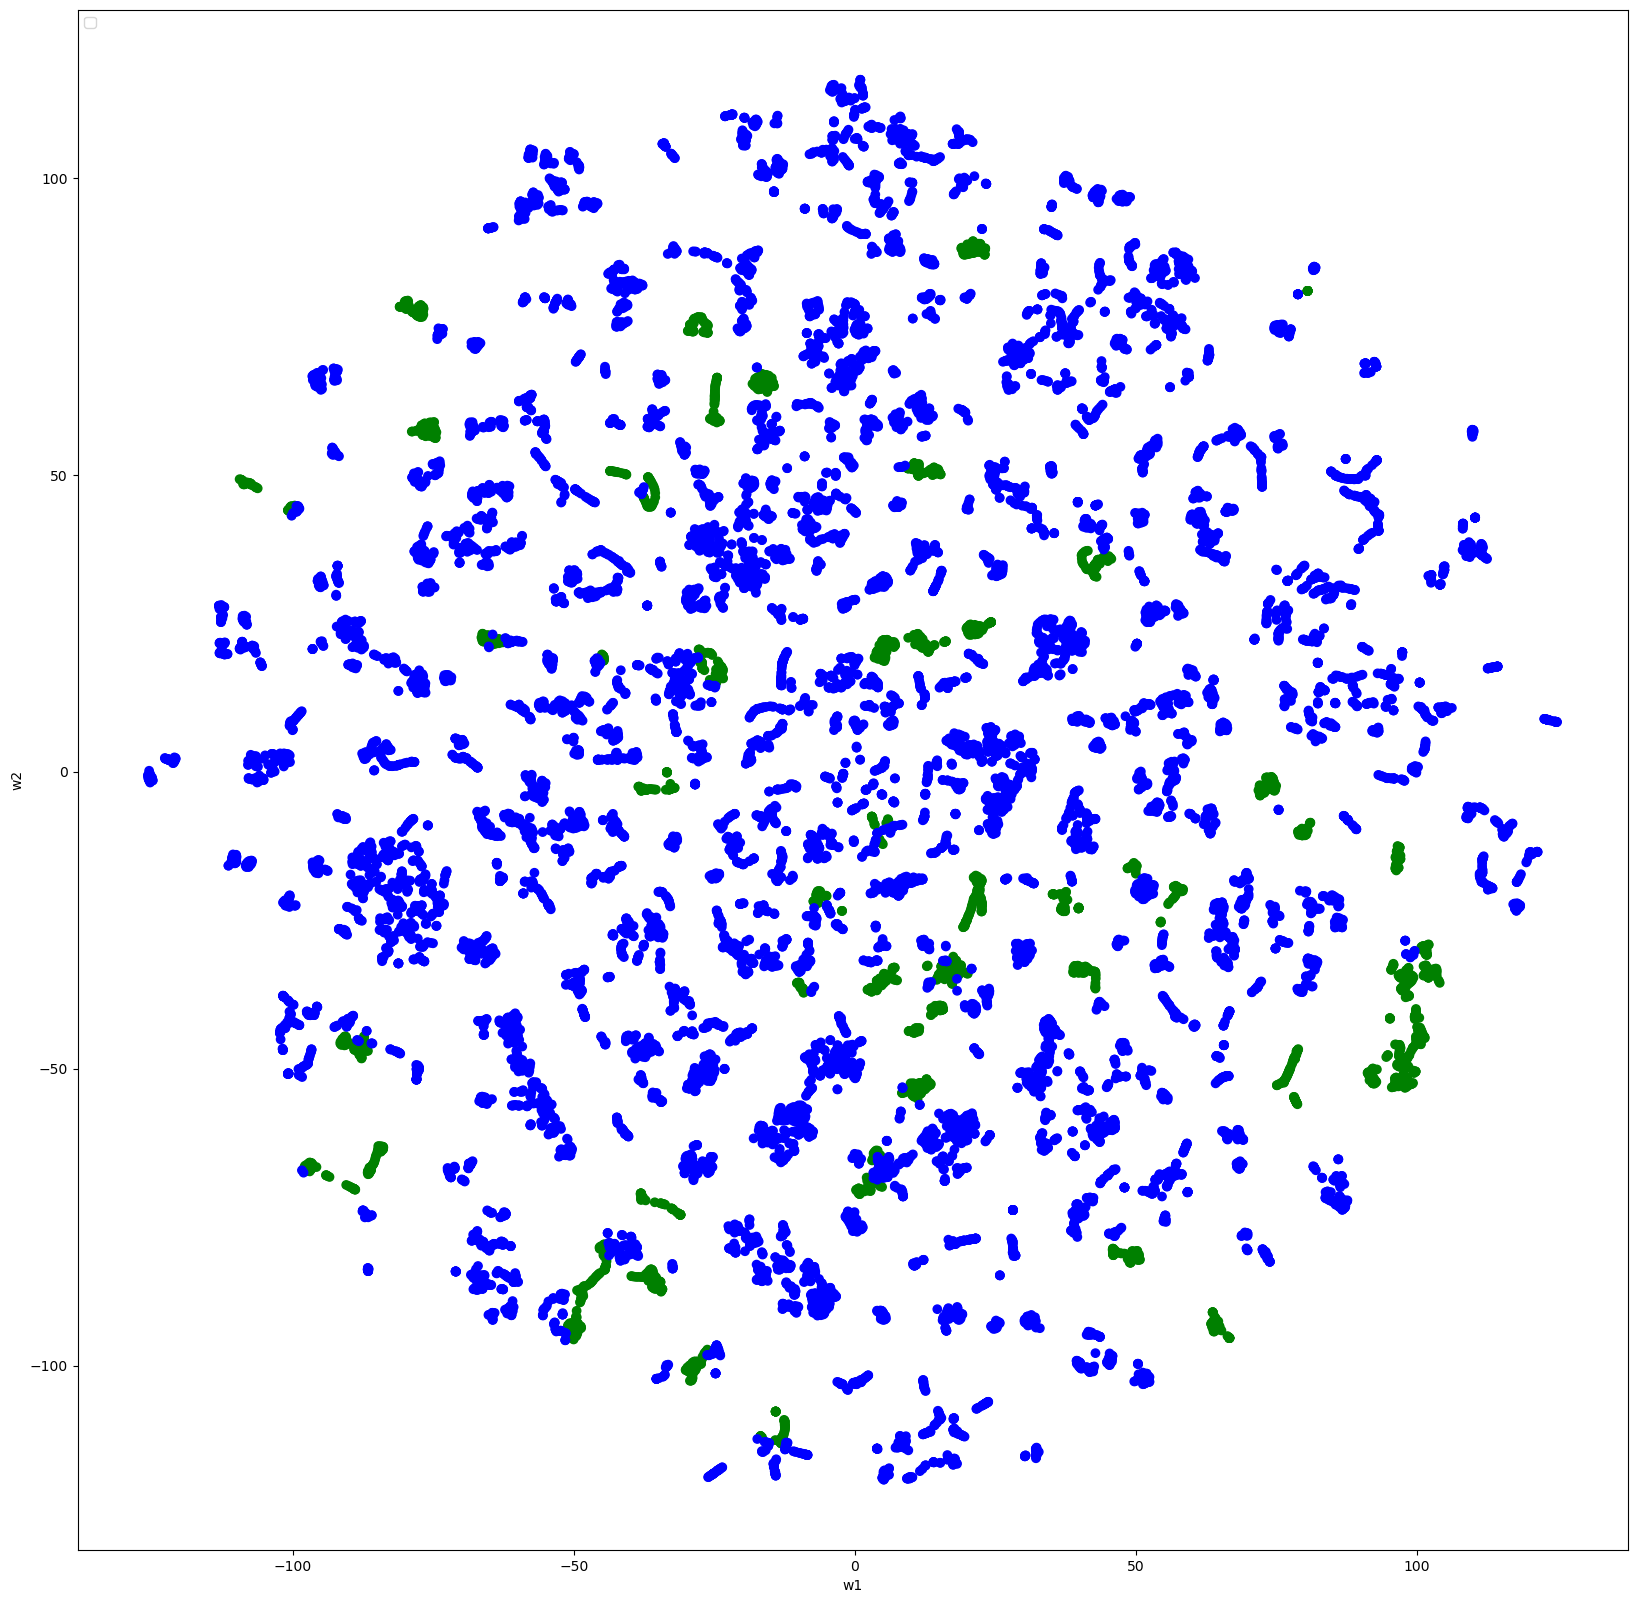

In [112]:
# А это уже визуализация в 2D; с учетом того, что в y_sample у нас только два значения, 0 и 1, и мы ранее обсуждали их количество, то 1 показаны зеленым, а 0 - синим цветом. Т.е. зеленым показаны элементы с максимальной концентрацией железа.

colors = ListedColormap(['blue', 'green'])
plt.figure(figsize = (20, 20))
plt.scatter(data_2d_tsne[:,0], data_2d_tsne[:,1], c = y_sample, cmap = colors)
plt.legend(loc=2)
plt.xlabel("w1")
plt.ylabel("w2")
plt.show()


Аналогично проделаем все для минимальных данных по концентрации железа

In [113]:
data_sample = pd.concat([
    datai[datai['label_min'] == 1].sample(frac=1.0, random_state=1),
    datai[datai['label_min'] != 1].sample(frac=0.5, random_state=1)
])
y_sample = data_sample['label_min']
X_sample = data_sample.drop(['y','label_min','label_max'],axis=1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


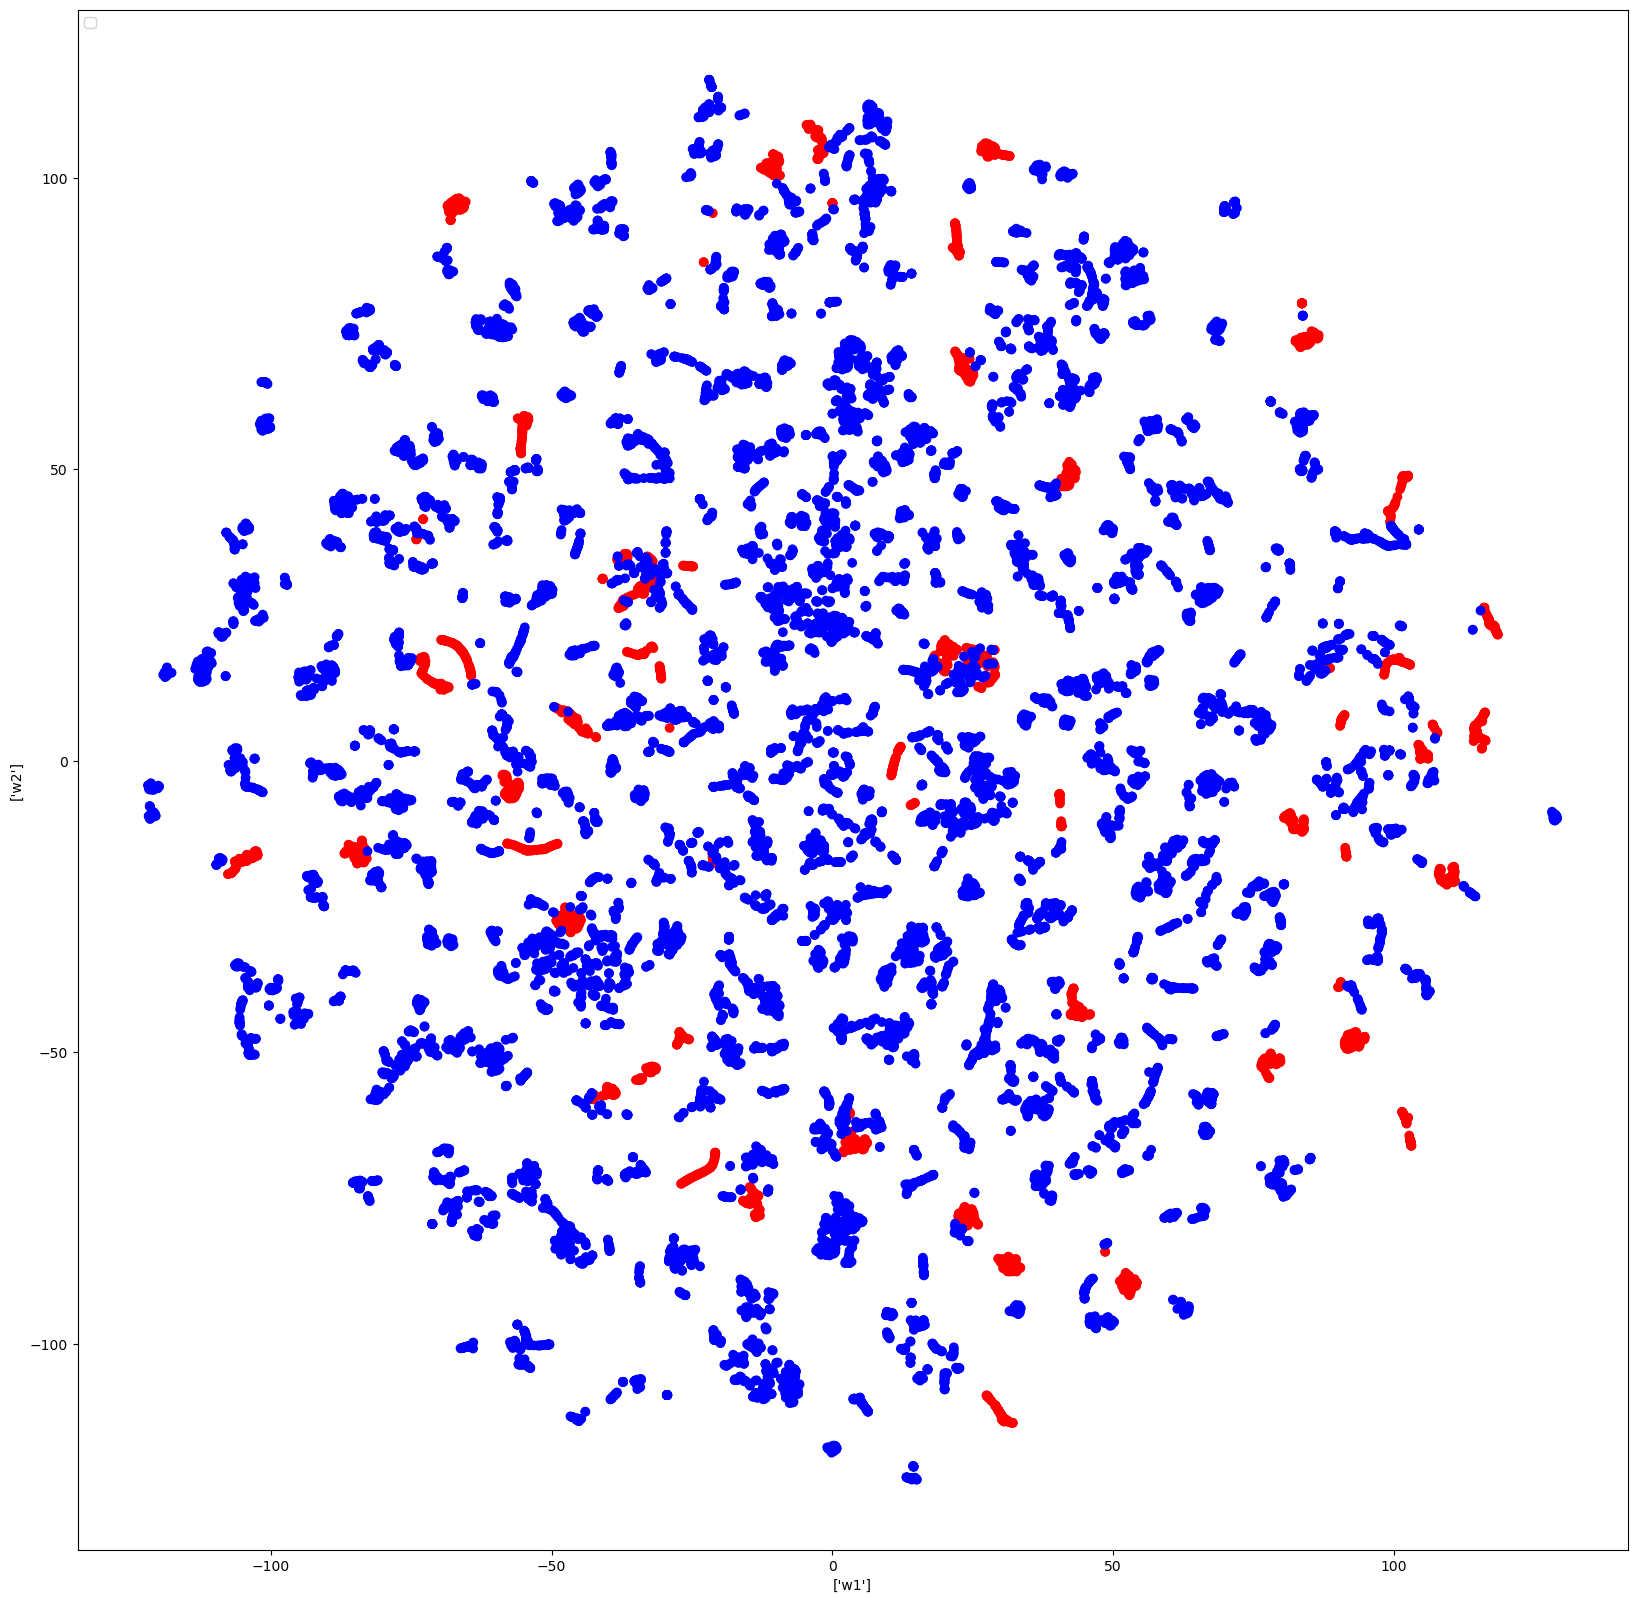

In [248]:
scaler = StandardScaler() # для t-sne обязательно нужна стандартизация признаков
X_sample_sc = scaler.fit_transform(X_sample)
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
data_2d_tsne = tsne.fit_transform(X_sample_sc)

# А это уже собственно сама визуализация в 2D; с учетом того, что в y_sample у нас только два значения, 0 и 1, и мы ранее обсуждали их количество, то 1 показаны красным, а 0 - синим цветом. Т.е. красным показаны элементы с минимальной концентрацией железа.
colors = ListedColormap(['blue', 'red'])
plt.figure(figsize = (20, 20))
plt.scatter(data_2d_tsne[:,0], data_2d_tsne[:,1], c = y_sample, cmap = colors)
plt.legend(loc=2)
plt.xlabel(["w1"])
plt.ylabel(["w2"])
plt.show()

__Вывод:__ анализируя 2D-визуализацию максимального и минимального содержания желаза в концентрате, можно заметить, то таких значиний на указанных картинках соответвенно не слишком много, но все-таки они имееются 

### 4.2. Исследование значимости показателей датчиков на максимальное и минимальное содержание железа в концентрате 

Посмотрим на корреляцию между 44 признаками основной таблицы datai и показателями с максимальной концентрацией железа. Т.е., проанализируем, какие признаки более всего положительно влияют на максимальную концентрацию железа.

In [255]:
plot_features_Max = CorrelationSelector(datai[info_features], datai['label_max'])
# формируем списки после корреляции
plot_features_Max_Pr = []
plot_features_Max_Imp = []
for i in range(len(plot_features_Max)):
    plot_features_Max_Pr.append(plot_features_Max[i][1])
    plot_features_Max_Imp.append(plot_features_Max[i][0])


In [257]:
# Формируем вспомагательный датафрейм на основе корреляции (влияние признаков на максимальную концентрацию железа)
df_plot_features_Max_Pr = pd.DataFrame(plot_features_Max_Pr, columns=['id'])
df_plot_features_Max_Pr["Max_Pr_imp"] = plot_features_Max_Imp
# df_plot_features_Max_Pr

In [259]:
#Объединяем с таблицей, в которой есть полное описание признаков по номерам признаков и сортируем в порядке значимости влияния на максимальную концентрацию железа
data_info_Max_res = pd.merge(data_info,df_plot_features_Max_Pr,
                         how='left', on=["id"]).dropna().sort_values(["Max_Pr_imp"], ascending=False)
data_info_Max_resf = data_info_Max_res.reset_index().drop(["index","status"], axis=1) # вводим новую индексацию строк , убираем старую и удаляем лишний старый столбец
#data_info_Max_resf

In [261]:
# теперь выберем ТОП-10 из полученного списка - это самые важные признаки, которые влияют на максимальную концентрацию железа
plot_features_Max = data_info_Max_resf[:10]
plot_features_Max

id                                        description        phys  \
0  1390                             Мощность мельницы № 34  кВт          
1  1323                            Расход воды в м-цу № 33  мз/час       
2  1663                           Вес руды в мельницу № 32  тонн/час     
3  1661                                     ВАЗМ м-цы № 34  %            
4  1313  Плотность на сливе пульподелителя ММС1 стадия2...         г/л   
5  1452                            Давление воды  ввод № 1  бар          
6  1659                                     ВАЗМ м-цы № 32  %            
7  1322                            Расход воды в м-цу № 32  мз/час       
8  1451                           Давление воды  на секцию  бар          
9  1453                            Давление воды  ввод № 2  бар          

   Max_Pr_imp  
0    0.113155  
1    0.094775  
2    0.091518  
3    0.072525  
4    0.070278  
5    0.069371  
6    0.067530  
7    0.057939  
8    0.049231  
9    0.038406

In [263]:
# выберем номера датчиков из списка ТОП-10
plot_features_Max_10 = plot_features_Max['id'].tolist()
print(plot_features_Max_10)

['1390', '1323', '1663', '1661', '1313', '1452', '1659', '1322', '1451', '1453']


<Figure size 2000x2000 with 0 Axes>

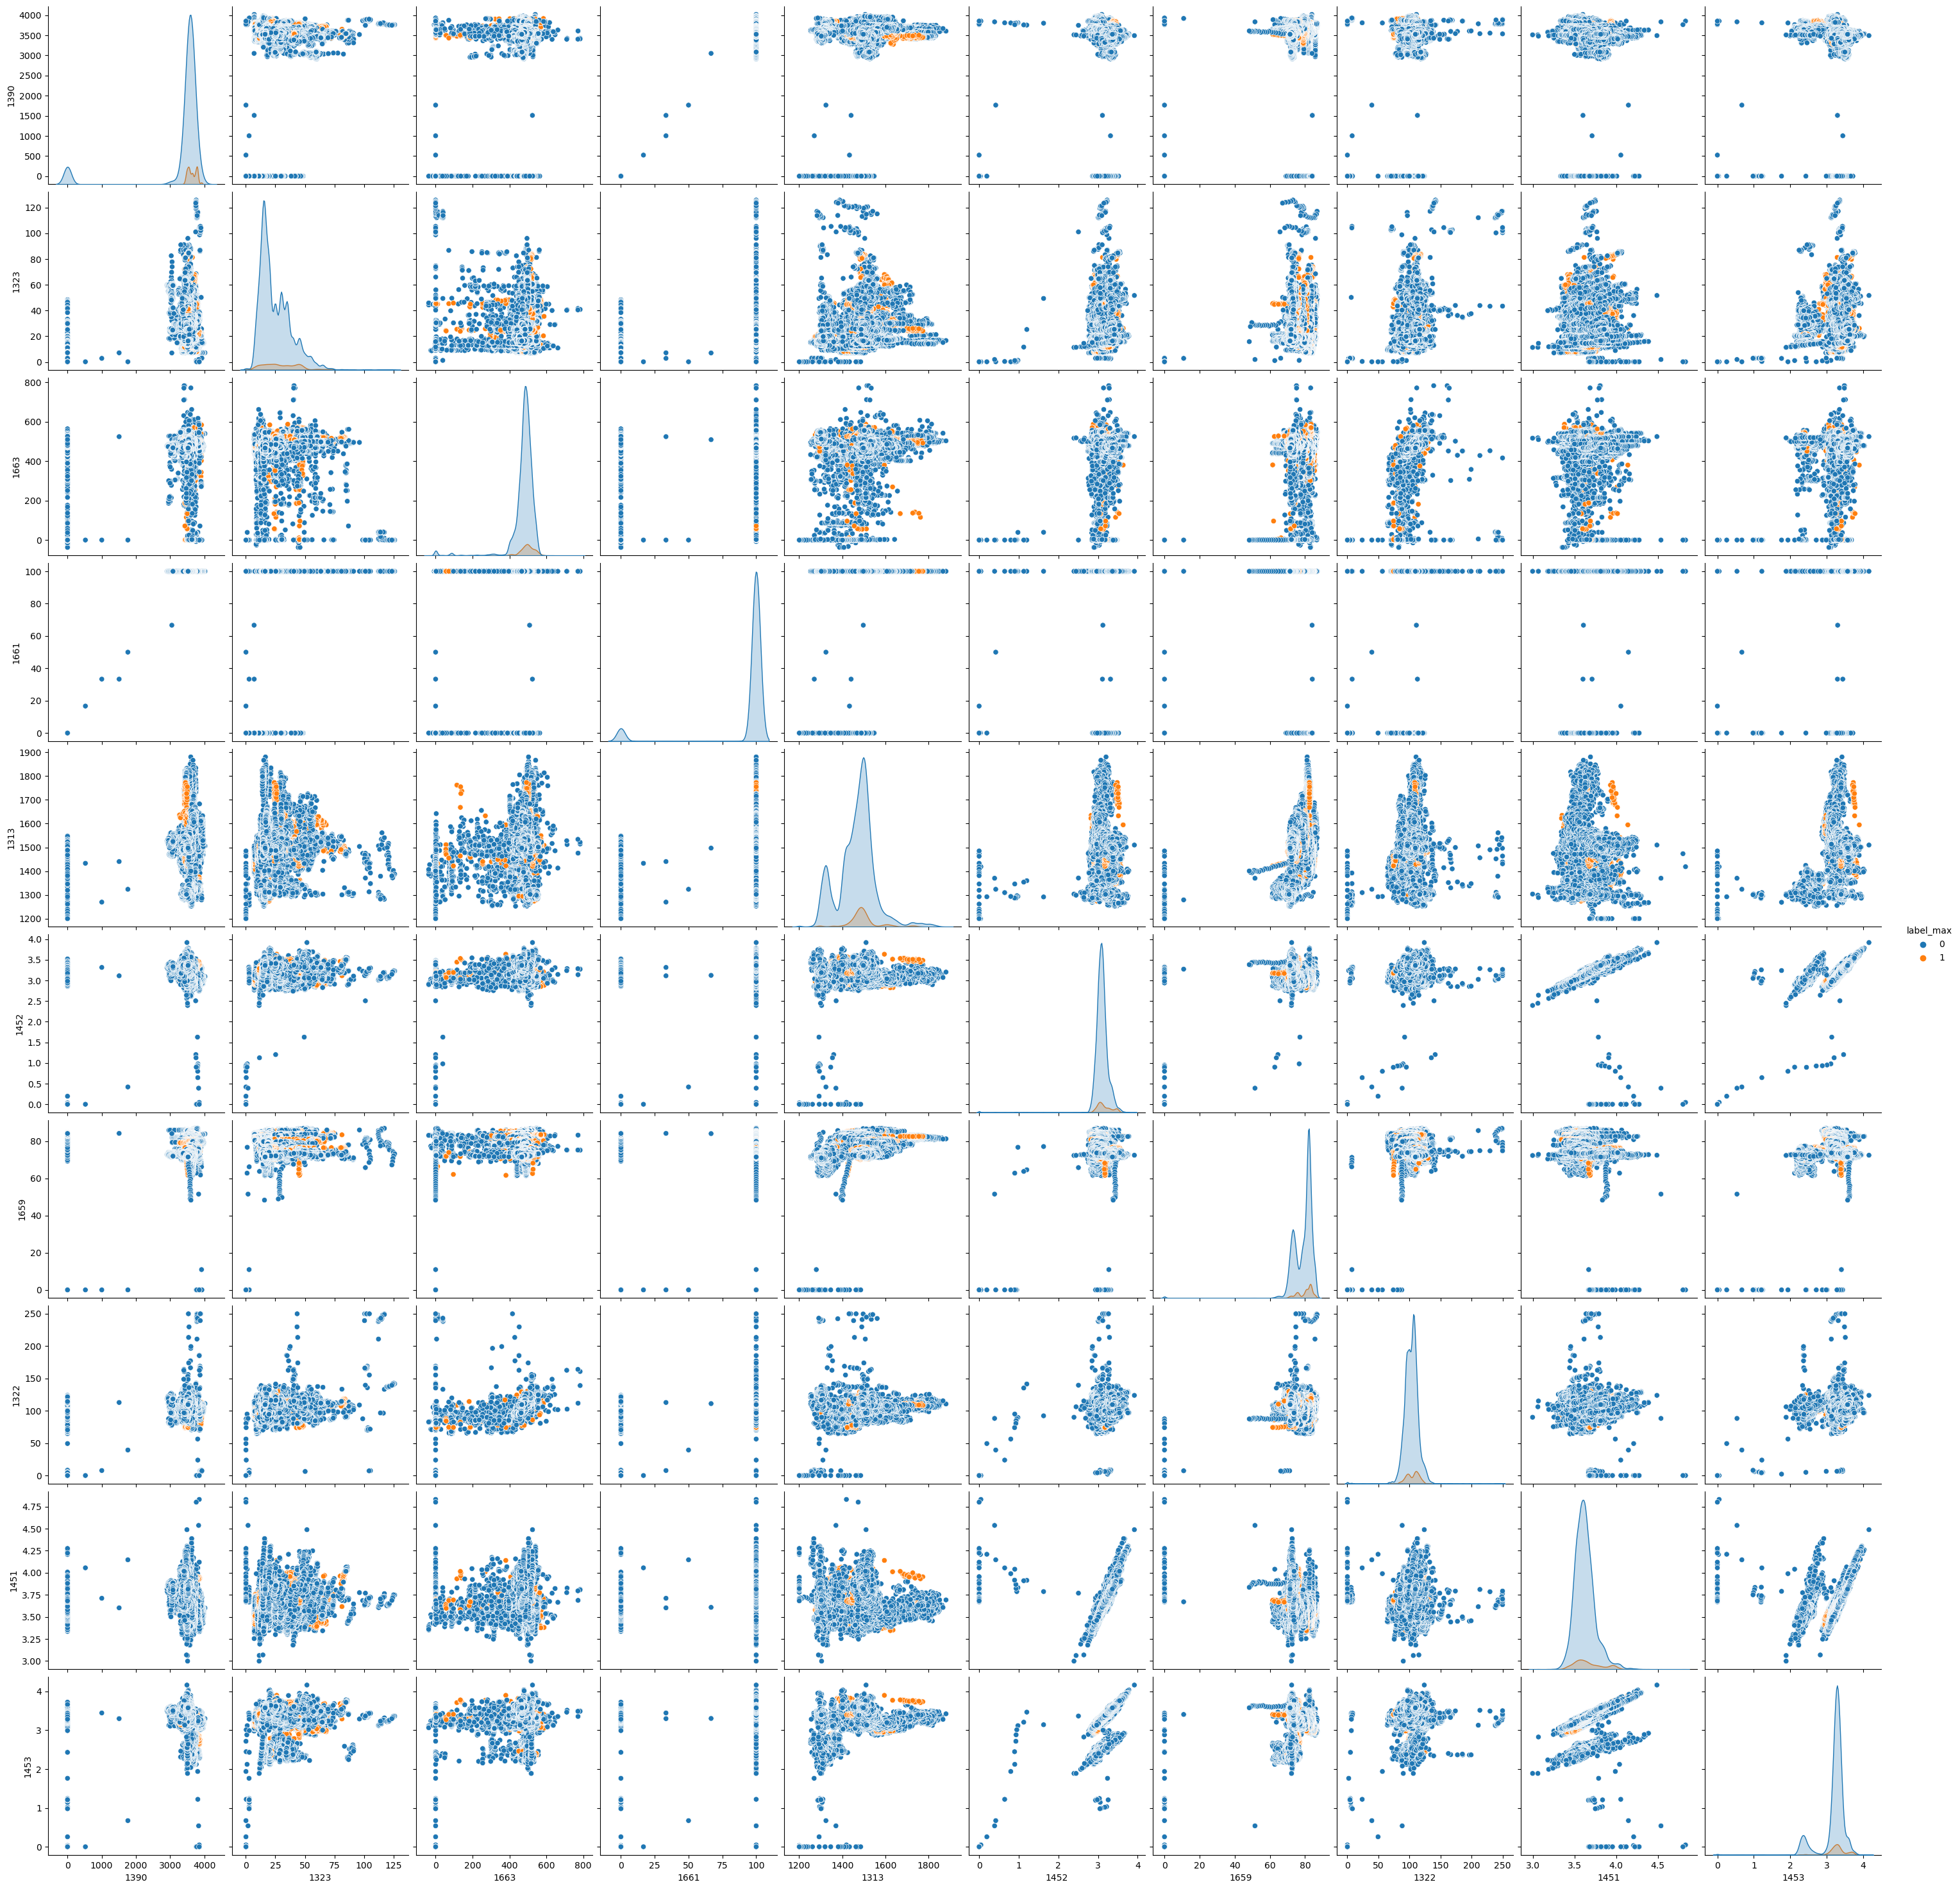

In [265]:

X_y = pd.concat((datai[plot_features_Max_10], datai['label_max']), axis=1)
new_palette = sns.color_palette("Paired")
plt.figure(figsize=(20,20))
sns.pairplot(X_y, vars=plot_features_Max_10, hue="label_max", size=3, diag_kind="kde")


In [269]:
# Посмотрим на корреляцию между 44 признаками основной таблицы datai и показателями с минимальной концентрацией железа. Т.е., проанализируем, какие признаки более всего отрицательно влияют на концентрацию железа.
plot_features_Min = CorrelationSelector(datai[info_features], datai['label_min'])
# формируем списки после корреляции
plot_features_Min_Pr = []
plot_features_Min_Imp = []
for i in range(len(plot_features_Min)):
    plot_features_Min_Pr.append(plot_features_Min[i][1])
    plot_features_Min_Imp.append(plot_features_Min[i][0])


In [271]:
# Формируем вспомагательный датафрейм на основе корреляции (влияние признаков на минимальную концентрацию железа)
df_plot_features_Min_Pr = pd.DataFrame(plot_features_Min_Pr, columns=['id'])
df_plot_features_Min_Pr["Min_Pr_imp"] = plot_features_Min_Imp
# df_plot_features_Min_Pr

In [273]:
#Объединяем с таблицей, в которой есть полное описание признаков по номерам признаков и сортируем в порядке значимости влияния на минимальную концентрацию железа
data_info_Min_res = pd.merge(data_info,df_plot_features_Min_Pr,
                         how='left', on=["id"]).dropna().sort_values(["Min_Pr_imp"], ascending=False)
data_info_Min_resf = data_info_Min_res.reset_index().drop(["index","status"], axis=1) # вводим новую индексацию строк , убираем старую и удаляем лишний старый столбец
# data_info_Min_resf

In [275]:
# теперь выберем ТОП-10_Min из полученного списка - это самые важные признаки, которые влияют на минимальную концентрацию железа
plot_features_Min = data_info_Min_resf[:10]
plot_features_Min

id                                        description        phys  \
0  1313  Плотность на сливе пульподелителя ММС1 стадия2...         г/л   
1  1444                                 Давление ГЦ № 32-7  бар          
2  1311              Плотность слива классификатора № 32-4  г/л          
3  1256                 Ток спирали классификаторов 32-4-2  А            
4  1452                            Давление воды  ввод № 1  бар          
5  1323                            Расход воды в м-цу № 33  мз/час       
6  1389                             Мощность мельницы № 33  кВт          
7  1449                                Давление ГЦ № 33-61  бар          
8  1453                            Давление воды  ввод № 2  бар          
9  1659                                     ВАЗМ м-цы № 32  %            

   Min_Pr_imp  
0    0.082386  
1    0.076053  
2    0.048404  
3    0.026994  
4    0.024545  
5    0.024303  
6    0.019794  
7    0.012697  
8    0.002690  
9   -0.003111

In [277]:
print(plot_features_Max.to_markdown())
print()
print("----------------------------------------------------------------------------------------------------")
print(plot_features_Min.to_markdown())

|    |   id | description                                                  | phys     |   Max_Pr_imp |
|---:|-----:|:-------------------------------------------------------------|:---------|-------------:|
|  0 | 1390 | Мощность мельницы № 34                                       | кВт      |    0.113155  |
|  1 | 1323 | Расход воды в м-цу № 33                                      | мз/час   |    0.0947753 |
|  2 | 1663 | Вес руды в мельницу № 32                                     | тонн/час |    0.0915179 |
|  3 | 1661 | ВАЗМ м-цы № 34                                               | %        |    0.0725252 |
|  4 | 1313 | Плотность на сливе пульподелителя ММС1 стадия2 (32 мельница) | г/л      |    0.0702777 |
|  5 | 1452 | Давление воды  ввод № 1                                      | бар      |    0.0693705 |
|  6 | 1659 | ВАЗМ м-цы № 32                                               | %        |    0.0675296 |
|  7 | 1322 | Расход воды в м-цу № 32                                    

### Вывод по разделу 4

Исследованы и получены ТОП-10 признаков, которые влияют на максимальное и минимальное содержание железа в концентрате соответственно

В каждый из этих списков попадают признаки 1313, 1323, 1452, 1659, 1453

## 5. Обучения моделей, исследование прогнозирования содержания железа  и значимости показателей на основе МО

### 5.1. Препроцессинг обучающей выборки
Ряд базовых моделей машинного обучения (в основном, использующих метод градиентного спуска для оптимизации параметров) весьма чувствительны к масштабу признаков, поэтому перед обучением модели обязательно нужна стандартизация или масштабирование.

In [289]:
# Определим функцию препроцессинга
def data_preprocess(data):
    
    final_data = data.copy()
    cols = final_data.columns

    std_scaler = StandardScaler()
    # Обучаем scaler и трансформируем данные
    final_data = std_scaler.fit_transform(final_data)
    final_data = pd.DataFrame(final_data, columns=cols)

    # Возвращаем как обработанные данные, так и сам объект scaler
    return final_data, std_scaler

### 5.2. Разбиваем выборку на обучающую и валидационную
Хочется понять, насколько модель может выявлять закономерности в данных.

Будем идти следующим путем:
модель обучаем на обучающей выборке и анализируем точность на ней. На обучающей выборке будем обучать модели с разными параметрами на кросс-валидации.
Лучшие модели проверим на отложенной выборке.

__Важно!!!! При разбиении на обучение и тест нужно учитывать, что наблюдения связаны со временем и их нельзя перемешивать.__

In [292]:
key_value = ["y"]
feature_list = info_features

In [294]:
# формируем датафрейм для МО, в котором признаки из таблицы Sensor_info + ключевая переменная
data_reg = datai[feature_list + key_value]

In [296]:
data_reg.head()

1253       1254        1255       1256         1310  \
2016-02-12 02:00:00  52.866667  79.900000  101.150001  62.503335  1748.788920   
2016-02-12 02:01:00  51.266667  75.310001  101.773334  62.843335  1739.972727   
2016-02-12 02:02:00  50.466667  70.833333   99.790001  63.070001  1833.035522   
2016-02-12 02:03:00  49.466667  66.866667   99.336668  62.390001  1784.457570   
2016-02-12 02:04:00  49.600000  63.806667   96.673333  61.370001  1732.109009   

                            1311         1312         1313         1314  \
2016-02-12 02:00:00  2011.577677  1570.849599  1503.548157  1119.619863   
2016-02-12 02:01:00  2020.598816  1551.948283  1493.728292  1115.090597   
2016-02-12 02:02:00  2035.087545  1544.847137  1503.307068  1118.175822   
2016-02-12 02:03:00  2070.340210  1541.748647  1511.062286  1107.806163   
2016-02-12 02:04:00  2050.359853  1555.637553  1529.568746  1112.136485   

                            1315  ...      1453  1454      1658       1659  \
2016-02-12 02:00:00  1779.300476  ...  3.278897   0.0  0.037977  82.331450   
2016-02-12 02:01:00  1791.088582  ...  3.263542   0.0  0.040992  81.926966   
2016-02-12 02:02:00  1771.072072  ...  3.228665   0.0  0.037977  81.500172   
2016-02-12 02:03:00  1778.109924  ...  3.189120   0.0  0.037977  81.144507   
2016-02-12 02:04:00  1770.571716  ...  3.180864   0.0  0.036772  81.244577   

                          1660   1661        1662        1663  1448     y  
2016-02-12 02:00:00  44.126156  100.0  125.899355  497.261638   0.0  66.4  
2016-02-12 02:01:00  44.126156  100.0  124.178765  492.105928   0.0  66.4  
2016-02-12 02:02:00  44.126156  100.0  122.930078  502.045284   0.0  66.4  
2016-02-12 02:03:00  44.126156  100.0  126.867761  501.268359   0.0  66.4  
2016-02-12 02:04:00  44.126156  100.0  121.668565  500.345702   0.0  66.4  

[5 rows x 45 columns]

In [298]:
data_reg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40260 entries, 2016-02-12 02:00:00 to 2016-04-15 10:59:00
Data columns (total 45 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1253    40260 non-null  float64
 1   1254    40260 non-null  float64
 2   1255    40260 non-null  float64
 3   1256    40260 non-null  float64
 4   1310    40260 non-null  float64
 5   1311    40260 non-null  float64
 6   1312    40260 non-null  float64
 7   1313    40260 non-null  float64
 8   1314    40260 non-null  float64
 9   1315    40260 non-null  float64
 10  1316    40260 non-null  float64
 11  1317    40260 non-null  float64
 12  1318    40260 non-null  float64
 13  1319    40260 non-null  float64
 14  1320    40260 non-null  float64
 15  1321    40260 non-null  float64
 16  1322    40260 non-null  float64
 17  1323    40260 non-null  float64
 18  1324    40260 non-null  float64
 19  1325    40260 non-null  float64
 20  1326    40260 non-null  float64
 21  

In [300]:
data_reg = data_reg.reset_index().drop(["index"], axis=1) # на всякий случай перенумеруем строки данных

In [302]:
data_reg.head()

1253       1254        1255       1256         1310         1311  \
0  52.866667  79.900000  101.150001  62.503335  1748.788920  2011.577677   
1  51.266667  75.310001  101.773334  62.843335  1739.972727  2020.598816   
2  50.466667  70.833333   99.790001  63.070001  1833.035522  2035.087545   
3  49.466667  66.866667   99.336668  62.390001  1784.457570  2070.340210   
4  49.600000  63.806667   96.673333  61.370001  1732.109009  2050.359853   

          1312         1313         1314         1315  ...      1453  1454  \
0  1570.849599  1503.548157  1119.619863  1779.300476  ...  3.278897   0.0   
1  1551.948283  1493.728292  1115.090597  1791.088582  ...  3.263542   0.0   
2  1544.847137  1503.307068  1118.175822  1771.072072  ...  3.228665   0.0   
3  1541.748647  1511.062286  1107.806163  1778.109924  ...  3.189120   0.0   
4  1555.637553  1529.568746  1112.136485  1770.571716  ...  3.180864   0.0   

       1658       1659       1660   1661        1662        1663  1448     y  
0  0.037977  82.331450  44.126156  100.0  125.899355  497.261638   0.0  66.4  
1  0.040992  81.926966  44.126156  100.0  124.178765  492.105928   0.0  66.4  
2  0.037977  81.500172  44.126156  100.0  122.930078  502.045284   0.0  66.4  
3  0.037977  81.144507  44.126156  100.0  126.867761  501.268359   0.0  66.4  
4  0.036772  81.244577  44.126156  100.0  121.668565  500.345702   0.0  66.4  

[5 rows x 45 columns]

In [304]:
data_reg["y"] = (data_reg["y"] - data_reg["y"].min())/(data_reg["y"].max() - data_reg["y"].min())
# масштабируем целевой показатель на отрезок [0,1]

In [306]:
# Разбиваем выборку на обучение и тест в пропорциях 70/30
# не забываем, что так приходится делать , чтобы не было перемешивания данных
test_size = 0.3
test_index= int(len(data_reg)*(1-test_size)) # С этого объекта в таблице начинаются тестовые данные
print(test_index)

28182


In [308]:
# Это разбивка под кроссвалидацию (без перемешивания)
X_train = data_reg.loc[:test_index][feature_list] # первые 70 % строк данных
y_train = data_reg.loc[:test_index][key_value]
X_test = data_reg.loc[test_index:][feature_list] # оставшиеся 30% строк данных
y_test = data_reg.loc[test_index:][key_value]

In [310]:
# подготовка к обучению на тренировочных данных
features, my_scaler = data_preprocess(X_train) # препроцессинг данных scaled_df, my_scaler
labels = y_train
train_feat = features
train_labels = labels


In [312]:
train_feat

1253      1254      1255      1256      1310      1311      1312  \
0      0.106708  0.138750  0.946138  0.428845  0.699394  0.759056  0.539323   
1      0.023251 -0.018845  1.011337  0.496755  0.647490  0.805759  0.422025   
2     -0.018477 -0.172549  0.803885  0.542027  1.195382  0.880769  0.377956   
3     -0.070638 -0.308742  0.756467  0.406209  0.909387  1.063275  0.358727   
4     -0.063683 -0.413805  0.477888  0.202481  0.601193  0.959835  0.444920   
...         ...       ...       ...       ...       ...       ...       ...   
28178  0.231894  0.265215 -0.274869 -0.465294  1.291471  0.132422 -0.631249   
28179  0.110185  0.165988 -0.357851 -0.465294  0.964361  0.390500 -0.649187   
28180  0.051070  0.018122 -0.263015 -0.499248  0.906016  0.535385 -0.653190   
28181 -0.035864 -0.081105 -0.286724 -0.453975  0.763737  0.391343 -0.643538   
28182 -0.074115 -0.149201 -0.310433 -0.476612  0.659290  0.243649 -0.650646   

           1313      1314      1315  ...      1452      1453  1454      1658  \
0      0.238661  0.507907  0.176398  ...  0.891187  0.013929   0.0  0.174557   
1      0.101693  0.389130  0.252382  ...  0.740769 -0.067289   0.0  0.405753   
2      0.235298  0.470038  0.123359  ...  0.604162 -0.251766   0.0  0.174557   
3      0.343469  0.198102  0.168724  ...  0.474677 -0.460935   0.0  0.174557   
4      0.601598  0.311661  0.120134  ...  0.343465 -0.504606   0.0  0.082078   
...         ...       ...       ...  ...       ...       ...   ...       ...   
28178  1.757503  1.242213  2.498957  ... -0.546531 -0.781525   0.0  0.405753   
28179  1.919107  1.203656  1.986263  ... -0.365467 -0.578682   0.0  0.405753   
28180  1.749809  1.349867  1.977248  ... -0.396975 -0.550317   0.0  0.220796   
28181  1.724879  1.033850  2.071282  ... -0.365899 -0.605619   0.0  0.544471   
28182  1.679854  0.960579  1.582776  ... -0.541999 -0.674798   0.0  0.313275   

           1659      1660      1661      1662      1663      1448  
0      0.186513  0.072706  0.320619 -1.791234  0.327624 -0.022583  
1      0.108573  0.072706  0.320619 -1.801327  0.254077 -0.022583  
2      0.026334  0.072706  0.320619 -1.808652  0.395863 -0.022583  
3     -0.042199  0.072706  0.320619 -1.785553  0.384780 -0.022583  
4     -0.022917  0.072706  0.320619 -1.816052  0.371618 -0.022583  
...         ...       ...       ...       ...       ...       ...  
28178 -0.685012  0.072706  0.320619 -1.522769  0.170516 -0.022583  
28179 -0.672814  0.072706  0.320619 -1.556138  0.169141 -0.022583  
28180 -0.679436  0.072706  0.320619 -1.576753  0.172090 -0.022583  
28181 -0.673395  0.072706  0.320619 -1.577837  0.155187 -0.022583  
28182 -0.672814  0.072706  0.320619 -1.578151  0.140556 -0.022583  

[28183 rows x 44 columns]

In [314]:
train_labels


y
0      0.842975
1      0.842975
2      0.842975
3      0.842975
4      0.842975
...         ...
28178  0.694215
28179  0.694215
28180  0.694215
28181  0.694215
28182  0.694215

[28183 rows x 1 columns]

__Вывод:__
провели подготовительную работу перед МО, разбили данные на тренировочные и тестовые; определили функцию для масштабирования данных

### 5.3. Подбираем параметры перебором по сетке
Функция перебора параметра по сетке GridSearch с процедурой кросс-валидации, метрика качества cредняя квадратичная ошибка (MSE).

Определим функцию Python show_cv_reg, которая автоматизирует процесс оценки модели машинного обучения (регрессии) с помощью кросс-валидации и, опционально, подбора гиперпараметров.
   
Функция является удобной оберткой для последовательного выполнения поиска лучших гиперпараметров и оценки итоговой регрессионной модели с использованием кросс-валидации, выводя ключевые метрики качества.


In [320]:

def show_cv_reg(clf_i, name, f, l, cv, score="neg_mean_squared_error", param=None, vbs=False):
    if param:
        grid_cv = GridSearchCV(
            clf_i,
            param,
            scoring=score,
            cv=cv,
            verbose=vbs,
            n_jobs=-1
        )
        grid_cv.fit(f, l)
        clf_i = grid_cv.best_estimator_
        print(grid_cv.best_params_)
    score = cross_val_score(clf_i,f,l,cv=cv, scoring=score, n_jobs=-1)
    print(name, -score.mean(), -score)


### 5.4. Обучение базовых моделей на стандартных параметрах
В качестве базовых моделей возьмем гребневую регрессию (Ridge), лассо (Lasso), простое решающее дерево (DecisionTree), случайный лес дерерьев (RandomForest), градиентный бустинг над решающими деревьями (GradientBoostingRegressor, XGBoost) и лассо регрессиями (AdaBoost), многослойная нейронная сеть (персептрон) (MLNeuralNetwork)

Инициализируем различные модели регрессии:
Здесь определяются 8 разных алгоритмов машинного обучения из библиотек scikit-learn и xgboost:

1. model_lr = Lasso(): Линейная регрессия с L1-регуляризацией (Лассо).
2. model_rr = Ridge(): Линейная регрессия с L2-регуляризацией (Ридж).
3. model_ada = AdaBoostRegressor(): Адаптивный бустинг (ансамбль слабых моделей).
4. model_t = DecisionTreeRegressor(): Дерево решений.
5. model_rf = RandomForestRegressor(): Случайный лес (ансамбль деревьев).
6. model_gb = GradientBoostingRegressor(): Градиентный бустинг.
7. model_xgb = XGBRegressor(): Экстремальный градиентный бустинг ( мощная модель).
8. model_nn = MLPRegressor(): Многослойный перцептрон (простая нейронная сеть).

Цель — сравнить эффективность разных алгоритмов  и определить, какой из них показывает наименьшую ошибку, т.е., фактически, 
этот код пока не работает с анализом парамером на сетке, а только выполняет кросс валиадацию со стандартным набором параметров.


In [326]:
model_lr = Lasso()
model_rr = Ridge()
model_ada = AdaBoostRegressor(estimator=Lasso()) #Added in version 1.2: base_estimator was renamed to estimator.
model_t = DecisionTreeRegressor()
model_rf = RandomForestRegressor()
model_gb = GradientBoostingRegressor()
model_xgb = XGBRegressor()
model_nn = MLPRegressor()


In [332]:
clfs = [
    ['RidgeRegressor', model_rr],
    ['LassoRegressor', model_lr],
    ['DecisionTree', model_t],
    ['AdaBoost', model_ada],
    ['RandomForest', model_rf],
    ['GradBoostTrees', model_gb],
    ['XGBoostRegressor', model_xgb],
    ['MLNeuralNetwork', model_nn],
]

tscv_iterator = TimeSeriesSplit(n_splits=5)
'''
Суть TimeSeriesSplit - кросс-валидация для временных рядов отличается от стандартной K-Fold тем, что она строго соблюдает хронологический порядок данных.
Обучаемся только на прошлых данных, чтобы предсказать будущее.
'''

'\nСуть TimeSeriesSplit - кросс-валидация для временных рядов отличается от стандартной K-Fold тем, что она строго соблюдает хронологический порядок данных.\nОбучаемся только на прошлых данных, чтобы предсказать будущее.\n'

In [330]:
for name, cl in clfs:
    show_cv_reg(cl, name, train_feat, train_labels, tscv_iterator)


RidgeRegressor 0.06256455863656109 [0.00390104 0.02513524 0.27745469 0.00223202 0.0040998 ]
LassoRegressor 0.004995296292659971 [0.00132713 0.01675884 0.00309416 0.00129954 0.00249681]
DecisionTree 0.016807565677662128 [0.00156578 0.01794673 0.05626898 0.00242443 0.00583191]
AdaBoost 0.004903757888880503 [0.00132831 0.01630584 0.00307597 0.00130395 0.00250472]
RandomForest 0.009824352076931653 [0.00133127 0.01691723 0.02685361 0.00121537 0.00280429]
GradBoostTrees 0.009614981246157884 [0.00126511 0.01522612 0.02744114 0.00140578 0.00273675]
XGBoostRegressor 0.013682460111995868 [0.00125176 0.01552006 0.04645209 0.00173111 0.00345728]
MLNeuralNetwork 0.5590542786133568 [0.04768077 2.59878245 0.11392474 0.02541386 0.00946958]


__Вывод:__ 

Это значения по выбранным моделям (в порядке следования обращения).Ссамая лучшая на этот момент модель __AdaBoost 0.004898353318568796__

1. RidgeRegressor 0.06256455863656109 [0.00390104 0.02513524 0.27745469 0.00223202 0.0040998 ]\2. 
LassoRegressor 0.004995296292659971 [0.00132713 0.01675884 0.00309416 0.00129954 0.00249681\]3. 
DecisionTree 0.016491719199833974 [0.00149316 0.01850981 0.05611256 0.00250627 0.0038368\ 4. ]
AdaBoost 0.004898353318568796 [0.00134024 0.01625793 0.00309493 0.00129702 0.002501\65. 5]
RandomForest 0.009420237997729692 [0.00133799 0.01706951 0.02461271 0.00124034 0.00284\06. 64]
GradBoostTrees 0.009308793869069576 [0.00126811 0.01594902 0.02517333 0.00142063 0.0027\3__7. 289]
XGBoostRegressor 0.013682460111995868 [0.00125176 0.01552006 0.04645209 0.00173111 0.003__\48. 5728]
MLNeuralNetwork 0.21572984979072496 [0.06868301 0.91165555 0.06179086 0.00993208 0.02\658776]

### 5.5. Подбор параметров моделей по кросс-валидации
Важно отметить, что так как измерения в соседние моменты времени зависимы, то кросс-валидацию нужно делать специальным образом, учитывая ось времени, чтобы случайно не задействовать информацию из будущего (не перемешивать наблюдения во времени), о которой модель не должна знать. Каждый валидационный фолд должен располагаться правее по оси времени относительно группы фолдов, на которых происходит обучение модели  (Ранее об этом уже сказали, но там были стандартные параметры, а здесь мы зададим конкретные ограничения).

In [306]:
clfs1 = [
    ['Ridge', model_rr],
    ['Lasso', model_lr],
    ['AdaBoost', model_ada]
   ]
parameters={

    'Ridge': {
        'alpha': np.arange(1e-04, 100.0, 0.5)
    },

    'Lasso': {
        'alpha': np.arange(1e-04, 100.0, 0.5)
    },

    'AdaBoost': {
            'n_estimators': [3, 5, 10],
            'learning_rate': np.linspace(1e-08, 1.0, num=20)
        }
}

for name, cl in clfs1:
    show_cv_reg(cl, name, train_feat, train_labels, tscv_iterator, param=parameters.get(name), vbs=True)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
{'alpha': 99.5001}
Ridge 0.014383996598340453 [0.00233112 0.02021612 0.04336079 0.0021183  0.00389366]
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
{'alpha': 0.5001}
Lasso 0.004995296292659971 [0.00132713 0.01675884 0.00309416 0.00129954 0.00249681]
Fitting 5 folds for each of 60 candidates, totalling 300 fits
{'learning_rate': 0.9473684215789474, 'n_estimators': 5}
AdaBoost 0.00490111839075248 [0.00135009 0.01626053 0.00311276 0.00129094 0.00249127]


__Выпишем полученные параметры по трем первым моделям:__

Fitting 5 folds for each of 200 candidates, totalling 1000 fits\
{'alpha': np.float64(99.5001)}\
__Ridge__ 0.014383996598339374 [0.00233112 0.02021612 0.04336079 0.0021183  0.00389366]\


Fitting 5 folds for each of 200 candidates, totalling 1000 fits\
{'alpha': np.float64(0.5001)}\
__Lasso__ 0.004995296292659971 [0.00132713 0.01675884 0.00309416 0.00129954 0.00249681]


Fitting 5 folds for each of 60 candidates, totalling 300 fits\
{'learning_rate': np.float64(0.9473684215789474), 'n_estimators': 3}\
__AdaBoost__ 0.0049146838590688885 [0.00131896 0.01632799 0.00313922 0.00129492 0.00249233]



In [308]:
clfs2 = [
   ['RandomForest', model_rf]
]
parameters={

    'RandomForest': {
        'n_estimators': [20, 50, 100],
        'max_depth': [8, 10, 12],
        'max_features': [i/10.0 for i in range(6, 11)],
        #'min_samples_split': [1, 3, 5],
        #'min_samples_leaf': [1, 3, 5]
        #'criterion': ['mae','mse']
    }

   }

for name, cl in clfs2:
    show_cv_reg(cl, name, train_feat, train_labels, tscv_iterator, param=parameters.get(name), vbs=True)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


KeyboardInterrupt: 

__Это данные параметров по модели RandomForest__ 

Fitting 5 folds for each of 45 candidates, totalling 225 fits\
{'max_depth': 8, 'max_features': 0.7, 'n_estimators': 20}\
__RandomForest__ 0.008191357470621325 [0.00121335 0.01391943 0.02167692 0.00143213 0.00271496]\


In [ ]:
clfs22 = [
     ['GradBoostTrees', model_gb]
   ]
parameters={

    'GradBoostTrees': {
        'n_estimators': [20, 50, 100],
        'learning_rate': np.linspace(1e-08, 0.5, num=10),
        'max_depth': [3, 5, 7],
        'subsample': [i/10.0 for i in range(6, 11)],
        'max_features': [i/10.0 for i in range(6, 11)],
        # 'min_samples_split': [2],
        # 'min_samples_leaf': [1]
    }

   }

for name, cl in clfs22:
    show_cv_reg(cl, name, train_feat, train_labels, tscv_iterator, param=parameters.get(name), vbs=True)

Fitting 5 folds for each of 2250 candidates, totalling 11250 fits


KeyboardInterrupt: 

__Это данные параметров по GradBoostTrees__

{'n_estimators': 20, 'learning_rate': 0.055555564444444448, 'max_depth': 5, 'max_features': 0.9, 'subsample': 0.6}
__GradBoostTrees__ 0.00195515157208 [ 0.00260184  0.00096232  0.00193408  0.00237125  0.00190627]

In [ ]:
clfs31 = [
   ['XGBoostRegressor', model_xgb],
      ]
parameters={

     'XGBoostRegressor': {
        'n_estimators': [20, 50, 100],
        'max_depth': [3, 5, 7],
        'min_child_weight': [1, 2, 4],
        'gamma': [i/10.0 for i in range(3, 6)],
        'subsample': [i/10.0 for i in range(6, 11)],
        'colsample_bytree': [i/10.0 for i in range(6, 11)],
    }

   }

for name, cl in clfs31:
    show_cv_reg(cl, name, train_feat, train_labels, tscv_iterator, param=parameters.get(name), vbs=True)

Fitting 5 folds for each of 2025 candidates, totalling 10125 fits


KeyboardInterrupt: 

__Это данные параметров по XGBoostRegressor__

{'subsample': 0.9, 'max_depth': 7, 'gamma': 0.4, 'min_child_weight': 1, 'n_estimators': 100, 'colsample_bytree': 0.7}
__XGBoostRegressor__ 0.00195212826277 [ 0.00258228  0.00102391  0.00199122  0.00234745  0.00181578]

In [ ]:
clfs32 = [
       ['MLNeuralNetwork', model_nn]
   ]
parameters={

      'MLNeuralNetwork': {
        'hidden_layer_sizes': [(25, 1), (50, 1), (25, 2), (50, 2)],
        'activation': ['relu', 'tanh'],
        'alpha': np.linspace(0.000001, 1.0, num=10),
     }

   }

for name, cl in clfs32:
    show_cv_reg(cl, name, train_feat, train_labels, tscv_iterator, param=parameters.get(name), vbs=True)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
{'activation': 'relu', 'alpha': np.float64(0.444445), 'hidden_layer_sizes': (25, 2)}
MLNeuralNetwork 0.022061786693914624 [0.00223259 0.06384853 0.03886097 0.00242218 0.00294465]


__Параметры по MLNeuralNetwork__ \
Fitting 5 folds for each of 80 candidates, totalling 400 fits\
{'activation': 'relu', 'alpha': np.float64(0.444445), 'hidden_layer_sizes': (25, 2)}\
__MLNeuralNetwork__ 0.022061786693914624 [0.00223259 0.06384853 0.03886097 0.00242218 0.00294465]\



### 5.6. Обучаем модели на оптимальных подобранных параметрах

In [343]:

final_model1 = Ridge(alpha=99.5, random_state=1)
final_model2 = Lasso(alpha=0.5, random_state=1)
final_model3 = AdaBoostRegressor(
    estimator=Lasso(),
    n_estimators=5,
    learning_rate=0.842105,
    random_state=1
)
final_model4 = RandomForestRegressor(
    max_depth = 8,
    n_estimators=50,
    max_features = 0.6,
    n_jobs=-1,
    random_state=1
)


final_model5 = GradientBoostingRegressor(
    n_estimators=20,
    max_depth = 5,
    learning_rate = 0.0555,
    max_features = 0.9,
    subsample = 0.6,
    random_state=1
)
final_model6 = MLPRegressor(
    hidden_layer_sizes=(25,1),
    activation='relu',
    alpha=0.44444,
    random_state=1
)


final_model7 = XGBRegressor(max_depth=7,
    n_estimators = 100,
    colsample_bytree=0.7,
    subsample=0.9,
    gamma=0.4,
    min_child_weight=1
)

### 5.7. Тестируем модели на отложенной выборке

In [345]:
# Вначале обучаем на масштабированных данных (после препроцессинга) и смотрим точность на тренировочных данных на разных метриках
final_model1.fit(train_feat, train_labels)
final_model2.fit(train_feat, train_labels)
final_model3.fit(train_feat, train_labels)
final_model4.fit(train_feat, train_labels)
final_model5.fit(train_feat, train_labels)
final_model6.fit(train_feat, train_labels)
final_model7.fit(train_feat, train_labels)

predict = []
predict.append(final_model1.predict(train_feat))
predict.append(final_model2.predict(train_feat))
predict.append(final_model3.predict(train_feat))
predict.append(final_model4.predict(train_feat))
predict.append(final_model5.predict(train_feat))
predict.append(final_model6.predict(train_feat))
predict.append(final_model7.predict(train_feat))

print ('\n Mean squared error: \n')

for n, model_name in enumerate(['Ridge', 'Lasso', 'AdaBoost', 'RandomForest', 'GradBoostTrees', 'MLNeuralNetwork', 'XGBoost']):
    print (model_name, mean_squared_error(y_train, [x for x in predict[n]]))

print ('\n Mean absolute error: \n')

for n, model_name in enumerate(['Ridge', 'Lasso', 'AdaBoost', 'RandomForest', 'GradBoostTrees', 'MLNeuralNetwork', 'XGBoost']):
    print (model_name, mean_absolute_error(y_train, [x for x in predict[n]]))

print ('\n Median_absolute_error: \n')

for n, model_name in enumerate(['Ridge', 'Lasso', 'AdaBoost', 'RandomForest', 'GradBoostTrees', 'MLNeuralNetwork', 'XGBoost']):
    print (model_name, median_absolute_error(y_train, [x for x in predict[n]]))


print ('\n Max_error: \n')

for n, model_name in enumerate(['Ridge', 'Lasso', 'AdaBoost', 'RandomForest', 'GradBoostTrees', 'MLNeuralNetwork', 'XGBoost']):
    print (model_name, max_error(y_train, [x for x in predict[n]]))




 Mean squared error: 

Ridge 0.003782716168462118
Lasso 0.004478910842065595
AdaBoost 0.005020894787306393
RandomForest 0.0010408831963370636
GradBoostTrees 0.0017755437884383605
MLNeuralNetwork 0.003401101036467868
XGBoost 0.0014095255993339792

 Mean absolute error: 

Ridge 0.03610808014619676
Lasso 0.036012740595469835
AdaBoost 0.04441863484179425
RandomForest 0.02361949589251494
GradBoostTrees 0.029079135738399164
MLNeuralNetwork 0.03344459361519646
XGBoost 0.02734983355705443

 Median_absolute_error: 

Ridge 0.025118533365075524
Lasso 0.022790246626021693
AdaBoost 0.03780633246171761
RandomForest 0.018368609223289645
GradBoostTrees 0.020583695887412268
MLNeuralNetwork 0.02281592839394786
XGBoost 0.020869402846028673

 Max_error: 

Ridge 0.7548807689436178
Lasso 0.8201849599855492
AdaBoost 0.7969044113399352
RandomForest 0.2554312519027206
GradBoostTrees 0.5387373507021801
MLNeuralNetwork 0.7521433329837527
XGBoost 0.50845072683224


__Вывод:__ Самый лучший на тренировочных данных для RandomForest по всем метрикам



In [348]:
# Вначале выполняем препроцессинг тестовых данных
features, my_scaler = data_preprocess(X_test)
labels = y_test
test_feat = features
test_labels = labels

In [321]:
#test_feat

In [323]:
#test_labels

In [350]:
# Теперь предсказываем для X_test после препроцессинга и проверяем точность на нескольких метриках
predict = []
predict.append(final_model1.predict(test_feat))
predict.append(final_model2.predict(test_feat))
predict.append(final_model3.predict(test_feat))
predict.append(final_model4.predict(test_feat))
predict.append(final_model5.predict(test_feat))
predict.append(final_model6.predict(test_feat))
predict.append(final_model7.predict(test_feat))

print ('\n Mean squared error: \n')

for n, model_name in enumerate(['Ridge', 'Lasso', 'AdaBoost', 'RandomForest', 'GradBoostTrees', 'MLNeuralNetwork', 'XGBoost']):
    print (model_name, mean_squared_error(y_test, [x for x in predict[n]]))

print ('\n Mean absolute error: \n')

for n, model_name in enumerate(['Ridge', 'Lasso', 'AdaBoost', 'RandomForest', 'GradBoostTrees', 'MLNeuralNetwork', 'XGBoost']):
    print (model_name, mean_absolute_error(y_test, [x for x in predict[n]]))


print ('\n Median_absolute_error: \n')

for n, model_name in enumerate(['Ridge', 'Lasso', 'AdaBoost', 'RandomForest', 'GradBoostTrees', 'MLNeuralNetwork', 'XGBoost']):
    print (model_name, median_absolute_error(y_test, [x for x in predict[n]]))

print ('\n Max_error: \n')

for n, model_name in enumerate(['Ridge', 'Lasso', 'AdaBoost', 'RandomForest', 'GradBoostTrees', 'MLNeuralNetwork', 'XGBoost']):
    print (model_name, max_error(y_test, [x for x in predict[n]]))



 Mean squared error: 

Ridge 0.003215463972939053
Lasso 0.0021365621633696245
AdaBoost 0.0022555288759669363
RandomForest 0.005144743279257147
GradBoostTrees 0.005586099480193184
MLNeuralNetwork 0.002368463562919113
XGBoost 0.003893725531385883

 Mean absolute error: 

Ridge 0.04336430760216789
Lasso 0.033173855075040434
AdaBoost 0.035926577861382473
RandomForest 0.05421105071505581
GradBoostTrees 0.05680018796477154
MLNeuralNetwork 0.0355658905729706
XGBoost 0.045811507376113156

 Median_absolute_error: 

Ridge 0.03581836604337579
Lasso 0.026796530233483162
AdaBoost 0.029541869651800723
RandomForest 0.040879340233106964
GradBoostTrees 0.04156569770338969
MLNeuralNetwork 0.026818521054318423
XGBoost 0.033066260913186984

 Max_error: 

Ridge 0.3353313986789793
Lasso 0.258201488911169
AdaBoost 0.234920940265555
RandomForest 0.2676468900698523
GradBoostTrees 0.28742998250104546
MLNeuralNetwork 0.2756345170243747
XGBoost 0.2795965026232822


__1 вывод из анализа точности моделей__ \
Модель Lasso показывает себя как самая точная в среднем по выборке (имеет наименьшие среднюю квадратичную и среднюю абсолютную ошибки).\
Модель AdaBoost имеет наименьшую максимальную ошибку, что означает, что она не совершает экстремально больших промахов на отдельных, самых сложных примерах.\
В целом, модель Lasso является наиболее сбалансированным и точным выбором.





__но при попытке визуализировать результат Lasso выдала результат из полностью одинаковых чисел__

Если модель Lasso выдала результат (прогнозы), состоящий из полностью одинаковых чисел (константное значение для всех тестовых примеров), то её низкие показатели ошибки (MSE, MAE) вводят в заблуждение.

__Модель Lasso в этом случае бесполезна, несмотря на красивые цифры ошибок.__

Если исключить Lasso из рассмотрения, мы возвращаемся к анализу остальных моделей на тестовых данных:


__2 вывод из анализа точности после отброса Lasso__

С моделью AdaBoost, которая теперь стала самой лучшей,  оказалось тоже самое - она выдает одинаковые предсказанные значения, ее тоже нужно исключить 
и выбирать из оставшихся  

На тестовых данных получается самая хорошая модель  __MLNeuralNetwork__ и близко к ней __XGBoost__

Выбираем как лучшую  __MLNeuralNetwork__

In [358]:
y_pred = final_model6.predict(test_feat)

In [360]:
y_pred

array([0.79837279, 0.80538163, 0.80107303, ..., 0.8097143 , 0.81221437,
       0.80627854])

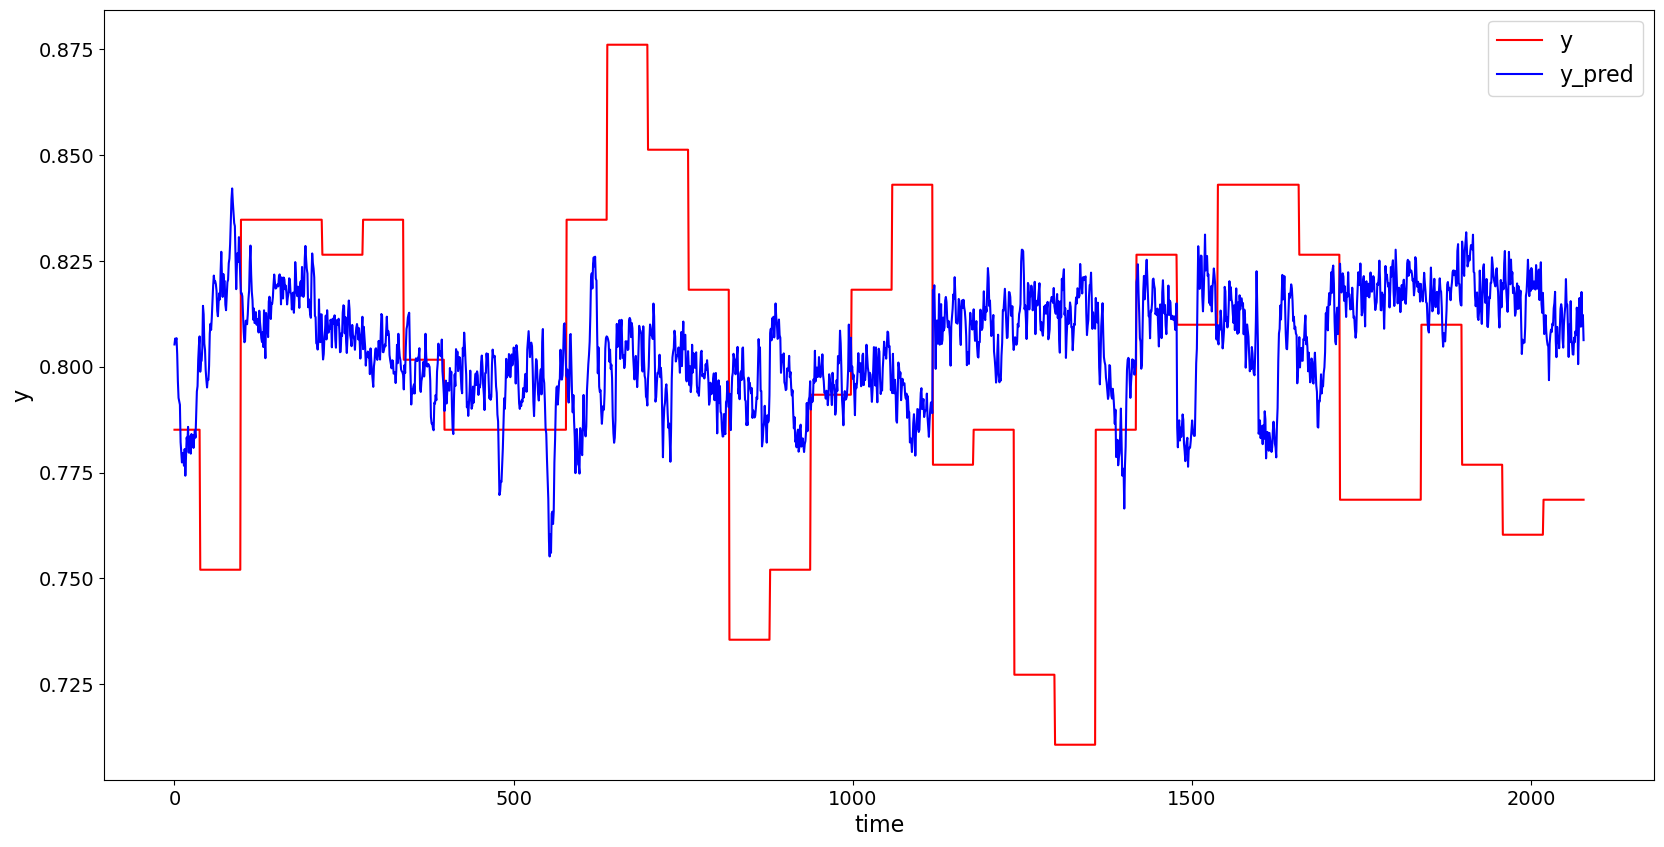

In [362]:
plt.figure(figsize=(20,10))
plt.plot(y_test[10000:].values, "r", label="y")
plt.plot(y_pred[10000:], "b", label="y_pred")
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel("time", fontsize=16)
plt.ylabel("y", fontsize=16)
plt.legend(loc='best', fontsize=16)
#plt.xlim([0,100])
plt.show()

__Вывод:__

После анализа результатов обучения нескольких моделей и точности на отложенной выборке, в качестве лучше была выбрана __MLNeuralNetwork__;
получены с ее помощью рещультаты прогнозирования концентрации железа и они визуализированы для отоложенной выборки в сравнении с известными данными из отложенной выборки

### 5.8. Наиболее значимые признаки согласно лучшей модели

In [366]:

from sklearn.inspection import permutation_importance

result = permutation_importance(final_model6, test_feat, y_test, n_repeats=10, random_state=42)


sorted_idx_asc = result.importances_mean.argsort()

sorted_idx_desc = sorted_idx_asc[::-1]
print("Feature Importances (Permutation):")
for i in sorted_idx_desc:
    print(f"  {test_feat.columns[i]}: {result.importances_mean[i]:.4f} +/- {result.importances_std[i]:.4f}")



Feature Importances (Permutation):
  1323: 0.0237 +/- 0.0022
  1446: 0.0195 +/- 0.0005
  1662: 0.0166 +/- 0.0017
  1660: 0.0160 +/- 0.0007
  1388: 0.0159 +/- 0.0011
  1389: 0.0116 +/- 0.0007
  1325: 0.0115 +/- 0.0011
  1443: 0.0095 +/- 0.0005
  1314: 0.0090 +/- 0.0004
  1317: 0.0062 +/- 0.0013
  1444: 0.0059 +/- 0.0004
  1326: 0.0056 +/- 0.0004
  1255: 0.0053 +/- 0.0005
  1311: 0.0052 +/- 0.0005
  1659: 0.0048 +/- 0.0005
  1324: 0.0044 +/- 0.0008
  1658: 0.0036 +/- 0.0002
  1312: 0.0033 +/- 0.0003
  1322: 0.0018 +/- 0.0003
  1387: 0.0008 +/- 0.0002
  1310: 0.0003 +/- 0.0003
  1454: 0.0000 +/- 0.0000
  1661: 0.0000 +/- 0.0000
  1663: -0.0001 +/- 0.0002
  1449: -0.0009 +/- 0.0020
  1447: -0.0010 +/- 0.0002
  1315: -0.0013 +/- 0.0007
  1448: -0.0013 +/- 0.0004
  1358: -0.0015 +/- 0.0012
  1256: -0.0016 +/- 0.0008
  1321: -0.0019 +/- 0.0003
  1357: -0.0056 +/- 0.0011
  1253: -0.0076 +/- 0.0005
  1453: -0.0079 +/- 0.0004
  1254: -0.0095 +/- 0.0006
  1313: -0.0103 +/- 0.0022
  1316: -0.0110 

In [368]:
# Создадим словарь признаков для дальнейшего объединения с номерами признаков
feature_mapping = {
    '1253' :'Ток спирали классификаторов',
    '1254' :'Ток спирали классификаторов' ,
    '1255' :'Ток спирали классификаторов' ,
     '1256'	: 'Ток спирали классификаторов',
	'1310':'Плотность слива классификатора ',
 	'1311':'Плотность слива классификатора',
  '1312':'Плотность на сливе пульподелителя ММС1 стадия1...'	,
	'1313':'Плотность на сливе пульподелителя ММС1 стадия2...	',
	'1314':'Плотность на сливе гидроциклонов 32',
	'1315':'Плотность песков МД 3-7'	,
	'1316':'Плотность на сливе гидроциклонов 33'	,
	'1317':'Плотность песков МД 3-8'	,
	'1318':'Плотность песков МД 3-9	',
	'1319':'Плотность питания 4-й стадии ММС'	,
	'1320':'Плотность питания 5-й стадии ММС'	,
	'1321':'Расход воды в м-цу № 31'	,
	'1322':'Расход воды в м-цу № 32'	,
	'1323':'Расход воды в м-цу № 33'	,
	'1324':'Расход воды в м-цу № 34',
	'1325':'Расход воды в бутару м-цы № 31'	,
	'1326':'Расход воды в бутару м-цы № 32'	,
	'1357':'Уровень пульпы в зумпфе № 2',
	'1358':'Уровень пульпы в зумпфе № 3'	,
	'1387':'Мощность мельницы № 31'	,
	'1388':'Мощность мельницы № 32',
	'1389':'Мощность мельницы № 33'	,
	'1390':'Мощность мельницы № 34',
	'1443':'Давление ГЦ № 32-6'	,
	'1444':'Давление ГЦ № 32-7'	,
	'1445':'Давление ГЦ № 32-61'	,
	'1446':'Давление ГЦ № 32-71'	,
	'1447':'Давление ГЦ № 33-6'	,
	'1449':'Давление ГЦ № 33-61'	,
	'1450':'Давление ГЦ № 33-71'	,
	'1451':'Давление воды на секцию'	,
	'1452':'Давление воды ввод № 1',
	'1453':'Давление воды ввод № 2'	,
	'1454':'_Кл.-0,045+0 мм в сливе г/ц (ПИК)'	,
	'1457':'Потери магнетита в хвостах 3,4 секции'	,
	'1658':'ВАЗМ м-цы № 31'	,
	'1659':'ВАЗМ м-цы № 32'	,
  '1660':'ВАЗМ м-цы № 33'	,
	'1661':'ВАЗМ м-цы № 34'	,
	'1662':'Вес руды в мельницу № 31'	,
	'1663':'Вес руды в мельницу № 32'	,
	'1668':'Содержание готового класса в продукте 3 секции...'	,
	'1448':'3стадия к мельнице №34. Давление на входе в ба...',
}

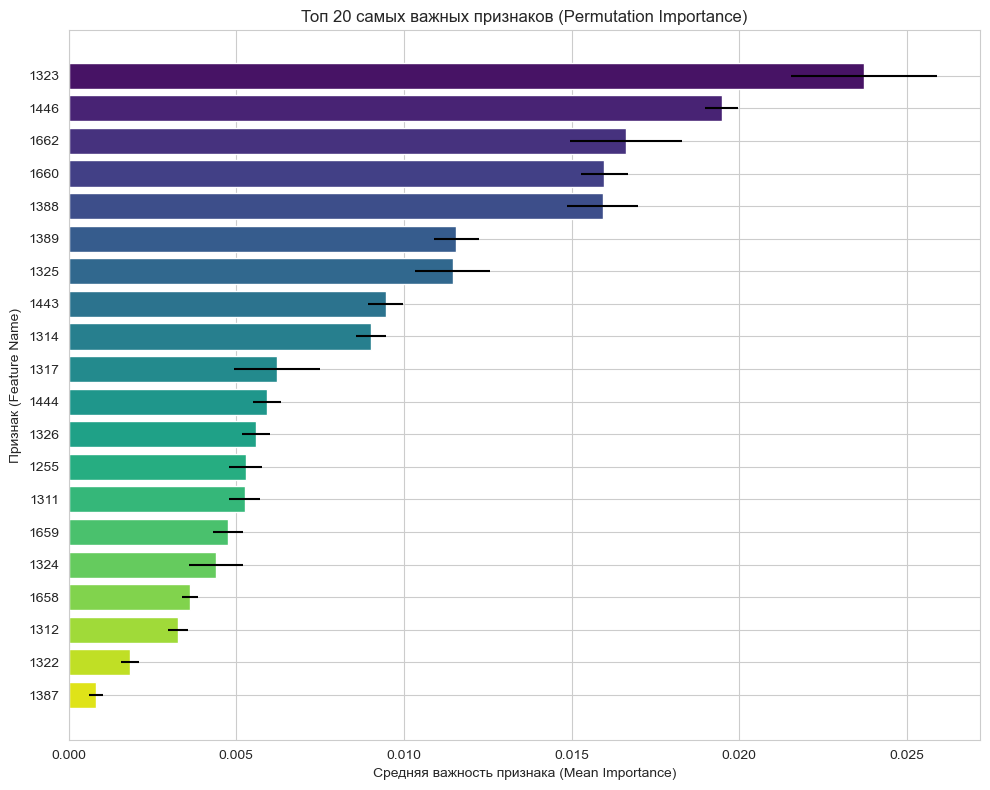

In [372]:
# 2. Выбираем ТОП-20 самых важных признаков, которые влият на процесс концентрации железа согласно лучшей модели 
top_n = 20
top_indices = sorted_idx_desc[:top_n]

# 3. Извлекаем имена признаков и их значения важности
# Убедитесь, что test_feat имеет атрибут .columns (если это pandas DataFrame)
feature_names = test_feat.columns[top_indices]
importances = result.importances_mean[top_indices]
std_devs = result.importances_std[top_indices]

# --- Визуализация ---
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")

# Создаем горизонтальный столбчатый график
# Используем importances_std в качестве полос ошибок (error bars)
plt.barh(y=feature_names, width=importances, xerr=std_devs, color=sns.color_palette("viridis", top_n))

# Инвертируем порядок, чтобы самый важный признак был наверху
plt.gca().invert_yaxis()

plt.xlabel("Средняя важность признака (Mean Importance)")
plt.ylabel("Признак (Feature Name)")
plt.title(f"Топ {top_n} самых важных признаков (Permutation Importance)")
plt.tight_layout()
plt.show()

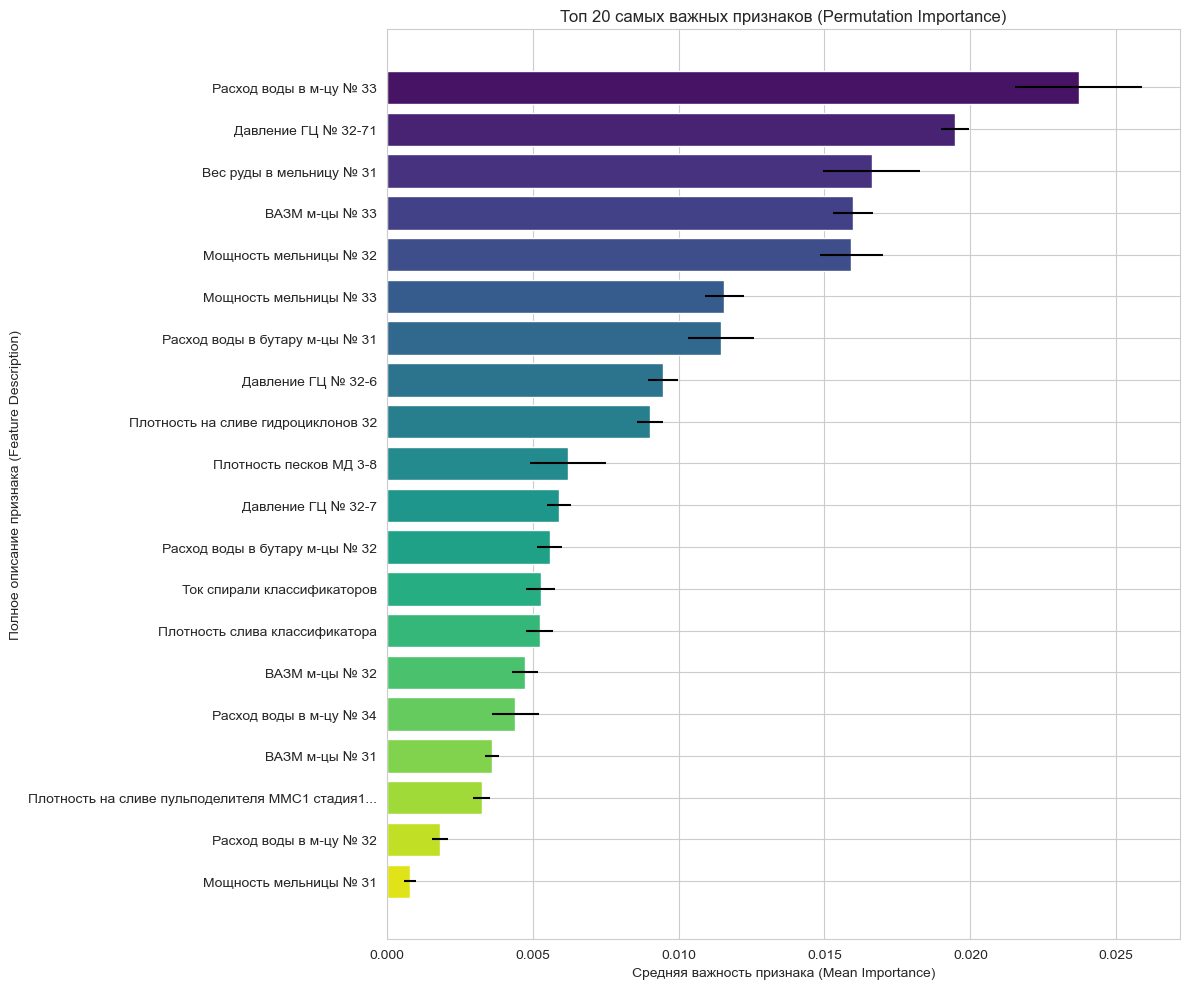

In [374]:
# визуализируем ТОП-20 признаков с полными названиями
top_n = 20
top_indices = sorted_idx_desc[:top_n]

# Извлекаем КОРОТКИЕ имена признаков
short_feature_names = test_feat.columns[top_indices]
importances = result.importances_mean[top_indices]
std_devs = result.importances_std[top_indices]

# --- НОВОЕ: Замена коротких имен на полные названия ---
full_feature_names = [feature_mapping.get(name, name) for name in short_feature_names]
# .get(name, name) используется для того, чтобы, если вдруг имени нет в словаре,
# осталось хотя бы короткое название.

# --- Визуализация с ПОЛНЫМИ названиями ---
plt.figure(figsize=(12, 10)) # Увеличиваем размер для длинных названий
sns.set_style("whitegrid")

plt.barh(y=full_feature_names, width=importances, xerr=std_devs, color=sns.color_palette("viridis", top_n))

plt.gca().invert_yaxis()

plt.xlabel("Средняя важность признака (Mean Importance)")
plt.ylabel("Полное описание признака (Feature Description)")
plt.title(f"Топ {top_n} самых важных признаков (Permutation Importance)")
plt.tight_layout() # Автоматически корректирует расположение элементов, чтобы они не перекрывались
plt.show()

__Вывод о важности используемых признаков:__

__Для сравнения:__


__Признаки (первые 20), отобранные на основе корреляции Спирмана__

1. (0.13119875526972954, '1659'),
2. (0.11958352142530805, '1325'),
3. (0.11283679216454975, '1326'),
4. (0.10012799202845435, '1446'),
5. (0.09590238067650056, '1663'),
6. (0.07009775702944174, '1449'),
7. (0.0528439491723904, '1320'),
8. (0.0524638225307711, '1453'),
9. (0.048783500972701024, '1660'),
10. (0.04305158733967709, '1661'),
11. (0.04235200922858153, '1662'),
12. (0.03665058538258711, '1357'),
13. (0.03610761464150434, '1314'),
14. (0.035130396237023125, '1451'),
15. (0.021477596200767318, '1452'),
16. (0.0158609636684763, '1358'),
17. (0.015118631400505905, '1321'),
18. (0.01104709978238405, '1389'),
19. (0.01040164133272598, '1319'),
20. (0.00922917841, '1322'),

__Признаки (так же первые 20), подвергнутые дисперсионному анализу (из предыдущих удалы 9), а затем отобраны__

1. (0.13119875526972954, '1659'),
2. (0.11958352142530805, '1325'),
3. (0.11283679216454975, '1326'),
4. (0.10012799202845435, '1446'),
5. (0.09590238067650056, '1663'),
6. (0.07009775702944174, '1449'),
7. (0.0528439491723904, '1320'),
8. (0.0524638225307711, '1453'),
9. (0.048783500972701024, '1660'),
10. (0.04305158733967709, '1661'),
11. (0.04235200922858153, '1662'),
12. (0.03665058538258711, '1357'),
13. (0.03610761464150434, '1314'),
14. (0.035130396237023125, '1451'),
15. (0.021477596200767318, '1452'),
16. (0.0158609636684763, '1358'),
17. (0.015118631400505905, '1321'),
18. (0.01104709978238405, '1389'),
19. (0.01040164133272598, '1319'),
20. (0.009229178418431173, 2022'),

__Признаки (так же первые 20), полученные с помощью древесного алгоритма__

1. feature '1323 ' (0.0971)
 2. feature '1449 ' (0.0801)
 3. feature '1315 ' (0.0695)
 4. feature '1663 ' (0.0420)
 5. feature '1324 ' (0.0370)
 6. feature '1659 ' (0.0327)
 7. feature '1325 ' (0.0320)
 8. feature '1322 ' (0.0319)
 9. feature '1326 ' (0.0290)
10. feature '1389 ' (0.0287)
11. feature '1390 ' (0.0287)
12. feature '1451 ' (0.0245)
13. feature '1321 ' (0.0236)
14. feature '1443 ' (0.0234)
15. feature '1453 ' (0.0227)
16. feature '1358 ' (0.0223)
17. feature '1444 ' (0.0215)
18. feature '1452 ' (0.0208)
19. feature '1357 ' (0.0207)
20. feature '1313 ' (0.0245)

__Признаки (так же первые 20), полученные с помощью лучшей модели MLNeuralNetwork__

1.  1323: 0.0237 +/- 0.0022
2.  1446: 0.0195 +/- 0.0005
3.  1662: 0.0166 +/- 0.0017
4.  1660: 0.0160 +/- 0.0007
5.  1388: 0.0159 +/- 0.0011
6.  1389: 0.0116 +/- 0.0007
7.  1325: 0.0115 +/- 0.0011
8.  1443: 0.0095 +/- 0.0005
9.  1314: 0.0090 +/- 0.0004
10.  1317: 0.0062 +/- 0.0013
11.  1444: 0.0059 +/- 0.0004
12.  1326: 0.0056 +/- 0.0004
13.  1255: 0.0053 +/- 0.0005
14.  1311: 0.0052 +/- 0.0005
15.  1659: 0.0048 +/- 0.0005
16.  1324: 0.0044 +/- 0.0008
17.  1658: 0.0036 +/- 0.0002
18.  1312: 0.0033 +/- 0.0003
19.  1322: 0.0018 +/- 0.0003
20.  1387: 0.0008 +/- 0.00020004
 

### Вывод  по разделу 5

Проведен анализ использования ряда моделей для прогнозирования содержания железа в концентрате на основе полученных данных. В качестве лучшей на основе анализа тестовой выборки выбрана модель MLNeuralNetwork.

Сравнили ТОП-20 по значимости показателей (выбрано 20 потому, что всего в исследовании представлены данные по 98 показателей  
и было бы не совсем корректным выбирать для анализа незначительное количество признаков, а именно 5 или 10).

Согласно анализу приведенных данных, показатели __1659, 1325, 1326, 1389, 1314 и 1451__ являются наиболее универсальными и значимыми при производстве, так как различные методы отбора признали их важными для моделирования.

Приведем названия этих показателей:

1. 1659 ВАЗМ м-цы № 32
2. 1325 Расход воды в бутару м-цы № 31
3. 1326 Расход воды в бутару м-цы № 32
4. 1389 Мощность мельницы № 33
5. 1314 Плотность на сливе гидроциклонов 32
6. 1451 Давление воды на секцию№ 32

## 6. Модель выявления условий "оптимального" содержания железа в концентрате (далее решаем задачу классификации, а именно, попадаем в оптимальную полосу или нет) 

In [386]:
# Выделяем данные, которые находятся в полосе "оптимальности"  
datai["label_opt"] = 0
# затем выбираем всех, кто внутри  полосы и ставим им метки 2
class_opt = datai[(datai.y <= (mean(datai.y) + std(datai.y))) & (datai.y >= (mean(datai.y) - std(datai.y)))]
datai.loc[class_opt.index, "label_opt"] = 2.0


In [388]:
class_opt.shape

(34740, 48)

### 6.1. Разбиваем выборку на обучающую и валидационную

На обучающей выборке будем обучать модели с разными параметрами на кросс-валидации.
Лучшие модели проверим на отложенной выборке

In [392]:
# Вычисление матрицы ошибок классификации
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [394]:
key_value = ["label_opt"]
feature_list = info_features

In [396]:
data_class = datai[feature_list + key_value]

In [398]:
data_class.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40260 entries, 2016-02-12 02:00:00 to 2016-04-15 10:59:00
Data columns (total 45 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1253       40260 non-null  float64
 1   1254       40260 non-null  float64
 2   1255       40260 non-null  float64
 3   1256       40260 non-null  float64
 4   1310       40260 non-null  float64
 5   1311       40260 non-null  float64
 6   1312       40260 non-null  float64
 7   1313       40260 non-null  float64
 8   1314       40260 non-null  float64
 9   1315       40260 non-null  float64
 10  1316       40260 non-null  float64
 11  1317       40260 non-null  float64
 12  1318       40260 non-null  float64
 13  1319       40260 non-null  float64
 14  1320       40260 non-null  float64
 15  1321       40260 non-null  float64
 16  1322       40260 non-null  float64
 17  1323       40260 non-null  float64
 18  1324       40260 non-null  float64
 19  1325       

In [400]:
data_class["label_opt"] = data_class["label_opt"].replace(2, 1)


In [402]:
data_class = data_class.reset_index().drop(["index"], axis=1)
data_class.shape

(40260, 45)

In [404]:
X_train, X_test, y_train, y_test = train_test_split(data_class[feature_list], data_class[key_value],
                                                    stratify = data_class[key_value], test_size=0.3, random_state=0)

In [406]:
print(X_train.shape)
print(X_test.shape)

(28182, 44)
(12078, 44)


In [408]:
print(y_train.shape)
print(y_test.shape)

(28182, 1)
(12078, 1)


In [410]:
print(y_train.value_counts())

label_opt
1            24318
0             3864
Name: count, dtype: int64


In [412]:
features, my_scaler = data_preprocess(X_train)
labels = y_train

In [414]:

train_feat = features
train_labels = labels

In [416]:
print(f"Размер train_feat: {train_feat.shape}")
print(f"Размер train_labels: {train_labels.shape}")

Размер train_feat: (28182, 44)
Размер train_labels: (28182, 1)


__Вывод:__

Сформировали датафрейм с данными, которые попопают в "оптимальный" слой. 

Для решения задачи классификации подготовили тренировочный и тестовый наборы данных. 

### 6.2. Подбираем параметры перебором по сетке
У нас несбалансированная выборка, для оценки качества моделей лучше всего подойдет метрики качества ROC-AUC и ROC-PRC
(площадь под кривыми ROC и кривой "точность-полнота")

In [422]:
def show_cv_class(clf_i, name, f, l, cv, score='roc_auc', param=None, vbs=False):
    if param:
        grid_cv = GridSearchCV(
            clf_i,
            param,
            scoring=score,
            cv=cv,
            verbose=vbs,
            n_jobs=-1
        )
        grid_cv.fit(f, l)
        clf_i = grid_cv.best_estimator_
        print(grid_cv.best_params_)
    score = cross_val_score(clf_i, f, l, cv=cv, scoring=score, n_jobs=-1)
    print(name, score.mean(), score)

### 6.3. Обучим модели на стандартных параметрах

В качестве базовых моделей машинного обучения для решения задачи классификации выберем метод опорных векторов (SVC), логистическую регрессию (LogisticRegression), случайный лес деревьев (RandomForest), дерево решений  DecisionTreeClassifier, градиентный бустинг над логистическими регрессиями (AdaBoost) и решающими деревьями (XGBooost)

In [426]:
cmodel_svm = LinearSVC()
cmodel_lr = LogisticRegression()
cmodel_ada = AdaBoostClassifier(estimator=LogisticRegression())
cmodel_t = DecisionTreeClassifier()
cmodel_rf = RandomForestClassifier()
cmodel_xgb = XGBClassifier()

clfs = [
    ['Linear_SVM', cmodel_svm],
    ['Logistic_Regression', cmodel_lr],
    ['AdaBoost_Logistic', cmodel_ada],
    ['Decision_Tree', cmodel_t],
    ['Random_Forest', cmodel_rf],
    ['XGBClassifier', cmodel_xgb],
]

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
#cv = StratifiedKFold(train_labels, n_splits=5, shuffle=True, random_state=1)
for name, cl in clfs:
    show_cv_class(cl, name, train_feat, train_labels, cv)

Linear_SVM 0.7773261699254475 [0.76456007 0.77956138 0.78849819 0.77873395 0.77527727]
Logistic_Regression 0.7798451776196553 [0.76609071 0.78484081 0.7910063  0.78067723 0.77661083]
AdaBoost_Logistic 0.7698929233260025 [0.75648347 0.76878388 0.78211258 0.77228879 0.7697959 ]
Decision_Tree 0.9426672998062282 [0.9388817  0.95261062 0.93574767 0.94531868 0.94077783]
Random_Forest 0.9999285809031047 [0.99998484 0.99993896 0.99989827 0.99994799 0.99987284]
XGBClassifier 0.9999558317415207 [0.99998644 0.99998085 0.99995366 0.99993562 0.99992259]


__Вывод:__ 

Лучшие из выбранных моделей выделены жирным (приведены в порядке обращения к модели):

1. Linear_SVM 0.7773170115553534 [0.764588   0.78000022 0.78904199 0.77778106 0.77517378]
2. __Logistic_Regression 0.7798451776196553 [0.76609071 0.78484081 0.7910063  0.78067723 0.77661083]__
3. AdaBoost_Logistic 0.7698929233260025 [0.75648347 0.76878388 0.78211258 0.77228879 0.7697959]
4. __Decision_Tree 0.9443783404038772 [0.94177741 0.95407982 0.93629255 0.94725917 0.94248276]__
5. __Random_Forest 0.9999263126824728 [0.99997433 0.99994096 0.99986431 0.99994733 0.99990463]__
6. __XGBClassifier 0.9999558317415207 [0.99998644 0.99998085 0.99995366 0.99993562 0.99992259]__

### 6.4. Подбор параметров моделей по кросс-валидации (выбрано 4 лучшие модели)

In [549]:
clfs = [
    ['Logistic_Regression', cmodel_lr],
    ['Decision_Tree', cmodel_t],
    ['Random_Forest', cmodel_rf],
    ['XGBClassifier', cmodel_xgb],
]

parameters={

    'Logistic_Regression': {
        'C': np.arange(1e-06, 0.5, 0.05),
        'penalty': ['l1','l2'],
        'class_weight': [
            None,
            'balanced',
            {0:0.3, 1:0.7},
            {0:0.2, 1:0.8},
            {0:0.1, 1:0.9},
            {0:0.05, 1:0.95},
            {0:0.01, 1:0.99},
        ]
    },
    
    'Decision_Tree': {
        'max_depth': [3, 5, 8, 12, None],  # Глубина дерева
        'min_samples_split': [2, 5, 10],   # Мин. количество для разделения узла
        'min_samples_leaf': [1, 3, 5],     # Мин. количество в листе
        'criterion': ['gini', 'entropy'],  # Критерий качества
        'random_state': [42]               # Фиксация случайности для воспроизводимости
    },

    'Random_Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [8, 10, 12],
        'max_features': [i/10.0 for i in range(6, 11)],
        #'min_samples_split': [1, 3, 5],
        #'min_samples_leaf': [1, 3, 5],
        'class_weight': [None, 'balanced', {0:0.3, 1:0.7}, {0:0.05, 1:0.95}, {0:0.01, 1:0.99}]
    },

    'XGBClassifier': {
        'n_estimators': [20, 50, 100],
        'max_depth': [3, 5, 7],
        'min_child_weight': [1, 2, 4],
        'gamma': [i/10.0 for i in range(3, 6)],
        'subsample': [i/10.0 for i in range(6, 11)],
        'colsample_bytree': [i/10.0 for i in range(6, 11)],
        'use_label_encoder': [False], # Параметр для совместимости XGBoost и sklearn
        'eval_metric': ['logloss']
       }
}

for name, cl in clfs:
    show_cv_class(cl, name, train_feat, train_labels, cv, param=parameters.get(name), vbs=True)

Fitting 5 folds for each of 140 candidates, totalling 700 fits
{'C': 0.450001, 'class_weight': 'balanced', 'penalty': 'l2'}
Logistic_Regression 0.786478689958179 [0.77517107 0.79143785 0.7962047  0.78779862 0.78178122]
Fitting 5 folds for each of 90 candidates, totalling 450 fits
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 10, 'random_state': 42}
Decision_Tree 0.9620672142278132 [0.96356139 0.95971113 0.95959529 0.96084314 0.96662511]
Fitting 5 folds for each of 225 candidates, totalling 1125 fits


KeyboardInterrupt: 

### 6.5. Обучаем модели на оптимальных подобранных параметрах

In [436]:
final_cmodel1 = LogisticRegression(class_weight='balanced', C=0.45, penalty='l2')

final_cmodel2 = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=None,           # Позволяет дереву строиться до максимальной глубины
    min_samples_leaf=3,
    min_samples_split=10,
    random_state=42           
)
final_cmodel3 = XGBClassifier(
    n_estimators=100,
    max_depth=7,
    min_child_weight=1,
    gamma=0.5,
    subsample=0.8,
    colsample_bytree=0.9
)

final_cmodel4 = RandomForestClassifier(
    n_estimators=200,
    max_depth=12,
    class_weight = {0:0.3, 1:0.7},
    max_features = 0.6,
    n_jobs=-1,
    random_state=1
)

### 6.6. Тестируем модели на отложенной выборке
Метрика AUC-ROC

In [439]:
features, my_scaler = data_preprocess(X_test)
labels = y_test
test_feat = features
test_labels = labels

In [441]:
final_cmodel1.fit(train_feat, train_labels)
final_cmodel2.fit(train_feat, train_labels)
final_cmodel3.fit(train_feat, train_labels)
final_cmodel4.fit(train_feat, train_labels)

predict = []
predict.append(final_cmodel1.predict_proba(test_feat))
predict.append(final_cmodel2.predict_proba(test_feat))
predict.append(final_cmodel3.predict_proba(test_feat))
predict.append(final_cmodel4.predict_proba(test_feat))

predict_val = []
predict_val.append(final_cmodel1.predict(test_feat))
predict_val.append(final_cmodel2.predict(test_feat))
predict_val.append(final_cmodel3.predict(test_feat))
predict_val.append(final_cmodel4.predict(test_feat))

print("AUC-ROC score:")
for n, model_name in enumerate(['Logistic_Regression', 'DecisionTreeClassifier', 'XGBClassifier', 'Random_Forest']):
    print(model_name, roc_auc_score(test_labels, [x[1] for x in predict[n]]))

AUC-ROC score:
Logistic_Regression 0.7884351617768803
DecisionTreeClassifier 0.885258515755875
XGBClassifier 0.9997631937085893
Random_Forest 0.9525697046010992


__Вывод:__

Получили UC-ROC score:

1. Logistic_Regression 0.7884351617768803\
2. DecisionTreeClassifier 0.885258515755875\
3. XGBClassifier 0.9997631937085\
4. Random_Forest 0.9525697046010992\

Выбрана лучшая модель __XGBClassifier__

### 6.7. Формируем матрицу вероятностей для всех моделей

In [450]:
test = pd.concat((X_test, y_test), axis=1)
test['predict_LR'] = [x[1] for x in predict[0]]
test['predict_DTC'] = [x[1] for x in predict[1]]
test['predict_XGB'] = [x[1] for x in predict[2]]
test['predict_RF'] = [x[1] for x in predict[3]]

final_pred = test[[
    'predict_LR',
    'predict_DTC',
    'predict_XGB',
    'predict_RF',
    'label_opt'
]].sort_values('predict_XGB', ascending=False)

final_pred.index = range(final_pred.shape[0])

In [452]:
final_pred.head()

predict_LR  predict_DTC  predict_XGB  predict_RF  label_opt
0    0.874260          1.0     0.999957    0.974809          1
1    0.685410          1.0     0.999950    0.975969          1
2    0.686737          1.0     0.999949    0.973564          1
3    0.712372          1.0     0.999949    0.976064          1
4    0.640739          1.0     0.999946    0.976064          1

### 6.8. ROC-кривые на валидационной выборке

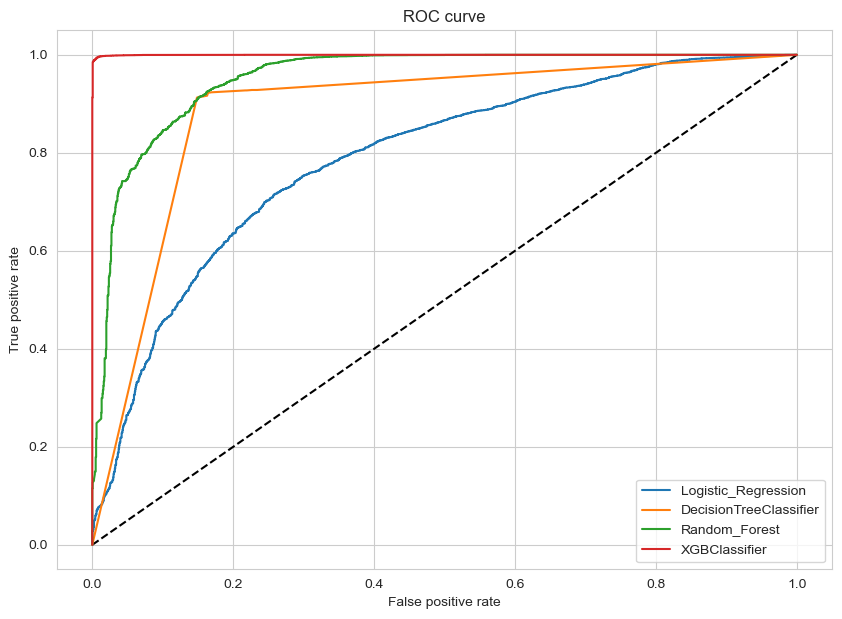

In [455]:
fpr_lr, tpr_lr, _ = roc_curve(final_pred['label_opt'], final_pred['predict_LR'])
fpr_lr_s, tpr_lr_s, _ = roc_curve(final_pred['label_opt'], final_pred['predict_DTC'])
fpr_rf, tpr_rf, _ = roc_curve(final_pred['label_opt'], final_pred['predict_RF'])
fpr_gb, tpr_gb, _ = roc_curve(final_pred['label_opt'], final_pred['predict_XGB'])

plt.figure(figsize=(10,7))
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='Logistic_Regression')
plt.plot(fpr_lr_s, tpr_lr_s, label='DecisionTreeClassifier')
plt.plot(fpr_rf, tpr_rf, label='Random_Forest')
plt.plot(fpr_gb, tpr_gb, label='XGBClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

__Вывод:__ анализ графика позволяет сделать вывод, что XGBClassifier дает самые лучшие результаты решения задачи классификации

### 6.9. Выводим матрицу ошибок градиентного бустинга над решающими деревьями


Модель XGBoost, которуюмы ы использовали (cmodel_xgb), является реализацией градиентного бустинга над решающими деревьями.



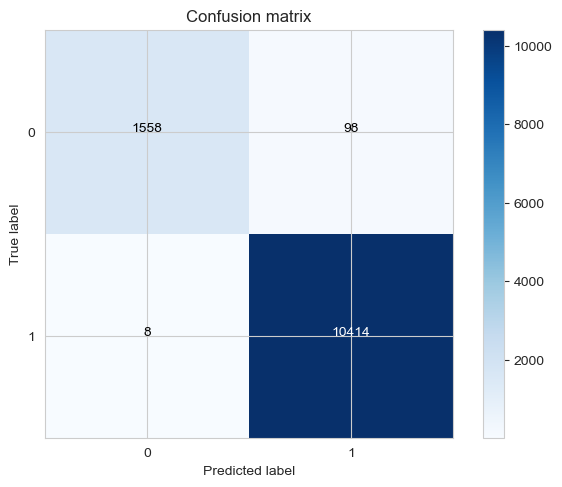

Recall:  [0.94 1.  ] 

Precision:  [0.99 0.99] 

AUC ROC:  0.9997631937085893
AUC PRC:  0.9999622130903528


In [459]:
# Gradient Boosting by Decision Trees
y_pred = final_cmodel3.predict(test_feat)
y_pred_proba = final_cmodel3.predict_proba(test_feat)[:,1]

conf_matrix = confusion_matrix(test_labels, y_pred)
precision, recall, thresholds = precision_recall_curve(test_labels, y_pred_proba)
np.set_printoptions(precision=2)

class_names = [0,1]
plt.figure()
plot_confusion_matrix(conf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

#print "Confusion matrix:\n", conf_matrix,"\n",
print ("Recall: ", recall_score(test_labels, y_pred, average=None), '\n')
print ("Precision: ", precision_score(test_labels, y_pred, average=None), '\n')
print ("AUC ROC: ", roc_auc_score(test_labels, y_pred_proba))
print ("AUC PRC: ", auc(recall, precision))

__Вывод:__

Результаы по XGBClassifier , согласно матрицы ошибок, вполне надежные

### 6.10. Наиболее значимые признаки согласно лучшей модели, которые влияют на "оптимальное" содержание железа в концентрате 

In [464]:
feature_names = X_train.columns
importances = final_cmodel3.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature importances:")
for f, idx in enumerate(indices):
    print("{:2d}. feature '{:5s}' ({:.4f})".format(f+1, feature_names[idx], importances[idx]))

Feature importances:
 1. feature '1660 ' (0.0877)
 2. feature '1318 ' (0.0566)
 3. feature '1313 ' (0.0486)
 4. feature '1448 ' (0.0353)
 5. feature '1320 ' (0.0350)
 6. feature '1390 ' (0.0334)
 7. feature '1315 ' (0.0307)
 8. feature '1449 ' (0.0299)
 9. feature '1253 ' (0.0287)
10. feature '1323 ' (0.0272)
11. feature '1314 ' (0.0258)
12. feature '1452 ' (0.0246)
13. feature '1659 ' (0.0240)
14. feature '1453 ' (0.0232)
15. feature '1663 ' (0.0228)
16. feature '1444 ' (0.0225)
17. feature '1389 ' (0.0221)
18. feature '1358 ' (0.0219)
19. feature '1443 ' (0.0218)
20. feature '1662 ' (0.0217)
21. feature '1325 ' (0.0217)
22. feature '1254 ' (0.0217)
23. feature '1255 ' (0.0211)
24. feature '1446 ' (0.0206)
25. feature '1387 ' (0.0203)
26. feature '1324 ' (0.0202)
27. feature '1357 ' (0.0194)
28. feature '1317 ' (0.0186)
29. feature '1445 ' (0.0185)
30. feature '1451 ' (0.0184)
31. feature '1326 ' (0.0181)
32. feature '1388 ' (0.0180)
33. feature '1256 ' (0.0178)
34. feature '1312 ' (0

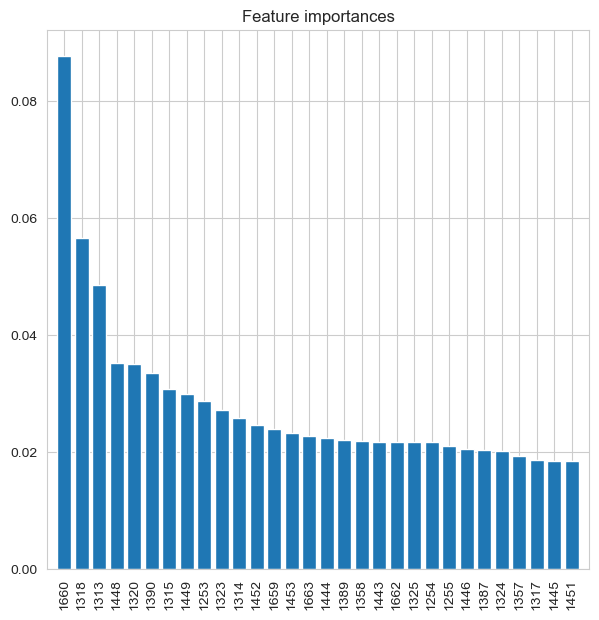

In [466]:
d_first = 30
plt.figure(figsize=(7,7))
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align='center')
plt.xticks(range(d_first), np.array(feature_names)[indices[:d_first]], rotation=90)
plt.xlim([-1, d_first]);

In [468]:
importances_res3 = pd.concat([pd.Series(feature_names[indices[:10]]), pd.Series(importances[indices[:10]])], axis=1)
importances_res3.columns = ["id", "importances"]

In [470]:
importances_res3["id"] = importances_res3["id"].apply(str)

In [472]:
data_info_res3 = pd.merge(data_info, importances_res3,
                         how='left', on=["id"]).dropna().sort_values(["importances"], ascending=False)

### 6.11. Определение  показателей, наиболее вероятно влияющие на "оптимальное" содержания железа в концентрате (согласно лучшей модели)

In [587]:
data_info_res3

id                                        description        phys  \
41  1660                                     ВАЗМ м-цы № 33  %            
12  1318                            Плотность песков МД 3-9  г/л          
7   1313  Плотность на сливе пульподелителя ММС1 стадия2...         г/л   
46  1448  3стадия к мельнице №34. Давление на входе в ба...  бар          
14  1320                  Плотность питания 5-й стадии ММС   г/л          
26  1390                             Мощность мельницы № 34  кВт          
9   1315                            Плотность песков МД 3-7  г/л          
32  1449                                Давление ГЦ № 33-61  бар          
0   1253                 Ток спирали классификаторов 31-4-1  А            
17  1323                            Расход воды в м-цу № 33  мз/час       

    status  importances  
41       1     0.087681  
12       1     0.056617  
7        1     0.048620  
46       1     0.035298  
14       1     0.035019  
26       1     0.033443  
9        1     0.030731  
32       1     0.029895  
0        1     0.028693  
17       1     0.027218

### Вывод по разделу 6

На основе лучшей модели классификации выбрали ТОП-10 показателей, которые наиболее вероятно влияют на "оптимальное" содержание железа в концентрате


## 7. Выбор наилучших признаков посредством перебора (с использованием лучшей модели)

### 7.1. Перебор признаков с помощью лучшей модели:
Начинаем с полного пространства признаков, выбрасываем по одному признаку пока не портится качество модели на кросс-валидации либо пока не достигнем требуемого числа признаков

In [483]:
selector = SequentialFeatureSelector(final_cmodel3, scoring='roc_auc', verbose=2, k_features=2, forward=False, cv=cv, n_jobs=-1)

Используем класс SequentialFeatureSelector для автоматического выбора лучшей комбинации признаков для лучшей модели XGBClassifier.

In [485]:
selector.fit(X_train.values, y_train.values)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   51.2s
[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:  1.3min finished

[2025-11-24 01:16:21] Features: 43/2 -- score: 0.9999422134799605[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   51.9s
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:  1.3min finished

[2025-11-24 01:17:37] Features: 42/2 -- score: 0.99993192821154[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   51.0s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:  1.2min finished

[2025-11-24 01:18:51] Features: 41/2 -- score: 0.9999321986185097[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   49.5s
[Parallel(n_jobs=-1)]: Done  41 out of 

SequentialFeatureSelector(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
                          estimator=XGBClassifier(base_score=None, booster=None,
                                                  callbacks=None,
                                                  colsample_bylevel=None,
                                                  colsample_bynode=None,
                                                  colsample_bytree=0.9,
                                                  device=None,
                                                  early_stopping_rounds=None,
                                                  enable_categorical=False,
                                                  eval_metric=None,
                                                  feature_types=None, gamma=0.5,
                                                  grow_policy=None,
                                                  impo...
                                                  interaction_constraints=None,
                                                  learning_rate=None,
                                                  max_bin=None,
                                                  max_cat_threshold=None,
                                                  max_cat_to_onehot=None,
                                                  max_delta_step=None,
                                                  max_depth=7, max_leaves=None,
                                                  min_child_weight=1,
                                                  missing=nan,
                                                  monotone_constraints=None,
                                                  multi_strategy=None,
                                                  n_estimators=100, n_jobs=None,
                                                  num_parallel_tree=None,
                                                  random_state=None, ...),
                          forward=False, k_features=(2, 2), n_jobs=-1,
                          scoring='roc_auc', verbose=2)

In [489]:
selector_metrics = pd.DataFrame.from_dict(selector.get_metric_dict()).T

In [491]:
selector_metrics

feature_idx  \
44  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
43  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
42  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
41  (0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15...   
40  (0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15...   
39  (0, 1, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 15, 16...   
38  (0, 1, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 15, 16...   
37  (0, 1, 3, 4, 5, 6, 7, 8, 9, 11, 12, 15, 16, 17...   
36  (0, 1, 3, 4, 5, 7, 8, 9, 11, 12, 15, 16, 17, 1...   
35  (0, 1, 3, 4, 5, 8, 9, 11, 12, 15, 16, 17, 18, ...   
34  (0, 1, 3, 4, 5, 8, 9, 11, 12, 15, 16, 17, 18, ...   
33  (0, 1, 3, 4, 5, 8, 9, 11, 12, 15, 16, 17, 18, ...   
32  (0, 1, 3, 4, 5, 8, 9, 11, 12, 15, 16, 17, 18, ...   
31  (0, 1, 3, 4, 5, 8, 9, 11, 12, 15, 16, 17, 18, ...   
30  (0, 1, 3, 4, 5, 8, 9, 11, 12, 15, 16, 17, 19, ...   
29  (0, 1, 3, 4, 5, 8, 9, 11, 12, 15, 16, 17, 19, ...   
28  (0, 1, 3, 4, 5, 8, 11, 12, 15, 16, 17, 19, 20,...   
27  (0, 1, 3, 4, 5, 8, 11, 12, 15, 16, 17, 19, 20,...   
26  (0, 1, 3, 4, 5, 8, 11, 12, 15, 16, 17, 19, 20,...   
25  (1, 3, 4, 5, 8, 11, 12, 15, 16, 17, 19, 20, 23...   
24  (1, 3, 4, 5, 11, 12, 15, 16, 17, 19, 20, 23, 2...   
23  (1, 3, 5, 11, 12, 15, 16, 17, 19, 20, 23, 24, ...   
22  (1, 3, 5, 11, 12, 15, 16, 17, 19, 23, 24, 25, ...   
21  (1, 3, 5, 11, 12, 15, 16, 17, 19, 23, 24, 25, ...   
20  (1, 3, 5, 11, 12, 15, 16, 17, 19, 23, 24, 26, ...   
19  (1, 3, 5, 11, 12, 15, 16, 17, 19, 23, 24, 26, ...   
18  (1, 3, 5, 11, 12, 15, 17, 19, 23, 24, 26, 28, ...   
17  (1, 3, 5, 11, 12, 15, 17, 19, 24, 26, 28, 32, ...   
16  (1, 3, 5, 11, 12, 15, 17, 19, 24, 26, 28, 32, ...   
15  (1, 3, 5, 11, 12, 15, 17, 19, 24, 26, 28, 32, ...   
14  (1, 3, 5, 11, 12, 15, 17, 19, 24, 26, 28, 38, ...   
13  (1, 3, 5, 11, 12, 15, 17, 19, 24, 26, 38, 41, 42)   
12      (1, 3, 5, 11, 15, 17, 19, 24, 26, 38, 41, 42)   
11          (1, 3, 5, 11, 17, 19, 24, 26, 38, 41, 42)   
10              (1, 3, 5, 17, 19, 24, 26, 38, 41, 42)   
9                  (1, 3, 17, 19, 24, 26, 38, 41, 42)   
8                      (1, 3, 17, 24, 26, 38, 41, 42)   
7                          (1, 3, 17, 24, 26, 38, 42)   
6                             (1, 17, 24, 26, 38, 42)   
5                                (17, 24, 26, 38, 42)   
4                                    (17, 26, 38, 42)   
3                                        (17, 26, 38)   
2                                            (17, 38)   

                                            cv_scores avg_score  \
44  [0.9999257953462246, 0.9998989327296248, 0.999...  0.999893   
43  [0.9999765949479131, 0.9999555835943352, 0.999...  0.999942   
42  [0.999978722679921, 0.9999699457853884, 0.9998...  0.999932   
41  [0.9999702117518894, 0.9999563814938381, 0.999...  0.999932   
40  [0.999956115527337, 0.9999452109007967, 0.9999...  0.999932   
39  [0.9999683499863825, 0.9999736693164023, 0.999...   0.99994   
38  [0.9999542537618302, 0.9999835100769388, 0.999...  0.999939   
37  [0.9999672861203786, 0.9999446789677946, 0.999...  0.999946   
36  [0.9999707436848914, 0.9999585092258461, 0.999...  0.999928   
35  [0.9999547856948322, 0.9999718075508954, 0.999...  0.999958   
34  [0.999959307125349, 0.9999364340062641, 0.9999...  0.999949   
33  [0.9999694138523865, 0.9999718075508953, 0.999...  0.999943   
32  [0.9999646264553687, 0.9999523919963234, 0.999...  0.999945   
31  [0.9999523919963232, 0.9999558495608362, 0.999...  0.999927   
30  [0.9999827121774357, 0.9999098373561653, 0.999...  0.999928   
29  [0.9999670201538776, 0.9999327104752503, 0.999...  0.999896   
28  [0.9999675520868795, 0.9999308487097434, 0.999...  0.999932   
27  [0.9999398915707769, 0.9998771234765438, 0.999...  0.999904   
26  [0.999917550384694, 0.9999188802171989, 0.9999...  0.999904   
25  [0.9999366999727649, 0.9999374978722679, 0.999...  0.999919   
24  [0.999959307125349, 0.9999444130012937, 0.9998...  0.999911   
23  [0.9999499982978144, 0.999895741131613, 0.9998...  0.99

In [493]:
list(enumerate(X_train.columns)) 

[(0, '1253'),
 (1, '1254'),
 (2, '1255'),
 (3, '1256'),
 (4, '1310'),
 (5, '1311'),
 (6, '1312'),
 (7, '1313'),
 (8, '1314'),
 (9, '1315'),
 (10, '1316'),
 (11, '1317'),
 (12, '1318'),
 (13, '1319'),
 (14, '1320'),
 (15, '1321'),
 (16, '1322'),
 (17, '1323'),
 (18, '1324'),
 (19, '1325'),
 (20, '1326'),
 (21, '1357'),
 (22, '1358'),
 (23, '1387'),
 (24, '1388'),
 (25, '1389'),
 (26, '1390'),
 (27, '1443'),
 (28, '1444'),
 (29, '1445'),
 (30, '1446'),
 (31, '1447'),
 (32, '1449'),
 (33, '1451'),
 (34, '1452'),
 (35, '1453'),
 (36, '1454'),
 (37, '1658'),
 (38, '1659'),
 (39, '1660'),
 (40, '1661'),
 (41, '1662'),
 (42, '1663'),
 (43, '1448')]

In [498]:
# print('Best combination of features: (AUC ROC score: %.5f): %s\n' % (selector.k_score_, selector.k_feature_idx_))
# print('All subsets of features: \n', selector.subsets_)


In [616]:
CorrelationSelector(datai[["1390", "1323", "1663", "1659"]], datai['y'])

[(0.13119875526972954, '1659'),
 (0.09590238067650056, '1663'),
 (7.890023202264313e-05, '1390'),
 (-0.02201428245881435, '1323')]

### Вывод  по разделу 7


Полуи5лись ТОП-4 показателей, которые с наибольшей вероятностью влияют на "оптимальное " содержание  железа  в концентрате:

26 - 1390 Мощность мельницы № 34
38 - 1659 ВАЗМ м-цы № 32
17 - 1323 Расход воды в м-цу № 33
42 - 1663 Вес руды в мель24 - 1388 Мощность мельницы № 32ницу № 32



## 8. Вывод по исследованию и выработка рекомендаций 

В проведенном исследовании исходные данные были подвергнуты предварительной обработке, сформированые датафреймы для исследовательского анализа, проведены исследования согласно поставленным вопросам, проведен анализ результатов по получению значимых показателей на процесс обогащения железа на горно-обогатительном производстве с помощью различным методов, и по полученным результатам могут быть сформулированы следующие рекомендации:

  1. Согласно анализу приведенных данных, показатели 1659, 1325, 1326, 1389, 1314 и 1451 являются наиболее значимыми при производстве, так как различные методы отбора признали их важными для моделирования.
Приведем названия этих показателей:

  1659 ВАЗМ м-цы № 32
  
  1325 Расход воды в бутару м-цы № 31
  
  1326 Расход воды в бутару м-цы № 32
  
  1389 Мощность мельницы № 33
  
  1314 Плотность на сливе гидроциклонов 32
  
  1451 Давление воды на секцию № 32
  


2. Для решения проблемы максимизации содержания железа в концентрате необходимо , в первую очередь, отслеживать данные с показателией из следующего списка ТОП-5:

1390  Мощность мельницы № 34          
1323  Расход воды в м-цу № 33                                     
1663  Вес руды в мельницу № 32                                    
1661  ВАЗМ м-цы № 34                                               
1313  Плотность на сливе пульподелителя ММС1 стадия2 (32 мельница) 
   

3. Для решения задачи получения "оптимального" содержанию железа в концентрате, наиболее подходящего для литейного процесса, необходимо, в первую очередь, отслеживать данные с показатели из следующего списка ТОП-5:

1390 Мощность мельницы № 34

1659 ВАЗМ м-цы № 32

1323 Расход воды в м-цу № 33

1663 Вес руды в мельницу № 32

1388 Мощность мельницы № 32